# Зависимость числа признаков:
Исследуем зависимость числа признаков, на которых достигается пик тестовой ошибки от объема обучающей выборки.

In [ ]:
#Импортируем нужные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tqdm.notebook import tqdm

#Пара нужных штук
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Возьмем a, b, c (нормаль - norm) и начальную точку (1, 2, 3) (point)

In [ ]:
a = 20
b = 3 
c = 4

x0 = 1
y0 = 2
z0 = 3

norm = np.array([a, b, c])
point = np.array([x0, y0, z0])
#Получим d
d = -point.dot(norm)
print('d = ', d)

d =  -38


Мы будем идти по циклу и в нем же каждый раз генерировать новый датасет. Будем замерять MSE по количеству признаков для каждой выборки и смотреть при каких значениях достигается максимум.

In [ ]:
#Функция, которая проходит по количеству признаков с нужным шагом и возвращает MSE на тесте и обучении, а также соответствующее количество признаков
#Для скорости будем использовать библиотечную реализацию аналитического решения линейной регрессии
def MSE_on_features(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 10):  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  MSE_train = []
  MSE_test = []
  num_iter = []
  
  count = left_border

  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(i) for i in range(count, count+step)]
    count += step
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich, target, test_size=0.3)
    regressor = LinearRegression(n_jobs = -1)
    regressor.fit(X_train, target_train)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    num_iter.append(i + step)
  return MSE_train, MSE_test, num_iter

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

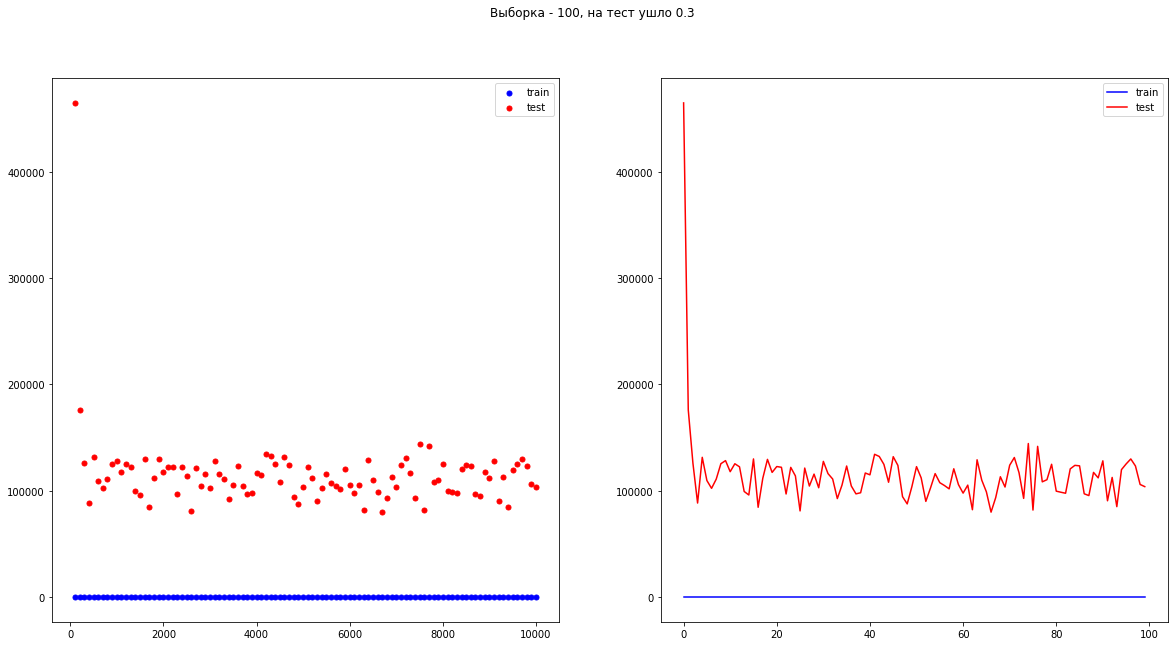

  0%|          | 0/100 [00:00<?, ?it/s]

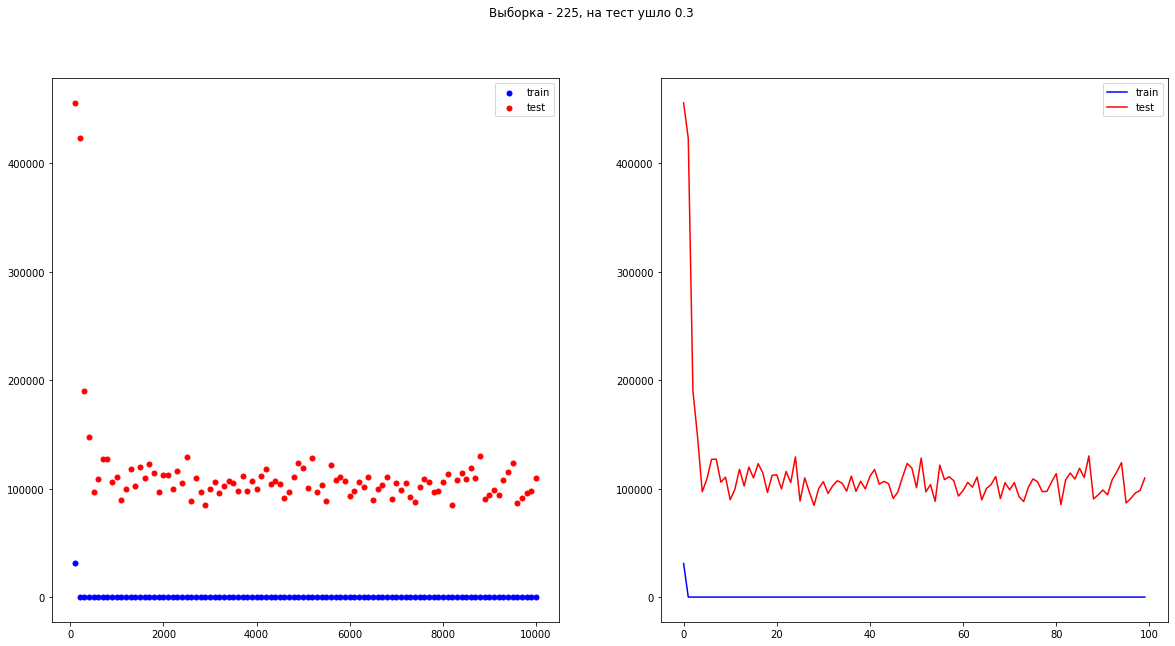

  0%|          | 0/100 [00:00<?, ?it/s]

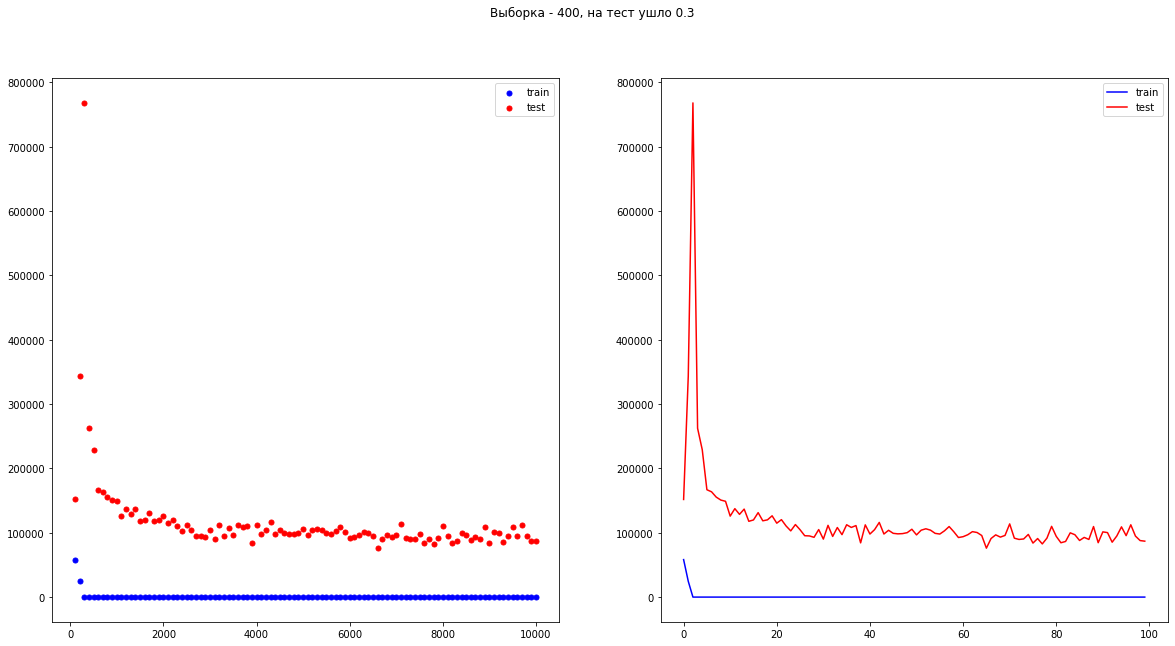

  0%|          | 0/100 [00:00<?, ?it/s]

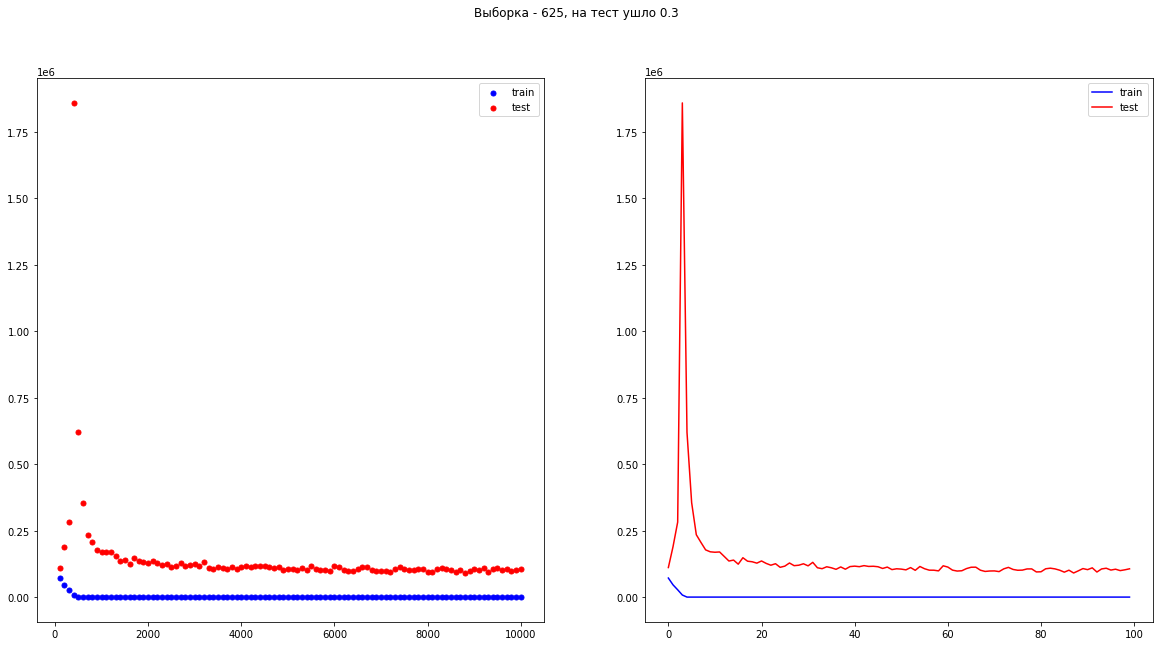

  0%|          | 0/100 [00:00<?, ?it/s]

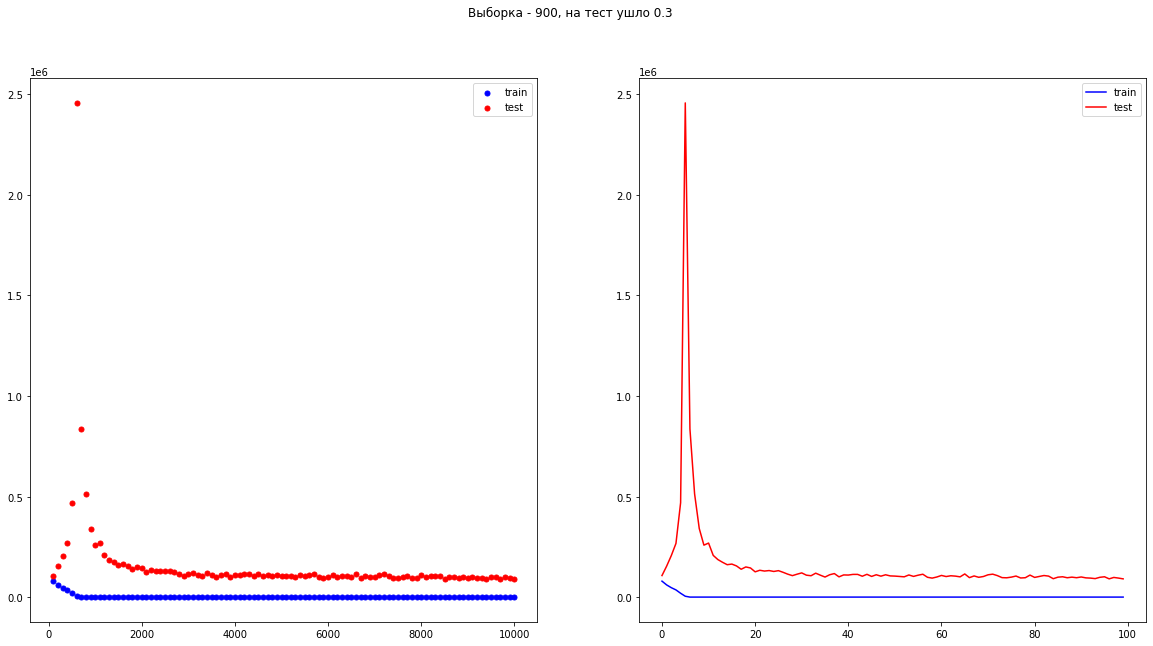

  0%|          | 0/100 [00:00<?, ?it/s]

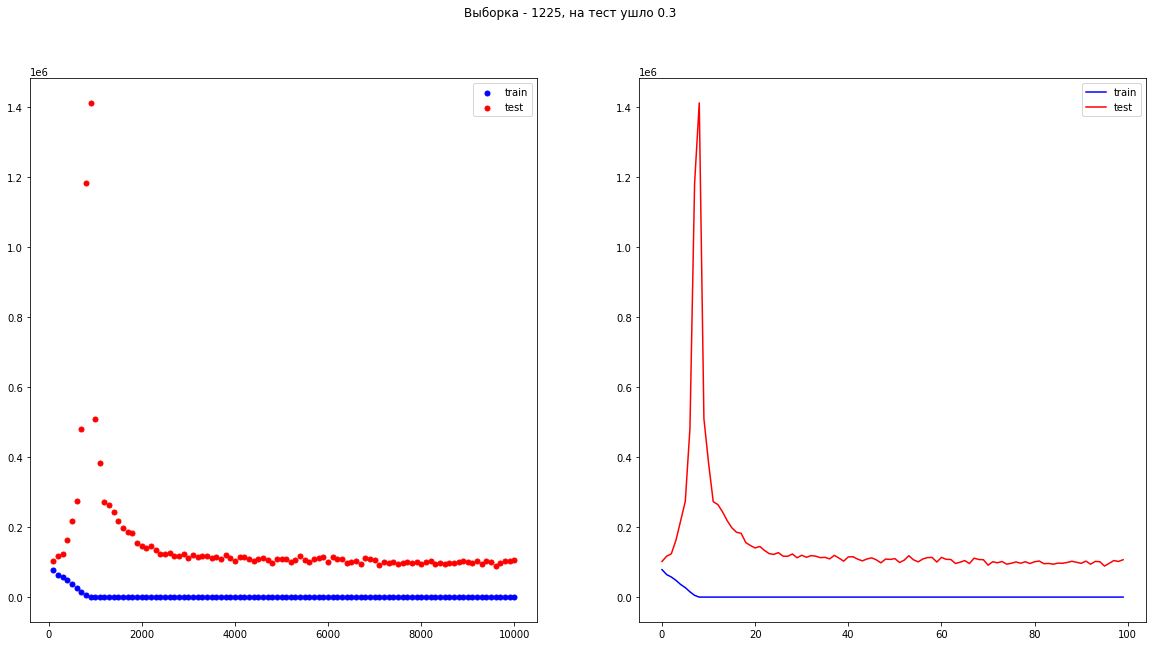

  0%|          | 0/100 [00:00<?, ?it/s]

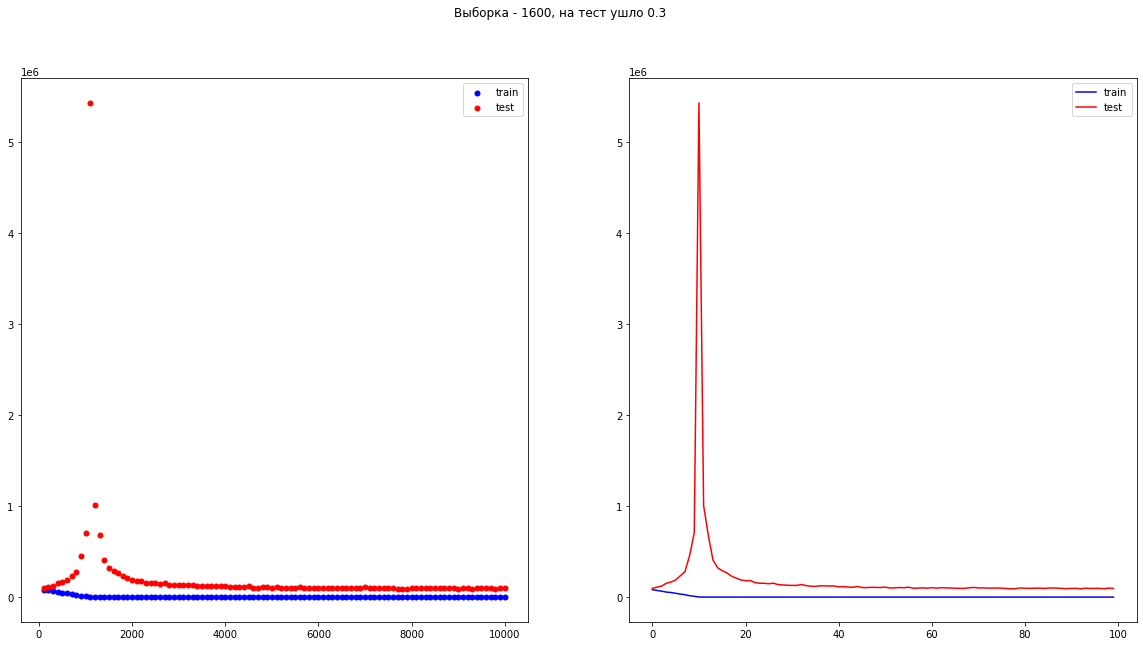

  0%|          | 0/100 [00:00<?, ?it/s]

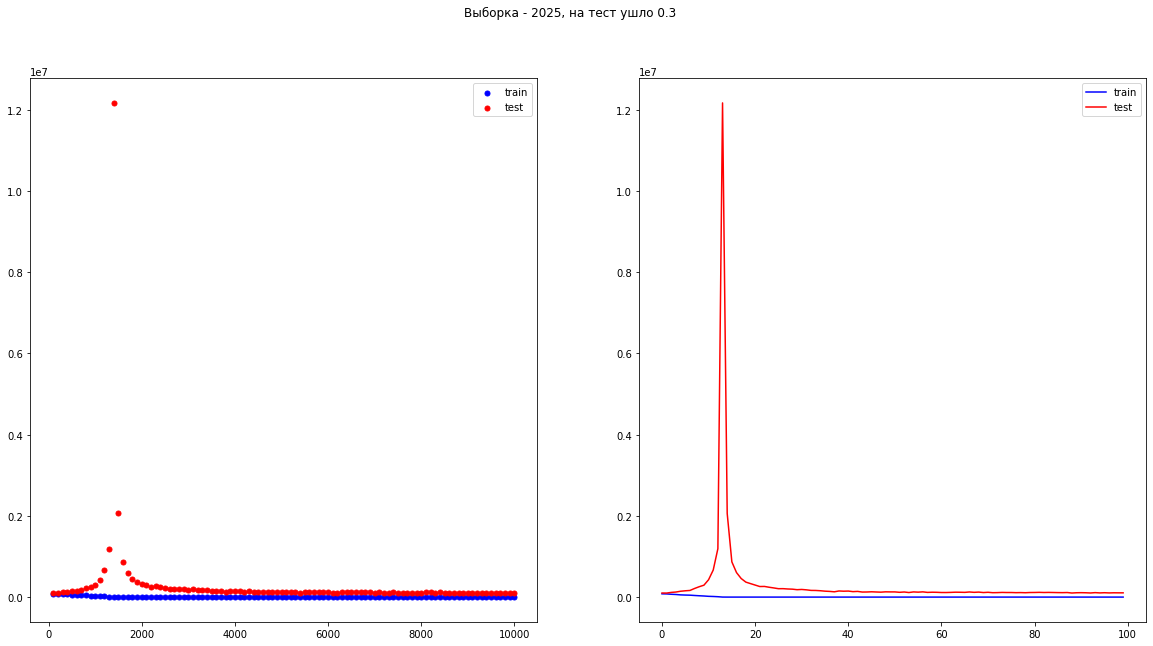

  0%|          | 0/100 [00:00<?, ?it/s]

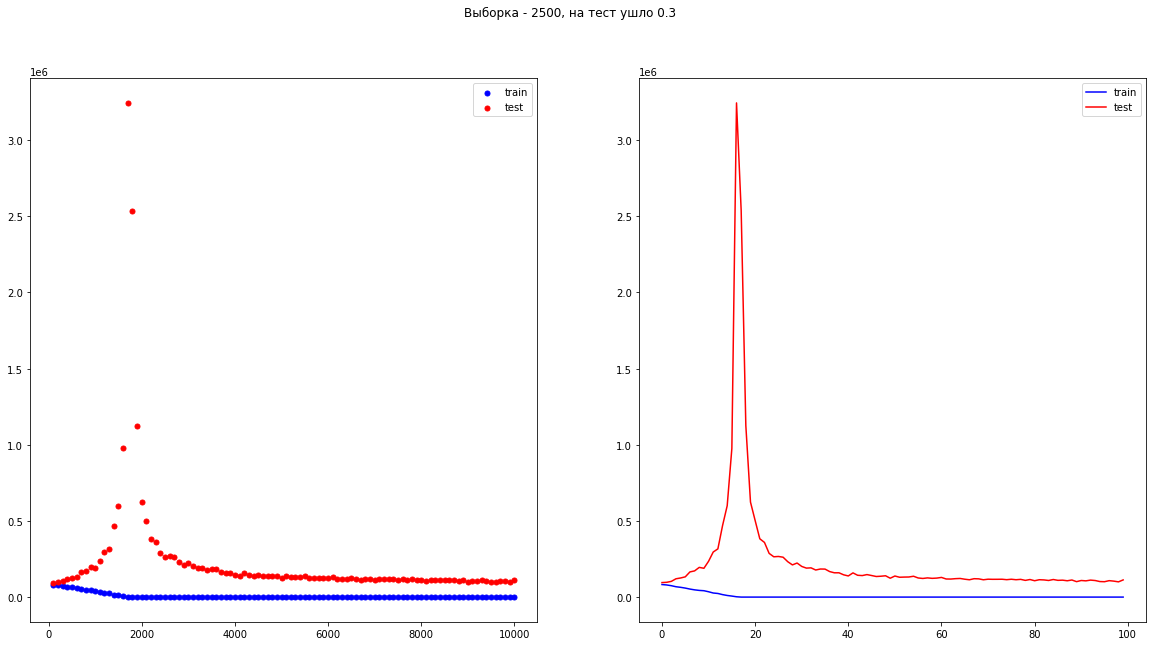

  0%|          | 0/100 [00:00<?, ?it/s]

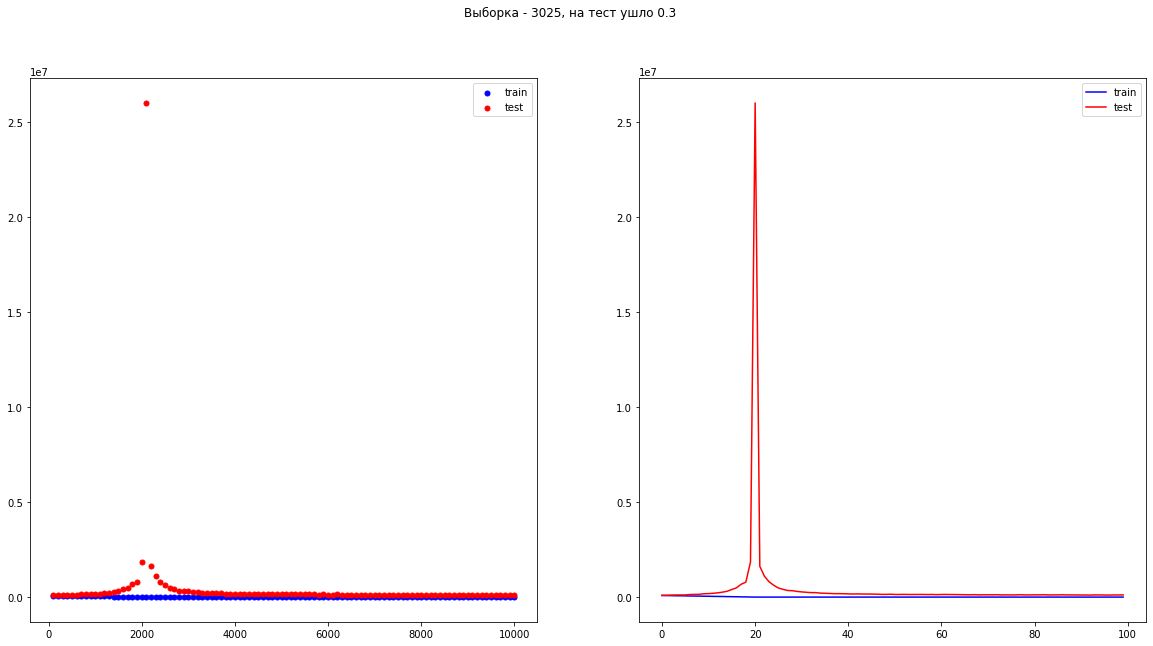

  0%|          | 0/100 [00:00<?, ?it/s]

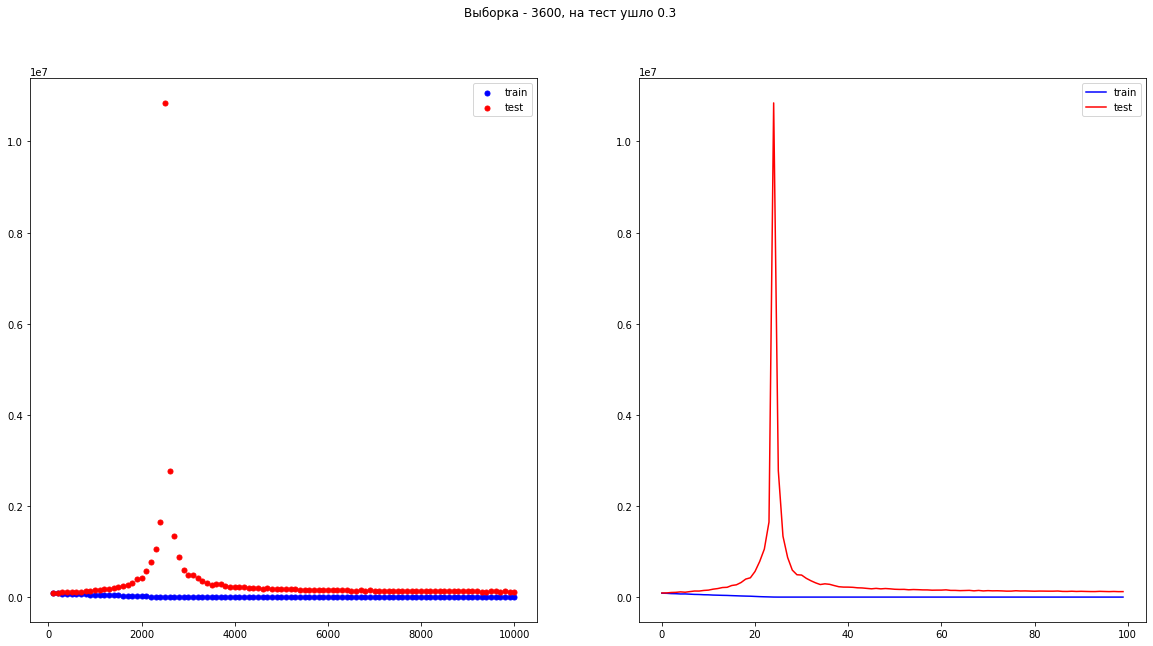

  0%|          | 0/100 [00:00<?, ?it/s]

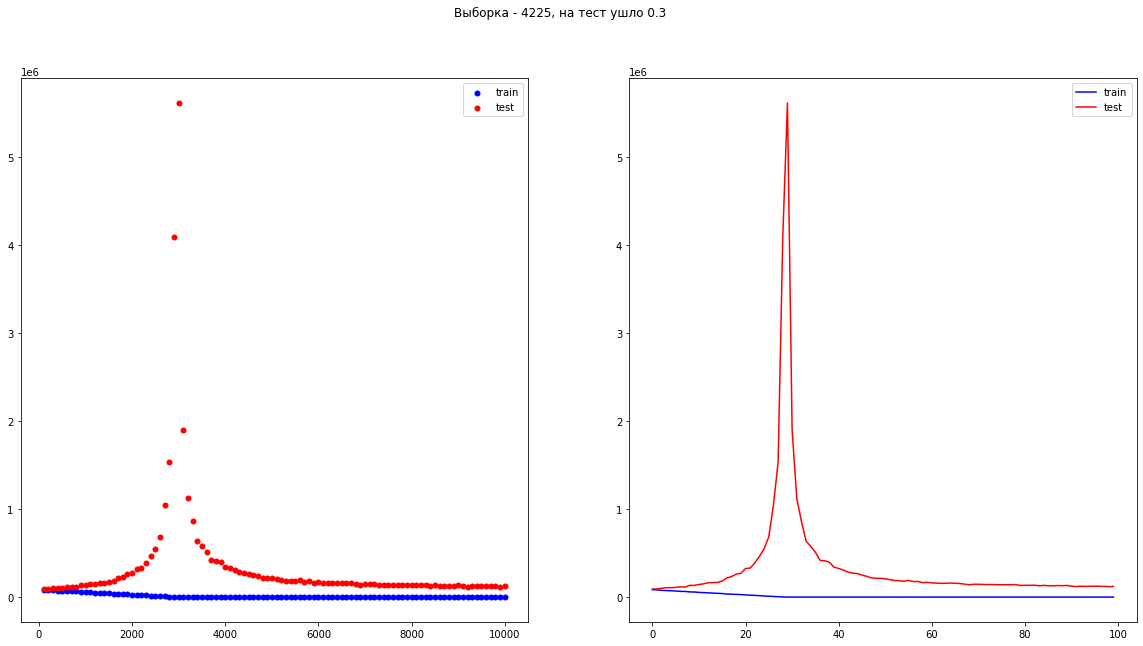

  0%|          | 0/100 [00:00<?, ?it/s]

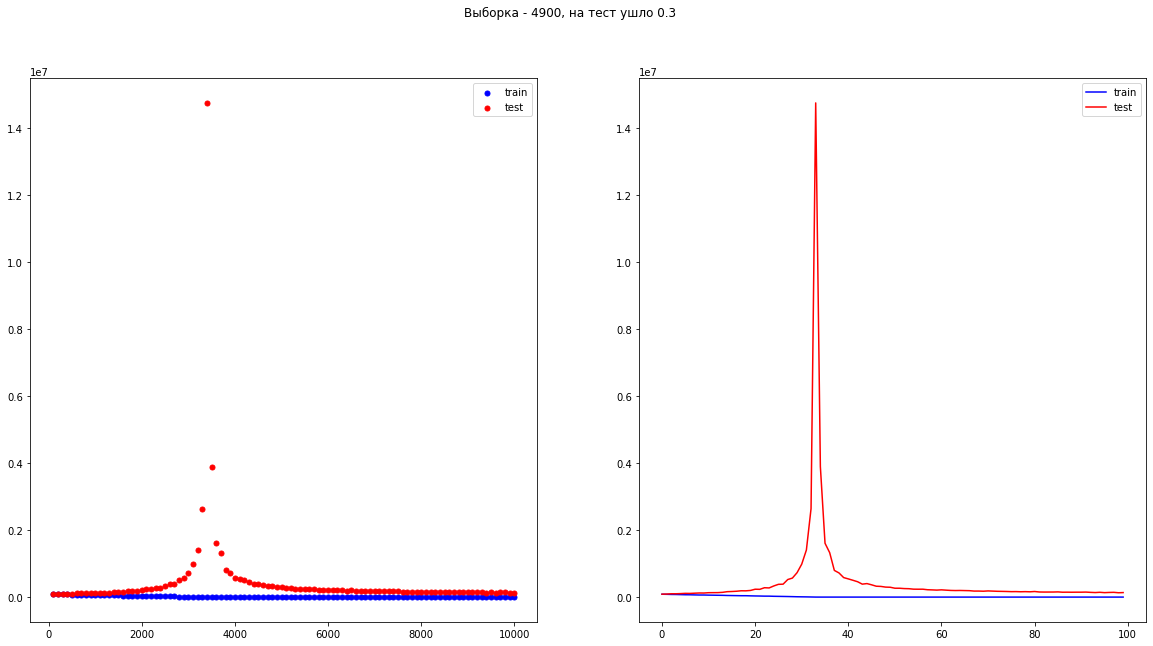

  0%|          | 0/100 [00:00<?, ?it/s]

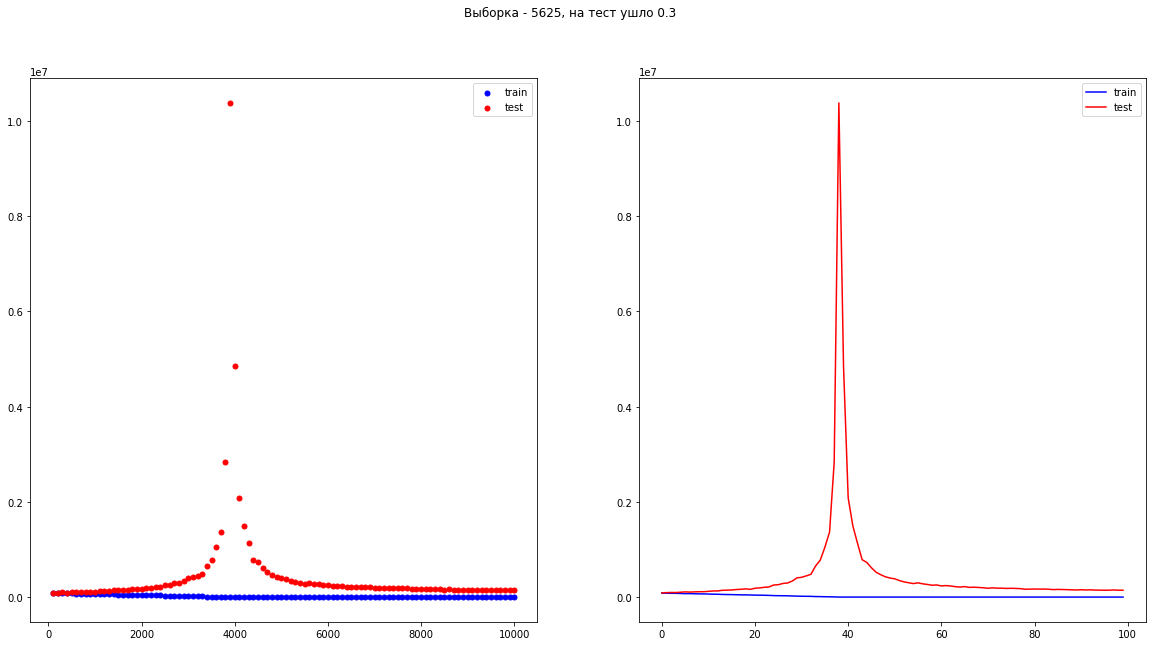

  0%|          | 0/100 [00:00<?, ?it/s]

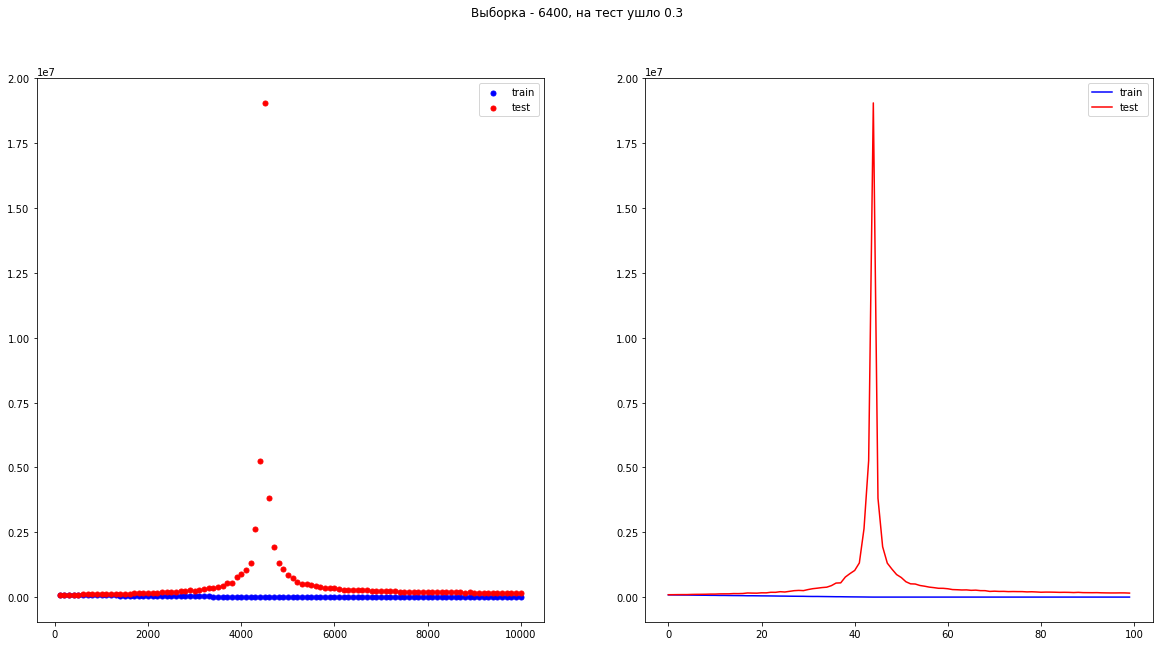

  0%|          | 0/100 [00:00<?, ?it/s]

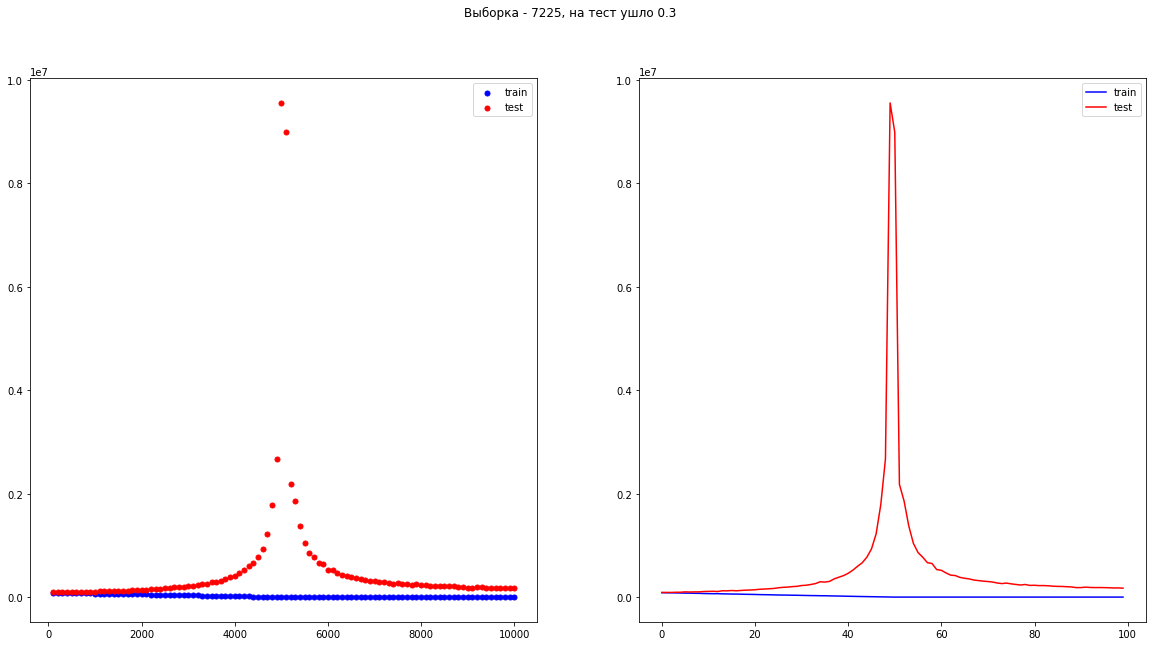

  0%|          | 0/100 [00:00<?, ?it/s]

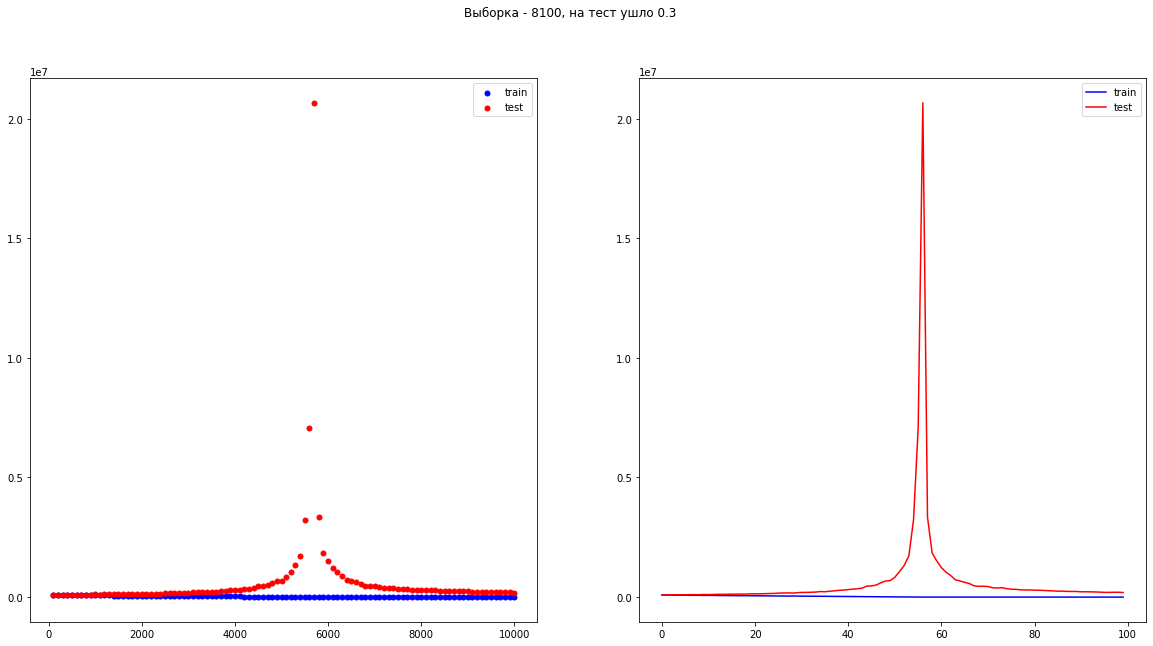

  0%|          | 0/100 [00:00<?, ?it/s]

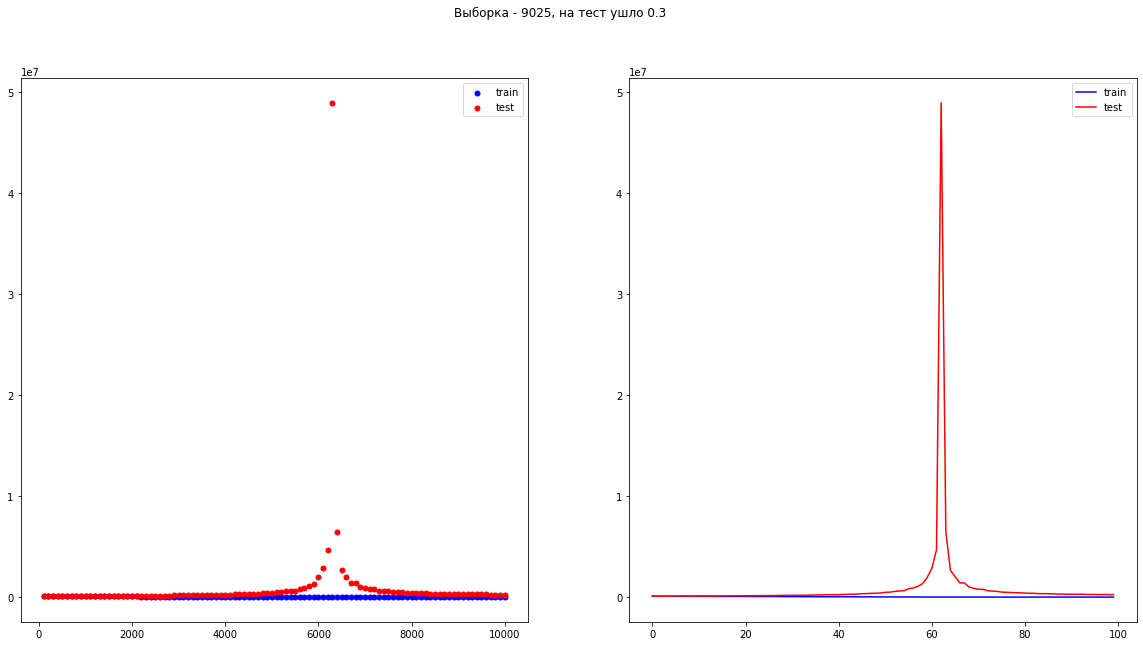

In [ ]:
left_border_plane = -100
right_border_plane = 100

answers = []

for num_elements in tqdm(range(10, 100, 5)):
  x = np.linspace(left_border_plane, right_border_plane, num_elements)
  y = np.linspace(left_border_plane, right_border_plane, num_elements)
  X, Y = np.meshgrid(x, y)
  Z = (-a * X - b * Y - d) * 1. / c

  #Растянем наши матрицы в одномерный массив и добавим шума
  x_data = X.ravel()
  y_data = Y.ravel()
  z_data = Z.ravel()
  n = num_elements * num_elements
  x_data = x_data + 5 * np.random.randn(n)
  y_data = y_data + 5 * np.random.randn(n)
  z_data = z_data + np.random.randn(n)

  #Составим матрицу признаков
  data = pd.DataFrame({'x' : x_data, 'y' : y_data, 'z' : z_data})
  #Перемешаем данные (можно этого и не делать, потому что далее train_test_split все перемешает, но пусть будет)
  data = data.sample(frac = 1)

  #Разделим выборку на признаки и таргет
  Fich = data.iloc[ : , : -1]
  target = data['z']

  MSE_train, MSE_test, num_iter = MSE_on_features(Fich, target, right_border = 10000, step = 100, rand_size = (right_border_plane - left_border_plane) // 2)
  answers.append([MSE_train, MSE_test, num_iter])


  #Нарисуем график
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
  fig.suptitle(f'Выборка - {num_elements * num_elements}, на тест ушло 0.3')
  ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 25)
  ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 25)
  ax[0].legend()

  ax[1].plot(MSE_train, color='blue', label='train')
  ax[1].plot(MSE_test, color = 'red', label='test')
  ax[1].legend()
  plt.show()




Видим поразительную схожесть максимума с количеством обучающих параметров в модели (максимум достигается при количестве тестовых элементов в выборке равном количеству параметров). Нужно более тщательно исследовать этот факт. Попробуем брать окрестность вокруг количества параметров равном тестовой выборке и смотреть как ведет себя MSE.

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

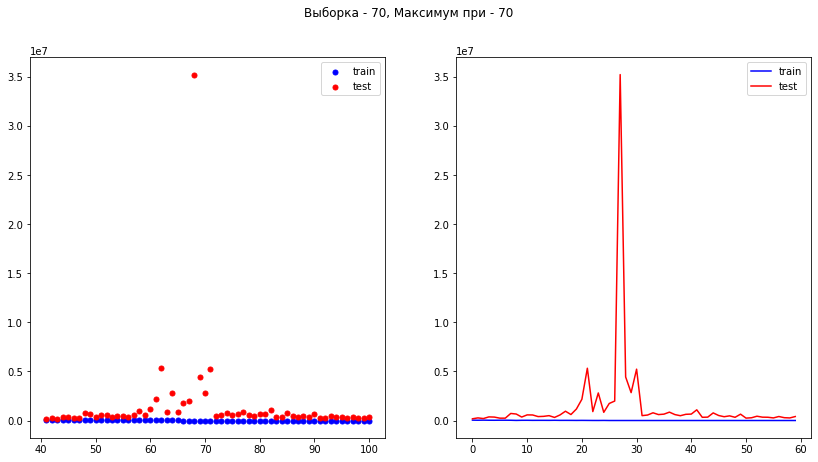

  0%|          | 0/60 [00:00<?, ?it/s]

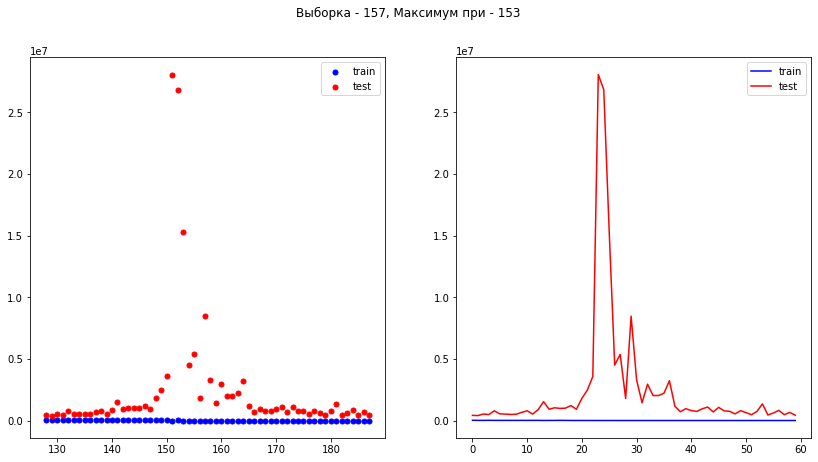

  0%|          | 0/60 [00:00<?, ?it/s]

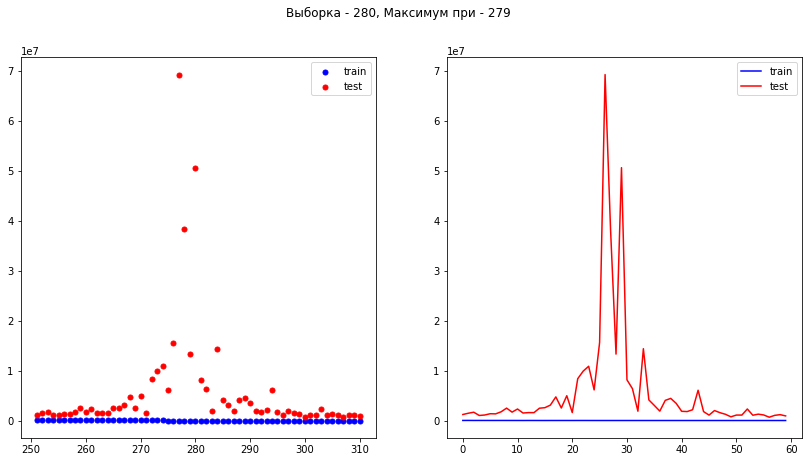

  0%|          | 0/60 [00:00<?, ?it/s]

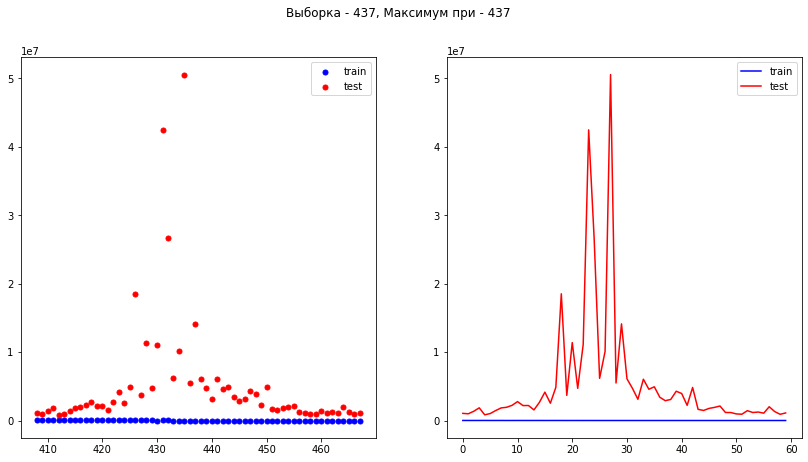

  0%|          | 0/60 [00:00<?, ?it/s]

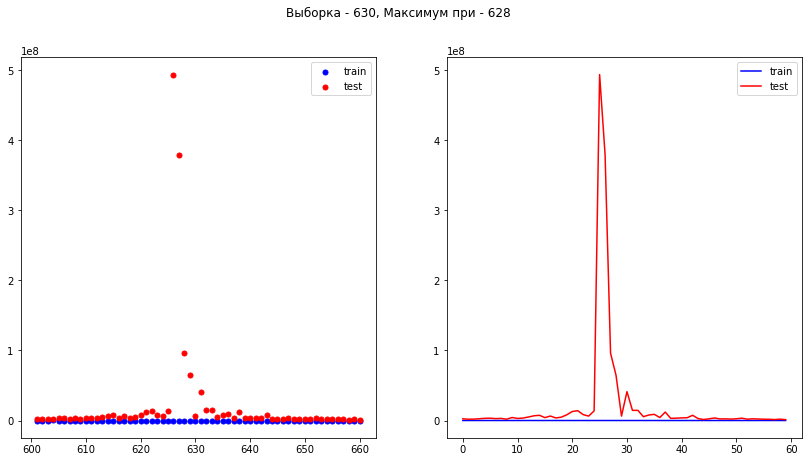

  0%|          | 0/60 [00:00<?, ?it/s]

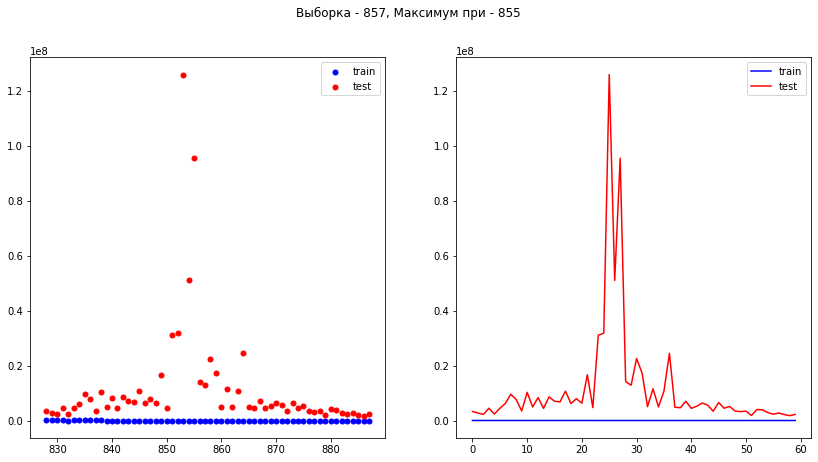

  0%|          | 0/60 [00:00<?, ?it/s]

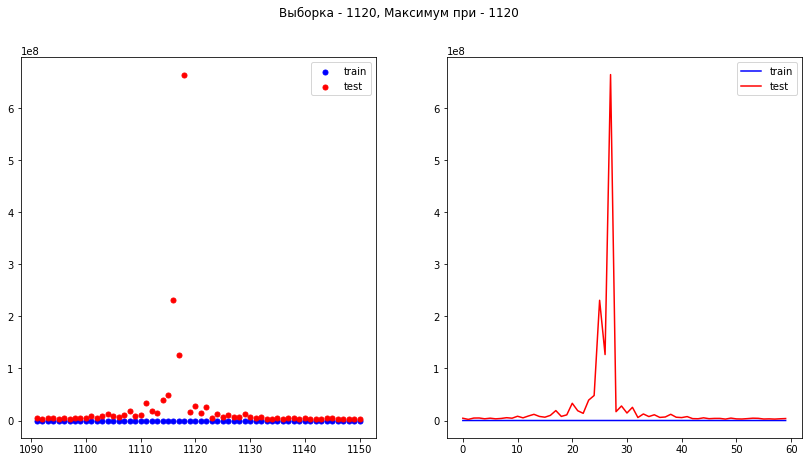

  0%|          | 0/60 [00:00<?, ?it/s]

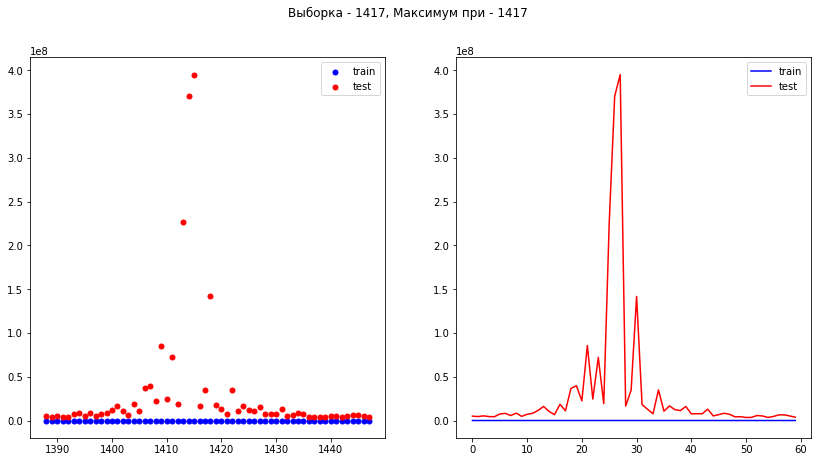

  0%|          | 0/60 [00:00<?, ?it/s]

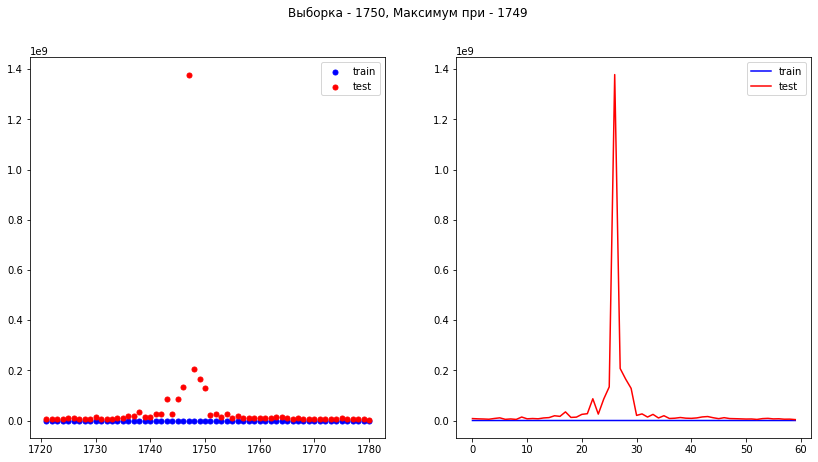

  0%|          | 0/60 [00:00<?, ?it/s]

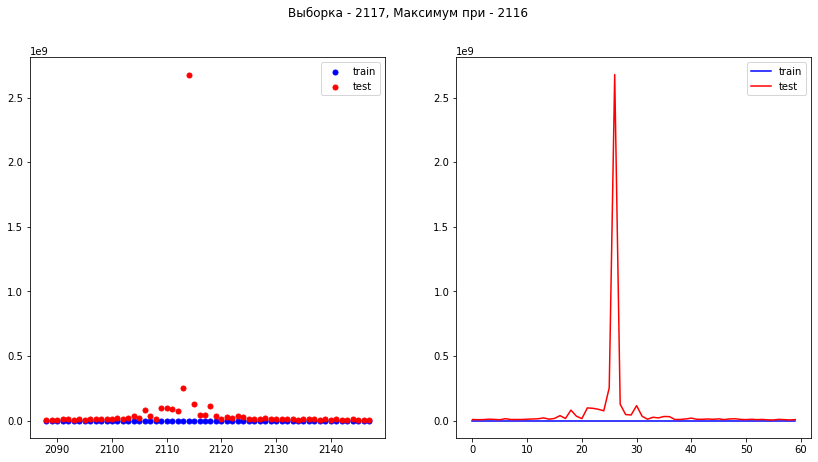

  0%|          | 0/60 [00:00<?, ?it/s]

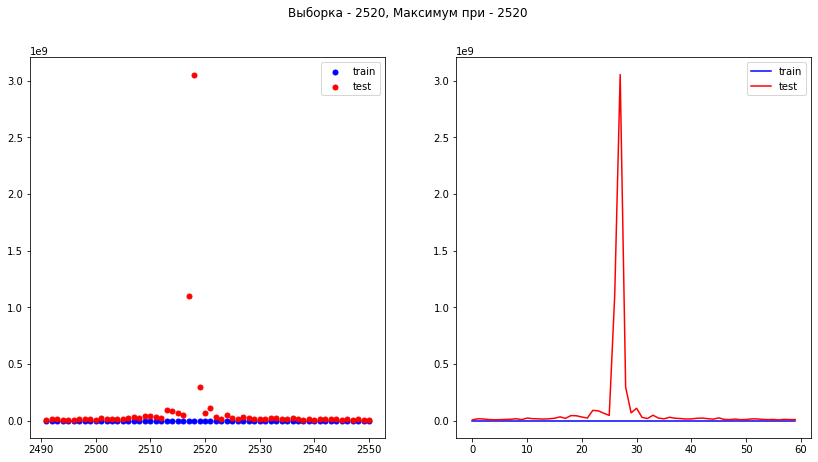

  0%|          | 0/60 [00:00<?, ?it/s]

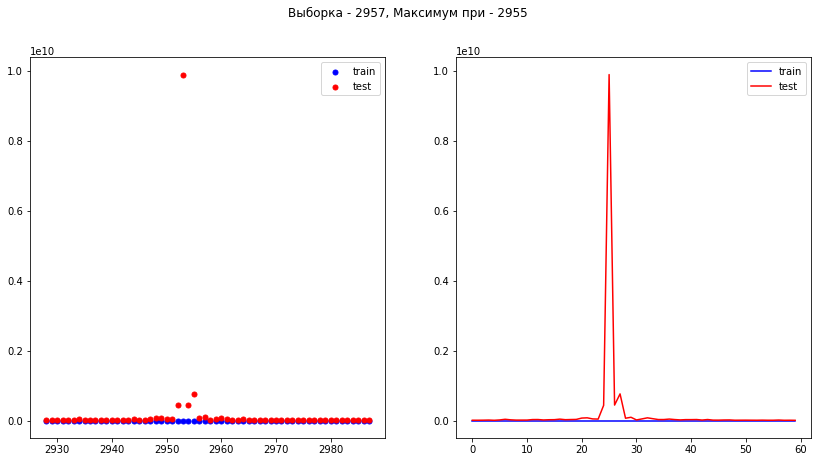

  0%|          | 0/60 [00:00<?, ?it/s]

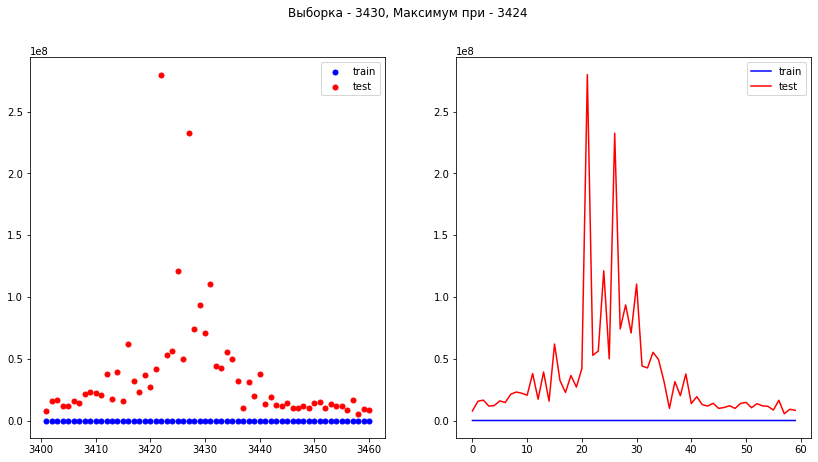

  0%|          | 0/60 [00:00<?, ?it/s]

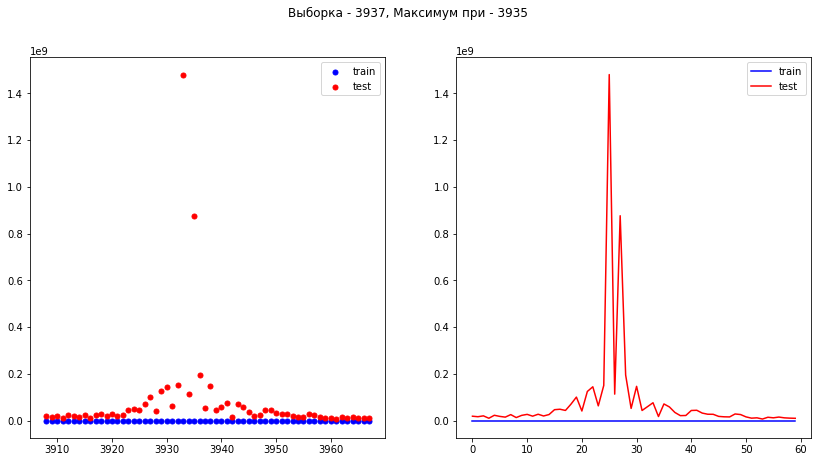

  0%|          | 0/60 [00:00<?, ?it/s]

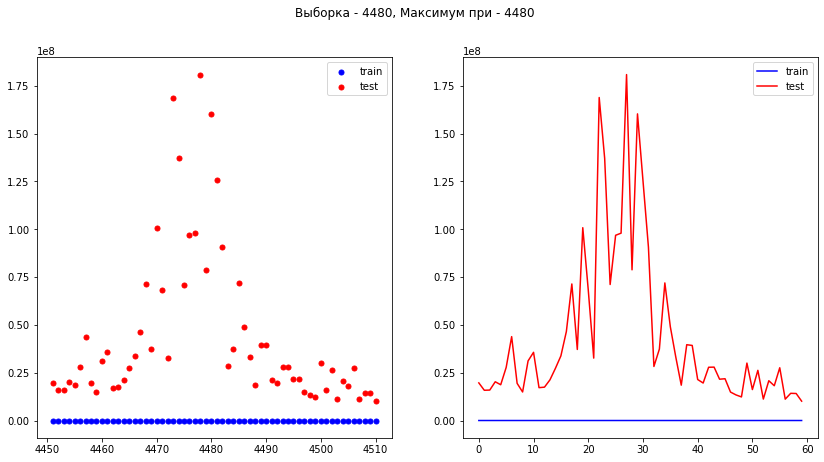

  0%|          | 0/60 [00:00<?, ?it/s]

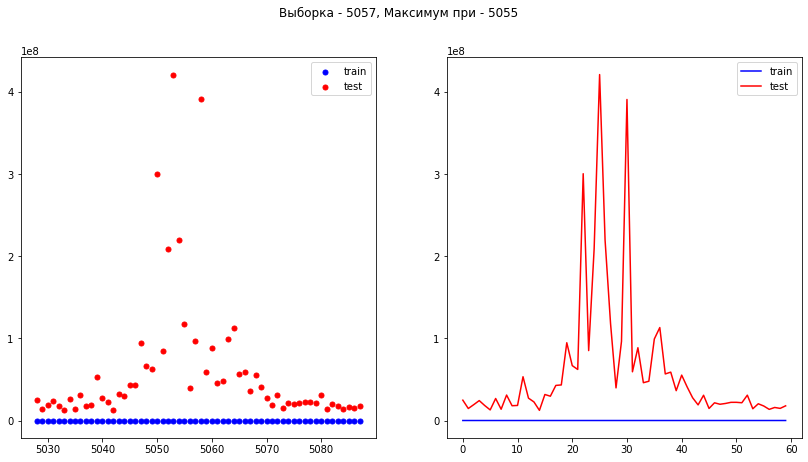

  0%|          | 0/60 [00:00<?, ?it/s]

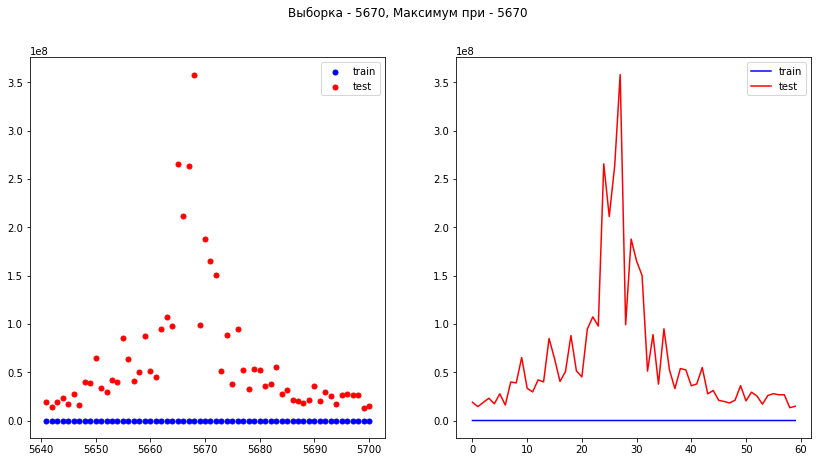

  0%|          | 0/60 [00:00<?, ?it/s]

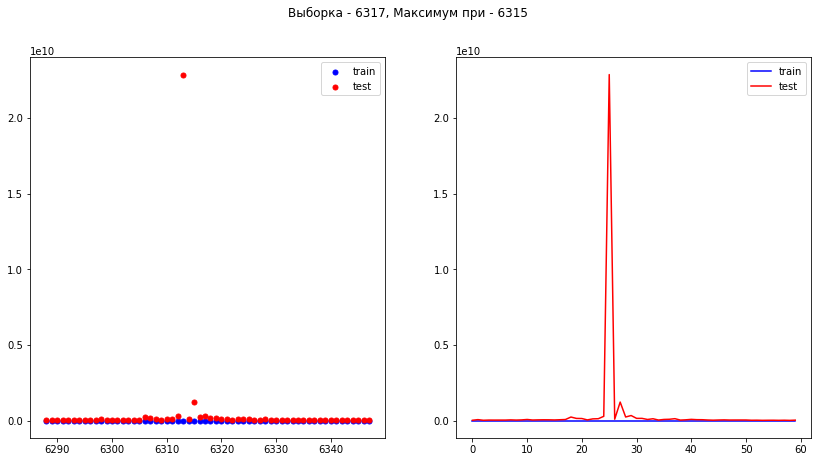

In [ ]:
#Давайте попробуем взять какое-то количество элементов в выборке и посмотрим в окрестности такого же количества параметров значение MSE
#Давайте пройдемся по тем же выборкам


left_border_plane = -100
right_border_plane = 100

answers2 = []

for num_elements in tqdm(range(10, 100, 5)):
  x = np.linspace(left_border_plane, right_border_plane, num_elements)
  y = np.linspace(left_border_plane, right_border_plane, num_elements)
  X, Y = np.meshgrid(x, y)
  Z = (-a * X - b * Y - d) * 1. / c

  #Растянем наши матрицы в одномерный массив и добавим шума
  x_data = X.ravel()
  y_data = Y.ravel()
  z_data = Z.ravel()
  n = num_elements * num_elements
  x_data = x_data + 5 * np.random.randn(n)
  y_data = y_data + 5 * np.random.randn(n)
  z_data = z_data + np.random.randn(n)

  #Составим матрицу признаков
  data = pd.DataFrame({'x' : x_data, 'y' : y_data, 'z' : z_data})
  #Перемешаем данные (можно этого и не делать, потому что далее train_test_split все перемешает, но пусть будет)
  data = data.sample(frac = 1)

  #Разделим выборку на признаки и таргет
  Fich = data.iloc[ : , : -1]
  target = data['z']

  #Установим границы поиска и умножим их на 0.7, потому что 0.3 от всех данных уходит на тест
  left = int(max(0, n * 0.7 - 30))
  right = int(n * 0.7 + 30)

  MSE_train, MSE_test, num_iter = MSE_on_features(Fich, target, left_border = left, right_border = right, step = 1, rand_size = (right_border_plane - left_border_plane) // 2)
  answers2.append([MSE_train, MSE_test, num_iter])


  #Нарисуем график
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
  #Нужно будет прибавить 2 к индексу, так как он не учитывает первоначальные 2 полезных признака
  fig.suptitle(f'Выборка - {int(n*0.7)}, Максимум при - {num_iter[MSE_test.index(max(MSE_test))] + 2}')
  ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 25)
  ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 25)
  ax[0].legend()

  ax[1].plot(MSE_train, color='blue', label='train')
  ax[1].plot(MSE_test, color = 'red', label='test')
  ax[1].legend()
  plt.show()

Видим, что наша гипотеза подтверждается тестами. Максимум достигается при количестве элементов в выборке равном количеству параметров всего лишь с небольшой погрешностью.

## Выводы
Пик тестовой ошибки достигается при количестве параметров равном тестовой выборке.

# Поведение нормы весов относительно количества параметров
Проверим поведение нормы весов относительно количества параметров. Я посмею выдвинуть гипотезу, что норма будет вести себя также как и MSE на тесте. Давайте это проверим.

##Формируем датасет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
a = 20
b = 3 
c = 4

x0 = 1
y0 = 2
z0 = 3

norm = np.array([a, b, c])
point = np.array([x0, y0, z0])
#Получим d
d = -point.dot(norm)
print('d = ', d)

d =  -38


In [3]:
#Построим точки для плоскости
num_elements = 50

left_border_plane = -100
right_border_plane = 100

x = np.linspace(left_border_plane, right_border_plane, num_elements)
y = np.linspace(left_border_plane, right_border_plane, num_elements)

X, Y = np.meshgrid(x, y)

Z = (-a * X - b * Y - d) * 1. / c

#Растянем наши матрицы в одномерный массив
x_data = X.ravel()
y_data = Y.ravel()
z_data = Z.ravel()

n = num_elements * num_elements

In [4]:
#Добавим шума
x_data = x_data + 5 * np.random.randn(n)
y_data = y_data + 5 * np.random.randn(n)
z_data = z_data + np.random.randn(n)


In [5]:
#Составим матрицу признаков
data = pd.DataFrame({'x' : x_data, 'y' : y_data, 'z' : z_data})
#Перемешаем данные (можно этого и не делать, потому что далее train_test_split все перемешает, но пусть будет)
data = data.sample(frac = 1)
#Разделим выборку на признаки и таргет
Fich = data.iloc[ : , : -1]
target = data['z']

##Вводим вспомогательные функции

In [6]:
#Немного модифицируем нашу функцию. Теперь она также будет возвращать веса в нужном режиме работы (mode)
def weights_and_MSE(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 1, mode = 0):  
  '''mode:
  (0) MSE and weights returned
  (1) only MSE returned
  (2) only weights returned
  '''
  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  weights = []
  inter = []
  MSE_train = []
  MSE_test = []
  num_iter = []

  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(k) for k in range(i, i + step)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
    regressor = LinearRegression(n_jobs = -1)
    regressor.fit(X_train, target_train)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    weights.append(regressor.coef_)
    inter.append(regressor.intercept_)
    num_iter.append(i + step)
  if mode == 0:
    return MSE_train, MSE_test, weights, inter, num_iter
  elif mode == 1:
    return MSE_train, MSE_test, num_iter
  else:
    return weights, inter, num_iter

## Начинаем исследование

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rand_size = (right_border_plane - left_border_plane) // 2
MSE_train, MSE_test, weights, inter, num_iter = weights_and_MSE(Fich, target, right_border = 10000, step = 100,  rand_size = rand_size)
weights1 = weights.copy()
#Найдем норму
norm = []
for w in weights:
  norm.append(np.linalg.norm(w))

  0%|          | 0/100 [00:00<?, ?it/s]

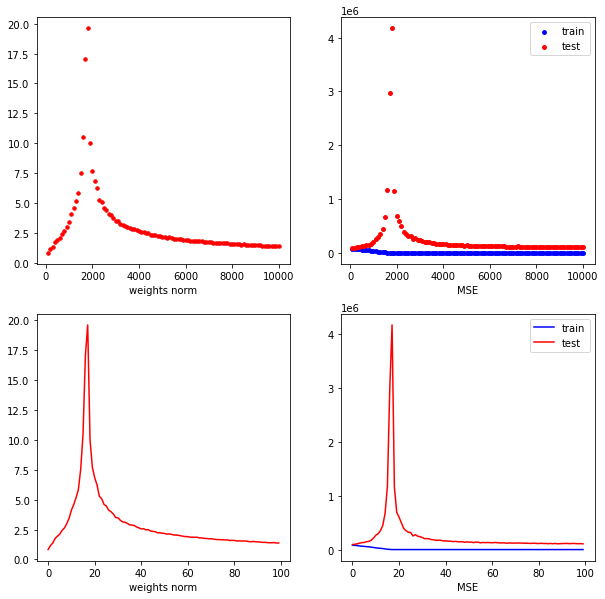

In [8]:
#Нарисуем график
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].scatter(num_iter, norm, color='red', s = 12)
ax[0][0].set(xlabel = 'weights norm')

ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
ax[0][1].set(xlabel = 'MSE')
ax[0][1].legend()

ax[1][0].plot(norm, color='red')
ax[1][0].set(xlabel = 'weights norm')

ax[1][1].plot(MSE_train, color='blue', label='train')
ax[1][1].plot(MSE_test, color = 'red', label='test')
ax[1][1].set(xlabel = 'MSE')
ax[1][1].legend()
plt.show()

In [9]:
#найдем, при каком значении наблюдаются максимумы
weights_norm_max = max(norm)
MSE_test_max = max(MSE_test)
print('Максимум весов -', weights_norm_max, '\nМаксимум MSE - ', MSE_test_max)

index_weight = norm.index(weights_norm_max)
MSE_test_max = MSE_test.index(MSE_test_max)

print('Достигаются при:')
print('weights - ', num_iter[index_weight])
print('MSE - ', num_iter[MSE_test_max])

Максимум весов - 19.59581406960891 
Максимум MSE -  4168841.659690464
Достигаются при:
weights -  1800
MSE -  1800


Отсюда можно сделать вывод, что максимум по норме норме наблюдается при максимуме на MSE. Сейчас мы это проверим более точно. Возьмем границы на 100 больше и 100 меньше, чем получили в прошлой ячейке, чтобы исключить погрешность. Построим график с шагом 10, а потом приблизимся еще больше чтобы точно определить пик.

In [10]:
mn = min(num_iter[index_weight], num_iter[MSE_test_max])
mx = max(num_iter[index_weight], num_iter[MSE_test_max])


In [11]:
MSE_train, MSE_test, weights, inter, num_iter = weights_and_MSE(Fich, target, left_border = max(0, mn - 100), right_border = mx + 100, step = 10,  rand_size = rand_size)
norm = []
for w in weights:
  norm.append(np.linalg.norm(w))

  0%|          | 0/20 [00:00<?, ?it/s]

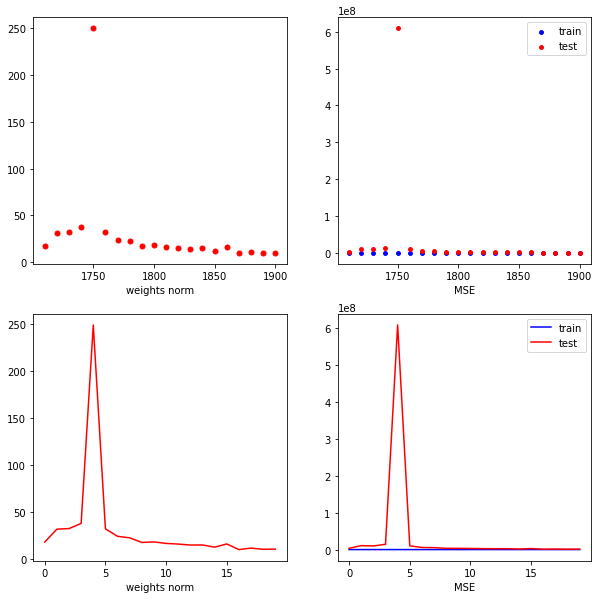

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].scatter(num_iter, norm, color='red', s = 25)
ax[0][0].set(xlabel = 'weights norm')

ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
ax[0][1].set(xlabel = 'MSE')
ax[0][1].legend()

ax[1][0].plot(norm, color='red')
ax[1][0].set(xlabel = 'weights norm')

ax[1][1].plot(MSE_train, color='blue', label='train')
ax[1][1].plot(MSE_test, color = 'red', label='test')
ax[1][1].set(xlabel = 'MSE')
ax[1][1].legend()
plt.show()

In [13]:
#найдем, при каком значении наблюдаются максимумы
weights_norm_max = max(norm)
MSE_test_max = max(MSE_test)
print('Максимум весов -', weights_norm_max, '\nМаксимум MSE - ', MSE_test_max)

index_weight = norm.index(weights_norm_max)
MSE_test_max = MSE_test.index(MSE_test_max)

print('Достигаются при:')
print('weights - ', num_iter[index_weight])
print('MSE - ', num_iter[MSE_test_max])

Максимум весов - 249.44968874644283 
Максимум MSE -  608803024.4297318
Достигаются при:
weights -  1750
MSE -  1750


In [14]:
mn = min(num_iter[index_weight], num_iter[MSE_test_max])
mx = max(num_iter[index_weight], num_iter[MSE_test_max])

In [15]:
MSE_train, MSE_test, weights, inter, num_iter = weights_and_MSE(Fich, target, left_border = max(0, mn - 10), right_border = mx + 10, step = 1,  rand_size = rand_size)
norm = []
for w in weights:
  norm.append(np.linalg.norm(w))

  0%|          | 0/20 [00:00<?, ?it/s]

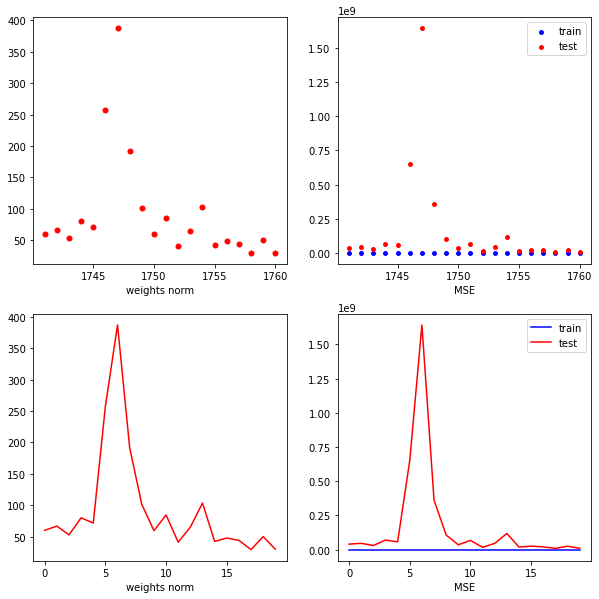

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].scatter(num_iter, norm, color='red', s = 25)
ax[0][0].set(xlabel = 'weights norm')

ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
ax[0][1].set(xlabel = 'MSE')
ax[0][1].legend()

ax[1][0].plot(norm, color='red')
ax[1][0].set(xlabel = 'weights norm')

ax[1][1].plot(MSE_train, color='blue', label='train')
ax[1][1].plot(MSE_test, color = 'red', label='test')
ax[1][1].set(xlabel = 'MSE')
ax[1][1].legend()
plt.show()

In [17]:
#найдем, при каком значении наблюдаются максимумы
weights_norm_max = max(norm)
MSE_test_max = max(MSE_test)
print('Максимум весов -', weights_norm_max, '\nМаксимум MSE - ', MSE_test_max)

index_weight = norm.index(weights_norm_max)
MSE_test_max = MSE_test.index(MSE_test_max)

#Нужно будет прибавить 2 к индексу, так как он не учитывает первоначальные 2 полезных признака
print('Достигаются при:')
print('weights - ', num_iter[index_weight] + 2)
print('MSE - ', num_iter[MSE_test_max] + 2)

Максимум весов - 386.90055535374415 
Максимум MSE -  1642410341.6955123
Достигаются при:
weights -  1749
MSE -  1749


Видим, что максимум по норме достигается на тех же значениях. Что и требовалось доказать. Давайте из научного интереса посмотрим на сумму весов и сумму модулей весов, которые мы сохранили при первом проходе.

In [22]:
for i, w in enumerate(weights1):
  print("%.5f %.5f" % (sum(abs(w[2:])), sum(w[2:])))

5.67851 1.78569
12.00780 1.93092
18.52230 2.02864
27.60651 3.22284
35.75592 6.35534
42.23034 4.31580
51.75500 3.72390
61.85035 4.74529
75.65166 1.23898
86.01459 6.48031
108.37618 4.40118
117.82502 3.57611
140.11951 5.79599
173.84753 2.31903
223.47663 6.90613
338.99688 6.94710
812.39799 10.03849
553.45914 -6.28987
350.72514 12.80625
274.88563 5.46037
242.24292 3.13411
226.09526 9.68882
209.56804 15.67281
191.23162 2.79648
174.12468 7.68845
170.48008 2.35744
168.92045 1.71842
158.09334 3.05734
155.15486 8.73243
151.44659 3.72867
144.46898 3.14267
150.91468 4.72736
144.06631 4.93901
141.79069 7.18955
137.53183 -3.11431
140.06726 1.74156
134.11833 -0.59373
134.42927 0.76022
133.28450 3.32454
130.78857 0.71652
130.47999 4.90355
129.81198 1.06987
127.21709 1.32536
127.79952 5.64580
126.34036 2.48903
125.26770 2.34568
125.41313 1.90454
123.29353 1.91701
121.16133 2.51427
124.03493 1.75936
120.06751 1.46482
120.05873 2.06781
119.06682 3.36830
121.12866 3.03024
118.15823 2.43142
119.22520 -0.28

Любопытно, что сумма модулей у лишних параметров достаточно велика, что нам не нужно, однако в сумме она близка к 0. Когда мы добавим регуляризацию, в теории, сумма модулей уменьшится тоже.

##Выводы
Норма весов повторяет поведение ошибки на тесте.

# Градиентный спуск и SGD

Вот мы и подошли к самой сложной части исследования. Нужно проверить эффекты, привиденные выше, используя градиентный спуск. Сложность в том, что для каждой отдельной модели подбираются свои гиперпараметры для обучения, а в нашем случае модель постоянно меняется и подобрать конкретные оптимальные константы будет сложно. (В конце исследования будут некоторые мои наработки, но там есть еще над чем поработать. Также там будет реализация обычного градиентного спуска.) Поэтому мы будем использовать библиотечную реализацию (sklearn, SGDRegressor), так как она быстрее и находит минимумы лучше за счет некоторых эвристик и подбираемых параметров.

Для начала давайте поймем, learning rate какого типа лучше использовать. Возьем SGDRegressor из sklearn и посмотрим на результаты. Предварительно было проведено еще одно исследование, где выяснилось, что при адаптивном или стандартном (когда величина шага не меняется) методе обучения оптимально брать коэфицент eta0 = 1e-8. Именно при нем наблюдается классический двойной спуск. Однако при адаптивном методе обучения можно увидеть еще один любопытный эффект. Мы можем наблюдать большой пик ошибки на тесте на том же количестве параметров, который в последствии будет снижаться, но также в это время возрастает ошибка и на обучении. Что обычно не происходит при классическом двойном спуске (loss на train падает, а на test растет). Интересно как раз то, что это наблюдается при количестве признаков примерно равному количеству выборки, как и при обычном двойном спуске. Все эти эффекты можно будет пронаблюдать ниже. При invscaling лучше использовать eta0 = 1e-6. Давайте теперь посмотрим на результаты

## Создание датасета
В процессе исследования мы будем менять количество элементов в тестовой/обучающей выборке. Поэтому сделаем функцию для удобства.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def make_dataset(num_elements = 50):
    #Пока не будем менять константы, если будет нужно, модернизируем функцию
    a = 20
    b = 3 
    c = 4

    x0 = 1
    y0 = 2
    z0 = 3

    norm = np.array([a, b, c])
    point = np.array([x0, y0, z0])
    #Получим d
    d = -point.dot(norm)
    #Построим точки для плоскости

    left_border_plane = -100
    right_border_plane = 100

    x = np.linspace(left_border_plane, right_border_plane, num_elements)
    y = np.linspace(left_border_plane, right_border_plane, num_elements)

    X, Y = np.meshgrid(x, y)

    Z = (-a * X - b * Y - d) * 1. / c

    #Растянем наши матрицы в одномерный массив
    x_data = X.ravel()
    y_data = Y.ravel()
    z_data = Z.ravel()

    n = num_elements * num_elements
    #Добавим шума
    x_data = x_data + 5 * np.random.randn(n)
    y_data = y_data + 5 * np.random.randn(n)
    z_data = z_data + np.random.randn(n)

    #Составим матрицу признаков
    data = pd.DataFrame({'x' : x_data, 'y' : y_data, 'z' : z_data})
    #Перемешаем данные (можно этого и не делать, потому что далее train_test_split все перемешает, но на всякий случаем сделаем)
    data = data.sample(frac = 1)
    #Разделим выборку на признаки и таргет
    Fich = data.iloc[ : , : -1]
    target = data['z']
    return Fich, target, left_border_plane, right_border_plane

##Вспомогательная функция
Эта функция будет увеличивать число признаков и выдавать ошибку на тесте, обучении.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def skSGD_MSE_on_features(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 1, lr = 'optimal', eta0 = 0.01):  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  MSE_train = []
  MSE_test = []
  num_iter = []
  
  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(k) for k in range(i, i + step)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
    
    #Не забудем выключить регуляризацию
    regressor = SGDRegressor(learning_rate = lr, penalty=None, eta0 = eta0)
    regressor.fit(X_train, target_train)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    num_iter.append(i + step)
  
  return MSE_train, MSE_test, num_iter

##Вид learning rate
Итак, давайте определимся с видом изменения learning rate. Библиотека sklearn предоставляет 4 вида leaerning rate: constant, optimal, invscaling, adaptive. Определимся с лучшими видами и попробуем реализовать наши идеи на них.

In [ ]:
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings("ignore")
#Объявим нужные переменные
Fich, target, left_border_plane, right_border_plane = make_dataset(25)
rand_size = (right_border_plane - left_border_plane) // 2
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = 1e-8

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

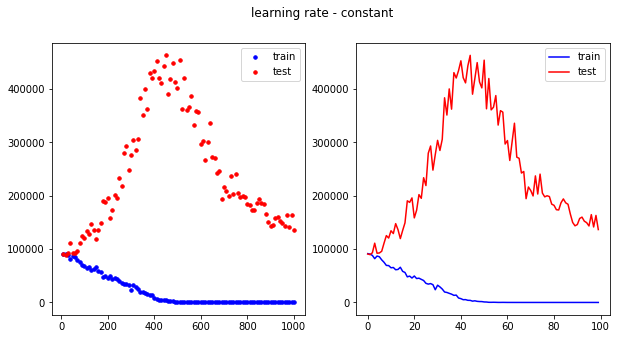

  0%|          | 0/100 [00:00<?, ?it/s]

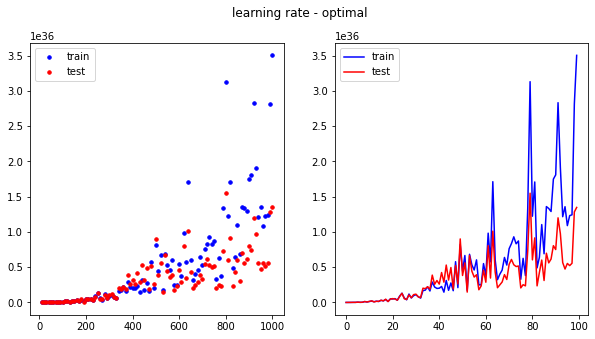

  0%|          | 0/100 [00:00<?, ?it/s]

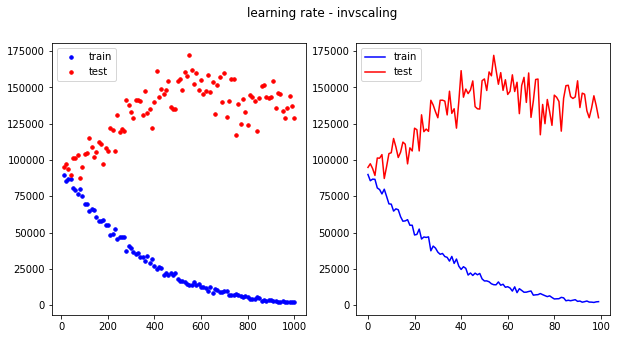

  0%|          | 0/100 [00:00<?, ?it/s]

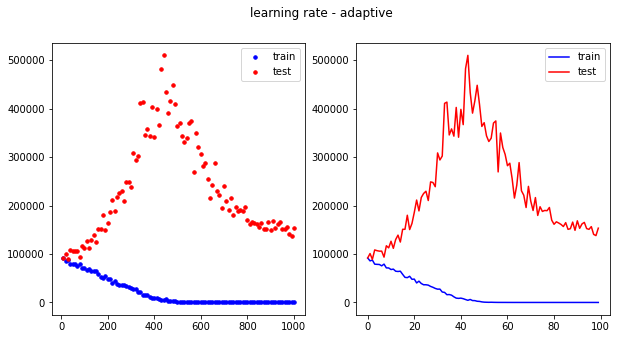

In [ ]:
for lr in tqdm(learning_rate):
  MSE_train, MSE_test, num_iter = skSGD_MSE_on_features(Fich, target, right_border = 1000, step = 10, lr = lr, rand_size = rand_size, eta0=eta0)

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  fig.suptitle(f'learning rate - {lr}')
  ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 12)
  ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 12)
  ax[0].legend()

  ax[1].plot(MSE_train, color='blue', label='train')
  ax[1].plot(MSE_test, color = 'red', label='test')
  ax[1].legend()
  plt.show()

Вдруг у других методов наблюдаются двойной спуск при других параметрах? Давайте проверим.

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

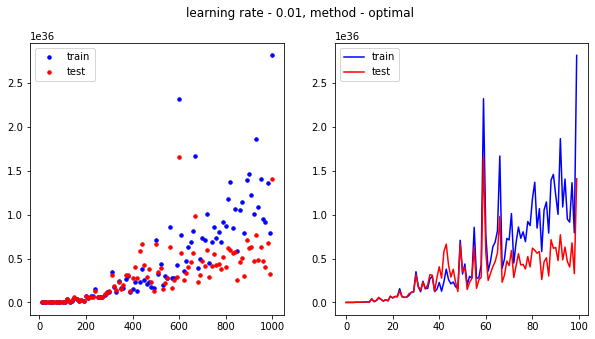

  0%|          | 0/100 [00:00<?, ?it/s]

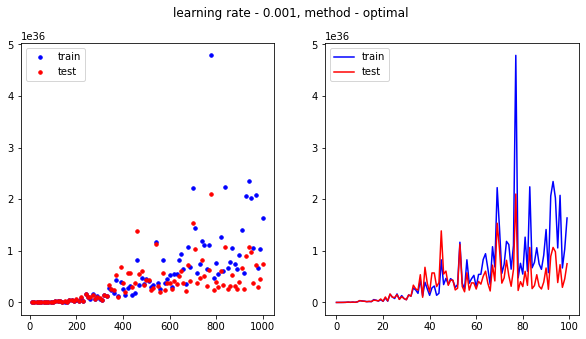

  0%|          | 0/100 [00:00<?, ?it/s]

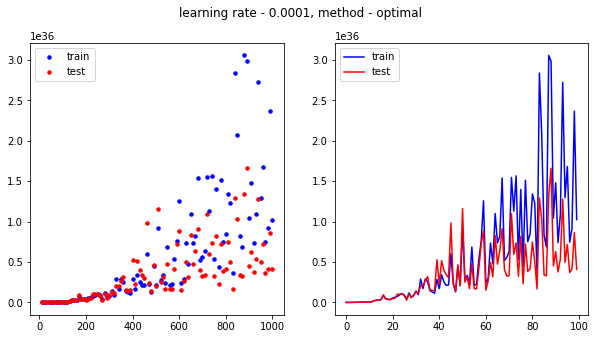

  0%|          | 0/100 [00:00<?, ?it/s]

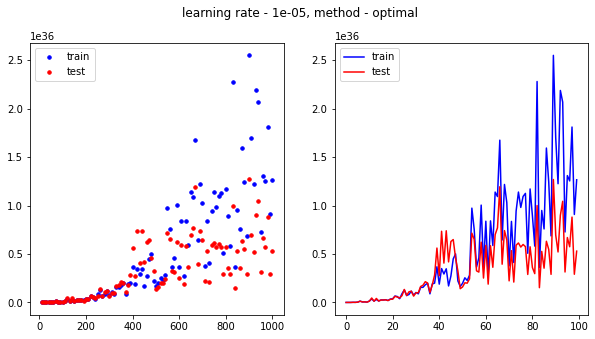

  0%|          | 0/100 [00:00<?, ?it/s]

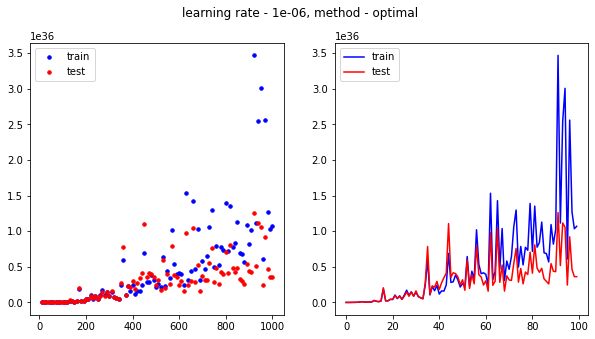

  0%|          | 0/100 [00:00<?, ?it/s]

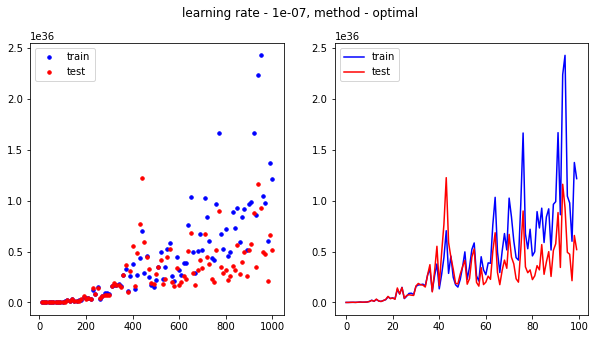

  0%|          | 0/100 [00:00<?, ?it/s]

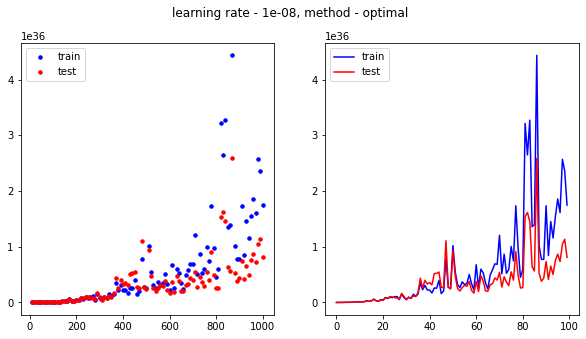

  0%|          | 0/100 [00:00<?, ?it/s]

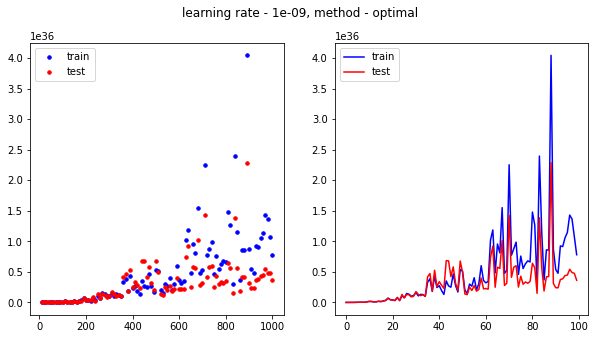

  0%|          | 0/100 [00:00<?, ?it/s]

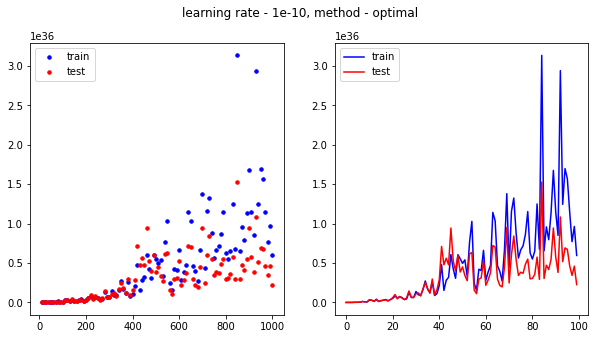

  0%|          | 0/100 [00:00<?, ?it/s]

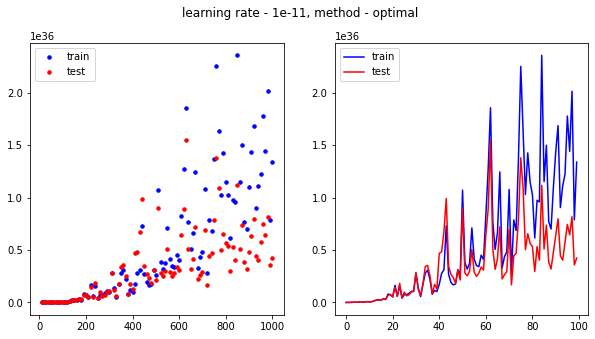

  0%|          | 0/100 [00:00<?, ?it/s]

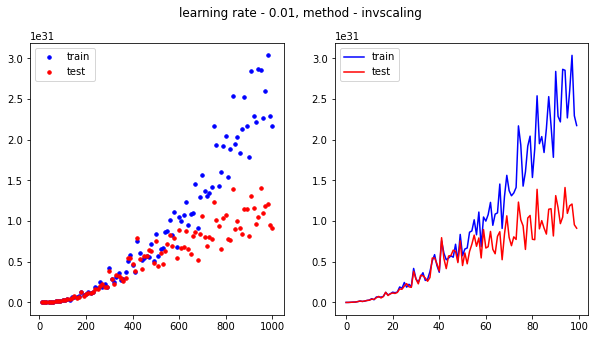

  0%|          | 0/100 [00:00<?, ?it/s]

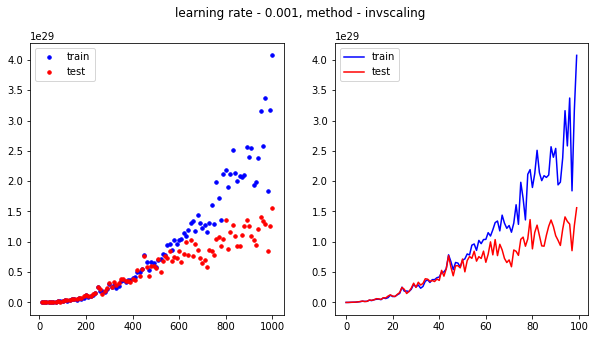

  0%|          | 0/100 [00:00<?, ?it/s]

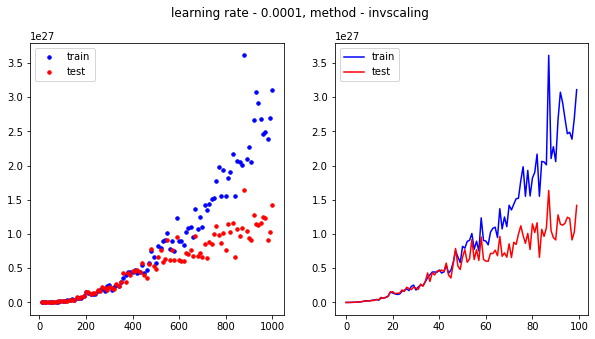

  0%|          | 0/100 [00:00<?, ?it/s]

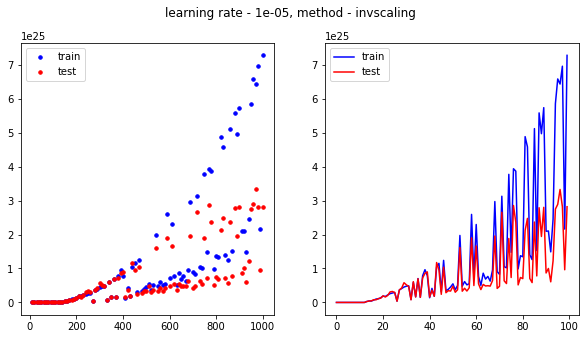

  0%|          | 0/100 [00:00<?, ?it/s]

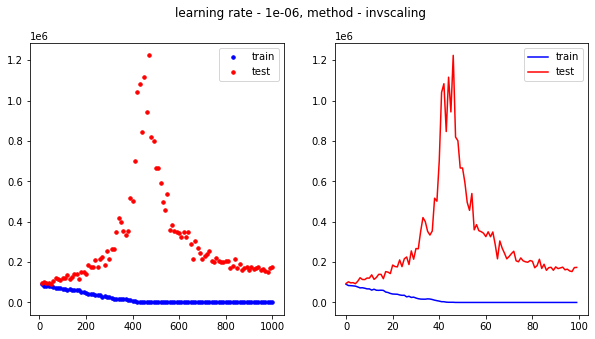

  0%|          | 0/100 [00:00<?, ?it/s]

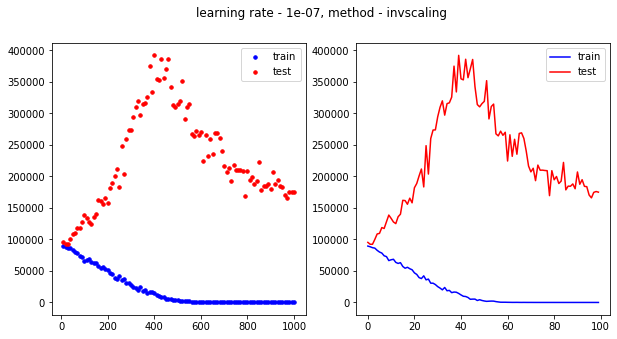

  0%|          | 0/100 [00:00<?, ?it/s]

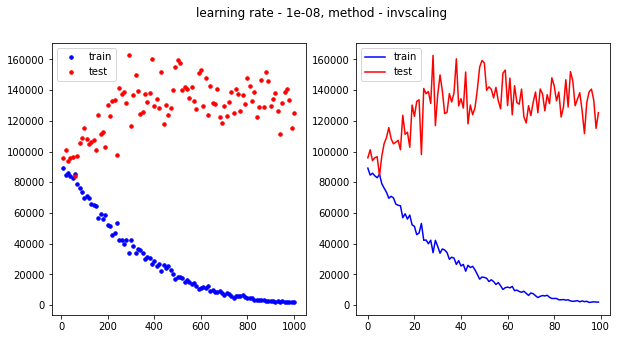

  0%|          | 0/100 [00:00<?, ?it/s]

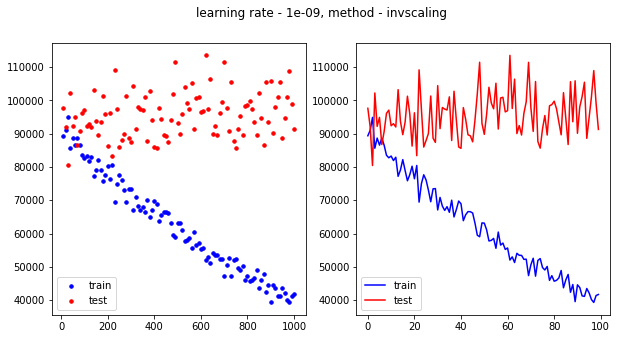

  0%|          | 0/100 [00:00<?, ?it/s]

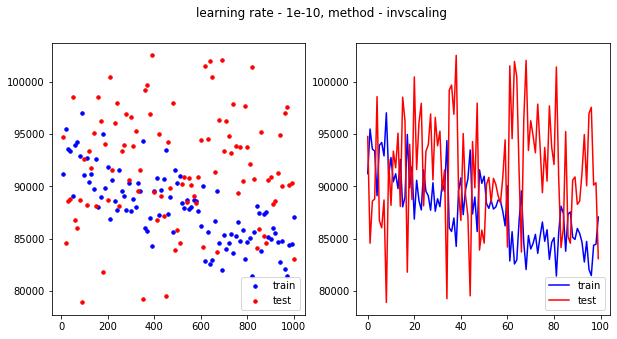

  0%|          | 0/100 [00:00<?, ?it/s]

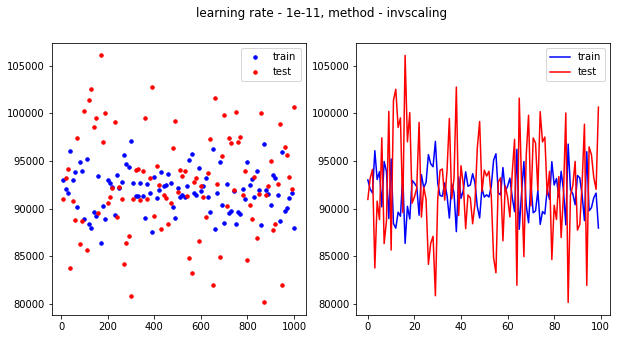

In [ ]:
learning_rate = ['optimal', 'invscaling']
eta = [0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
for lr in tqdm(learning_rate):
  for eta0 in eta:
    MSE_train, MSE_test, num_iter = skSGD_MSE_on_features(Fich, target, right_border = 1000, step = 10, lr = lr, rand_size = rand_size, eta0 = eta0)

    MSE_train1, MSE_test1, num_iter1 = MSE_train.copy(), MSE_test.copy(), num_iter.copy()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle(f'learning rate - {eta0}, method - {lr}')
    ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 12)
    ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 12)
    ax[0].legend()

    ax[1].plot(MSE_train, color='blue', label='train')
    ax[1].plot(MSE_test, color = 'red', label='test')
    ax[1].legend()
    plt.show()

Видим, что пик наблюдается при методе invscaling и eta0 = 1e-6. А при optimal пик не заметен или мы его пропустили. Далее мы будем использовать только constant и adaptive методы, так как они используют более очевидные подходы к обучению.

## Зависимость количества признаков от выборки

### Adaptive learning rate

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Fich, target, left_border_plane, right_border_plane = make_dataset(25)

#Объявим нужные переменные
rand_size = (right_border_plane - left_border_plane) // 2
eta = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

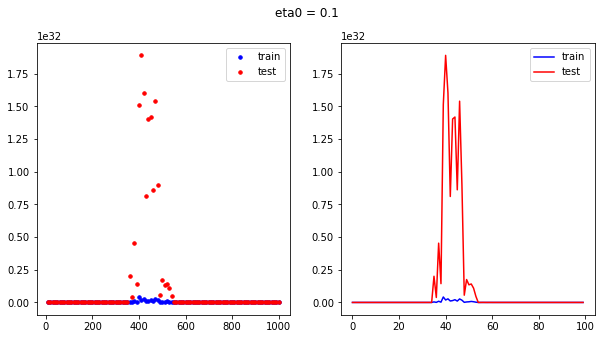

  0%|          | 0/100 [00:00<?, ?it/s]

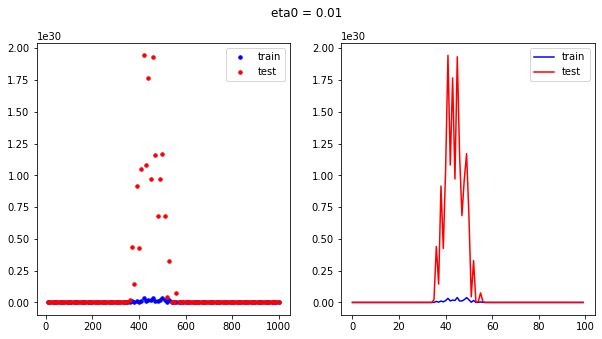

  0%|          | 0/100 [00:00<?, ?it/s]

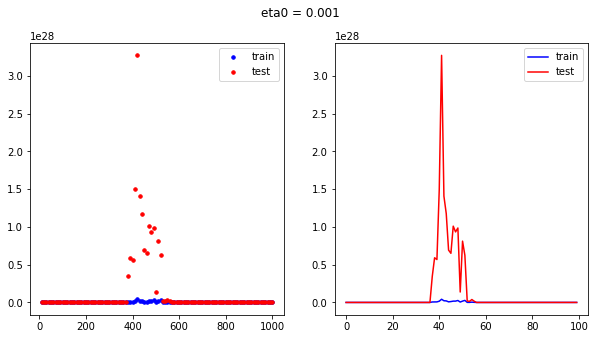

  0%|          | 0/100 [00:00<?, ?it/s]

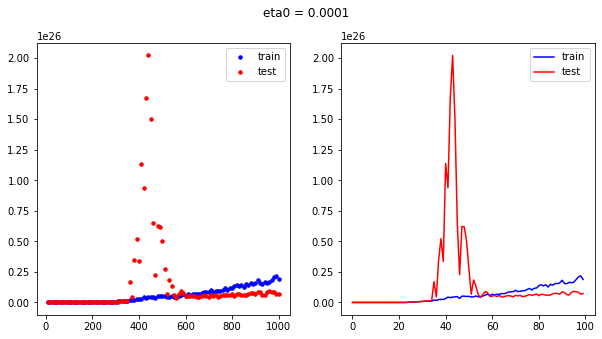

  0%|          | 0/100 [00:00<?, ?it/s]

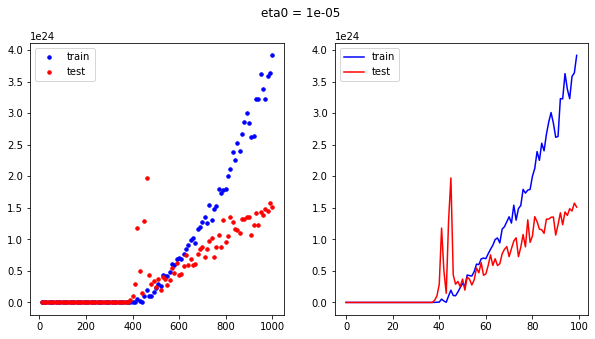

  0%|          | 0/100 [00:00<?, ?it/s]

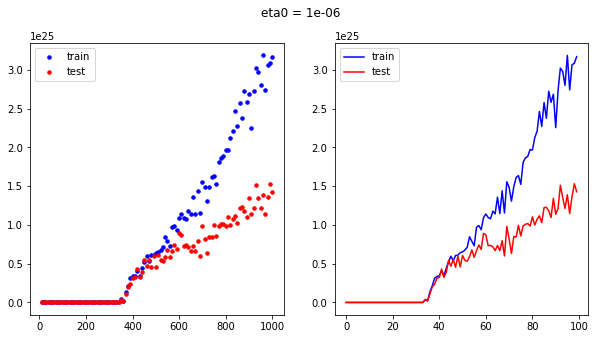

  0%|          | 0/100 [00:00<?, ?it/s]

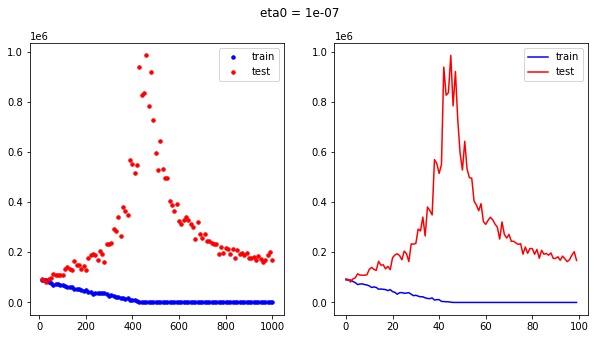

  0%|          | 0/100 [00:00<?, ?it/s]

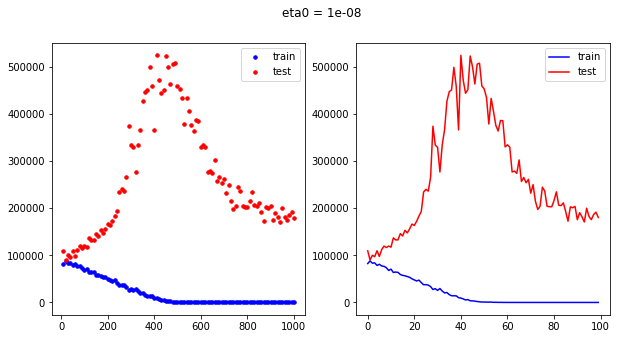

  0%|          | 0/100 [00:00<?, ?it/s]

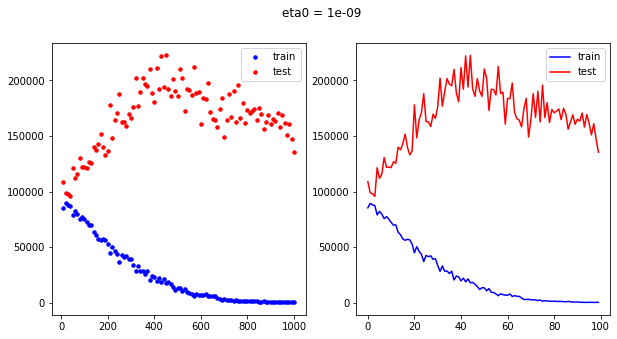

  0%|          | 0/100 [00:00<?, ?it/s]

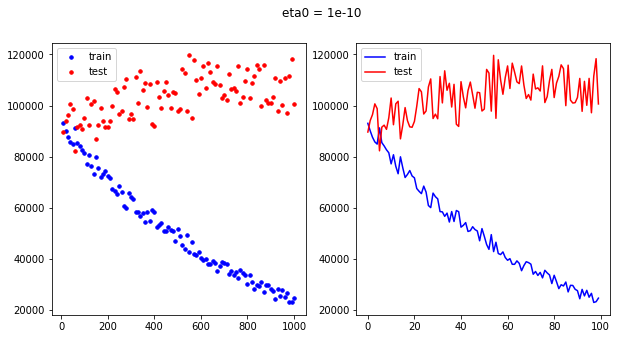

  0%|          | 0/100 [00:00<?, ?it/s]

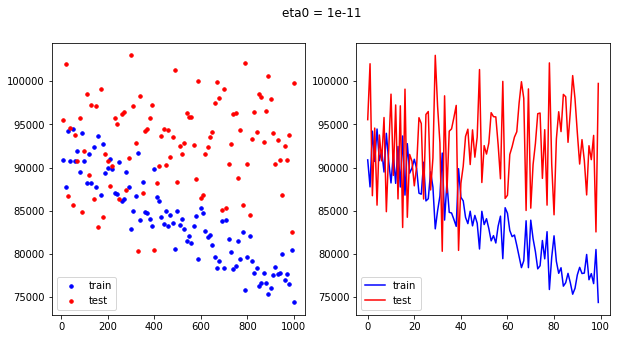

  0%|          | 0/100 [00:00<?, ?it/s]

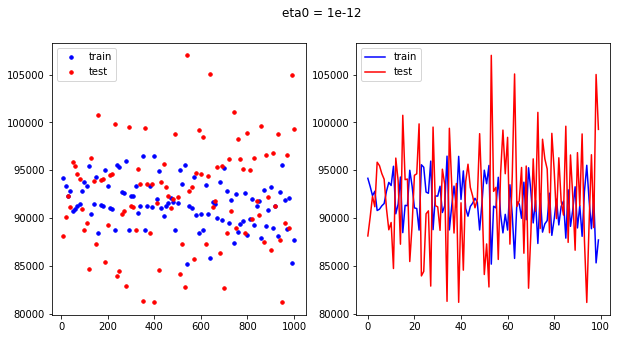

In [ ]:
for eta0 in tqdm(eta):
  MSE_train, MSE_test, num_iter = skSGD_MSE_on_features(Fich, target, right_border = 1000, step = 10, rand_size = rand_size, lr = 'adaptive', eta0 = eta0)

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  fig.suptitle(f'eta0 = {eta0}')
  ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 12)
  ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 12)
  ax[0].legend()

  ax[1].plot(MSE_train, color='blue', label='train')
  ax[1].plot(MSE_test, color = 'red', label='test')
  ax[1].legend()
  plt.show()

Можем видеть эффект описанный выше. При малых значениях learning rate ([1e-5, 0.1]) мы можем видеть очень большой пик ошибки (больше чем при классическом двойном спуске, который наблюдается при eta0 = [1e-8, 1e-7]. Если посмотреть на график в первом случае порядок 1e32, а во втором 1e5). Любопытно, что, при увеличении нашего гиперпараметра eta0, пик начинает уменьшаться, пока не пропадет совсем. Также видим, что оба пика наблюдаются при значениях в окрестности 440. Так как мы взяли $25*25$ элементов и потом отдали 0.3 на тест. Получается $25*25*0.7 = 437.5$. Значит пик при градиентном спуске наблюдается при тех же значениях, что логично, ведь градиентный спуск в идеале находит те же минимумы, что и аналитический метод.

А может мы просто поймали частный случай? Давайте сделаем новую выборку с большим числом в выборке. В этот раз возьмем 50 первоначальных элементов (с помощью некоторых преобразований они возрастут до $50*50$, подробнее в функции make_dataset выше)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Fich, target, left_border_plane, right_border_plane = make_dataset(50)

#Объявим нужные переменные
rand_size = (right_border_plane - left_border_plane) // 2
eta = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

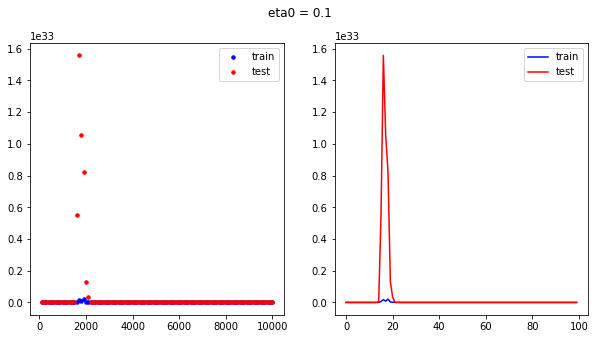

  0%|          | 0/100 [00:00<?, ?it/s]

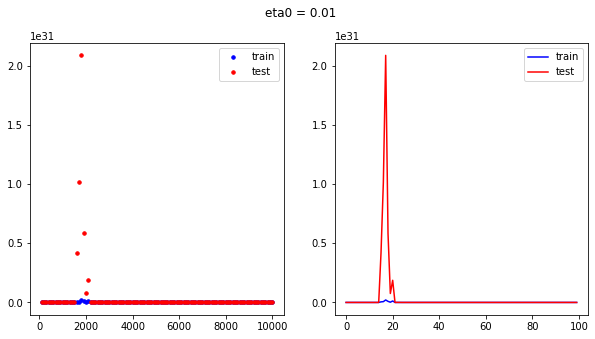

  0%|          | 0/100 [00:00<?, ?it/s]

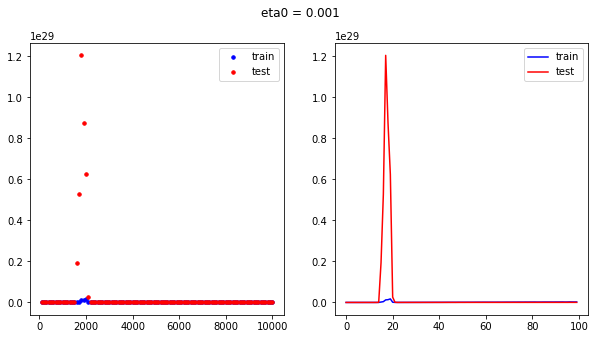

  0%|          | 0/100 [00:00<?, ?it/s]

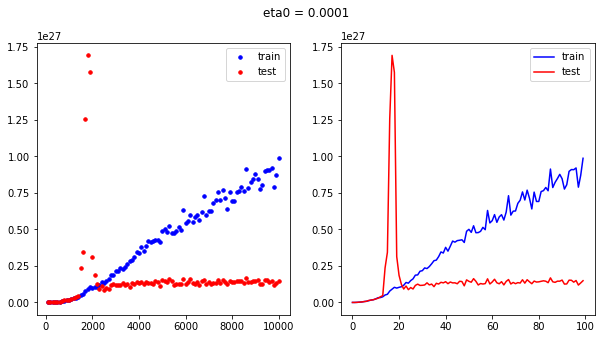

  0%|          | 0/100 [00:00<?, ?it/s]

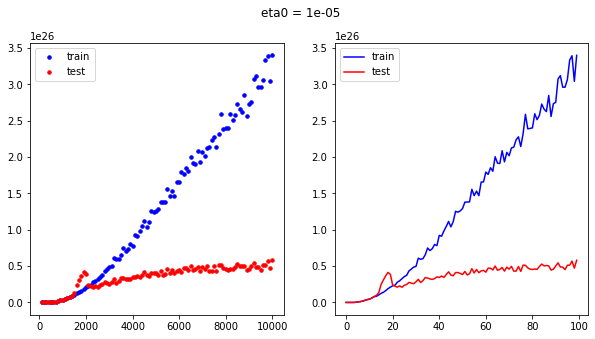

  0%|          | 0/100 [00:00<?, ?it/s]

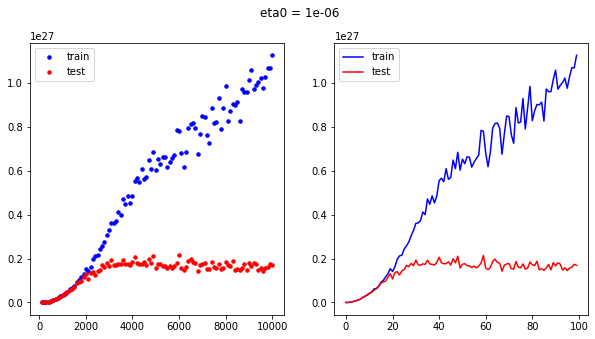

  0%|          | 0/100 [00:00<?, ?it/s]

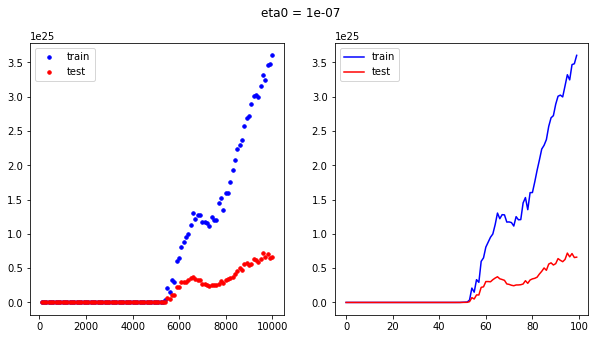

  0%|          | 0/100 [00:00<?, ?it/s]

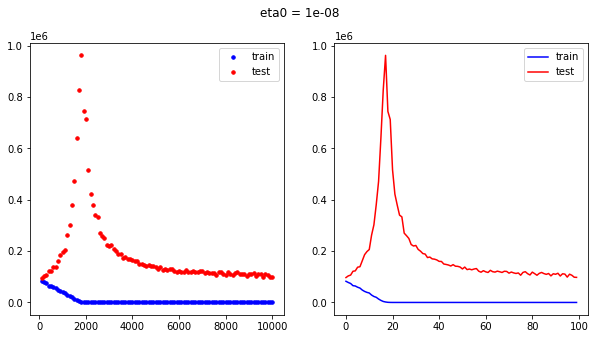

  0%|          | 0/100 [00:00<?, ?it/s]

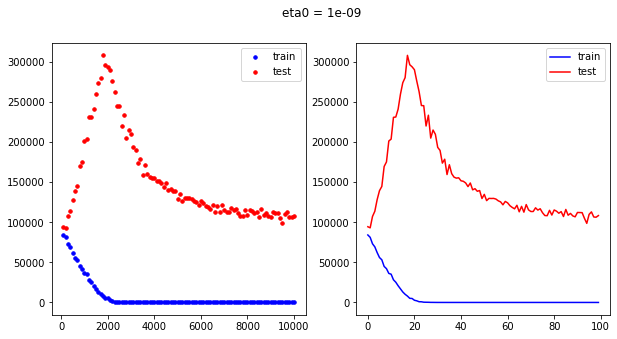

  0%|          | 0/100 [00:00<?, ?it/s]

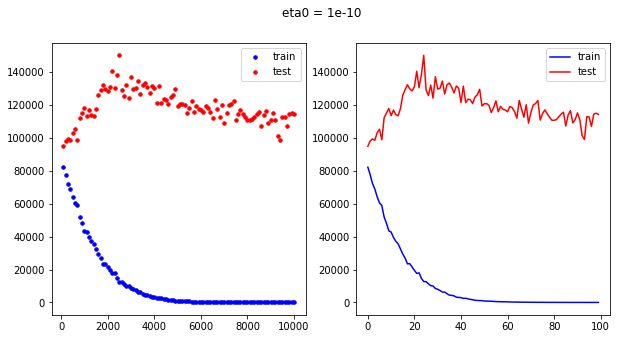

  0%|          | 0/100 [00:00<?, ?it/s]

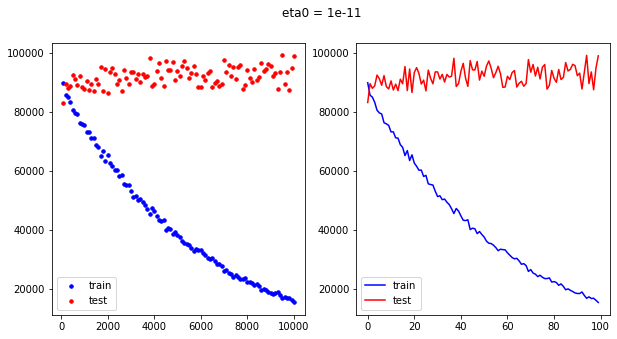

  0%|          | 0/100 [00:00<?, ?it/s]

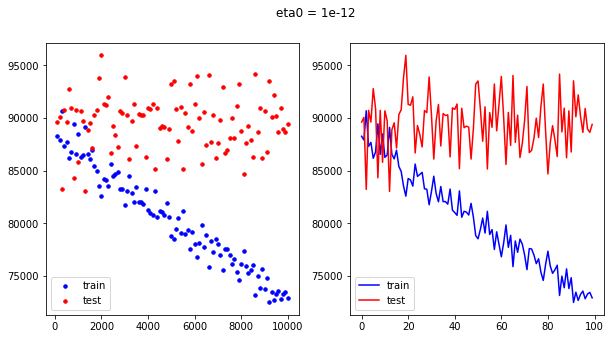

In [ ]:
for eta0 in tqdm(eta):
  MSE_train, MSE_test, num_iter = skSGD_MSE_on_features(Fich, target, right_border = 10000, step = 100, rand_size = rand_size, eta0 = eta0)

  MSE_train1, MSE_test1, num_iter1 = MSE_train.copy(), MSE_test.copy(), num_iter.copy()

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  fig.suptitle(f'eta0 = {eta0}')
  ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 12)
  ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 12)
  ax[0].legend()

  ax[1].plot(MSE_train, color='blue', label='train')
  ax[1].plot(MSE_test, color = 'red', label='test')
  ax[1].legend()
  plt.show()

Нет, как бы нам не хотелось увидеть что-то новое, видим ту же самую картину. Только двойной спуск теперь хорошо наблюдается при [1e-9, 1e-8].

### Constant learning rate

Теперь посмотрим, что происходит при стохастическом градиентном спуске без модификации величины шага. Выборка - 25.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Объявим нужные переменные
Fich, target, left_border_plane, right_border_plane = make_dataset(25)
rand_size = (right_border_plane - left_border_plane) // 2
eta = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

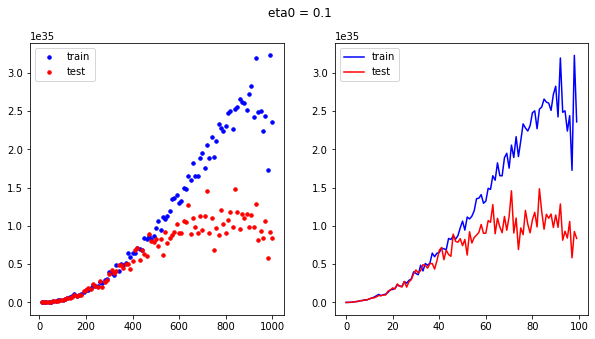

  0%|          | 0/100 [00:00<?, ?it/s]

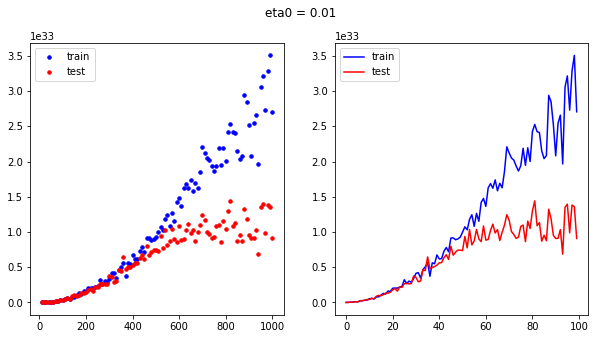

  0%|          | 0/100 [00:00<?, ?it/s]

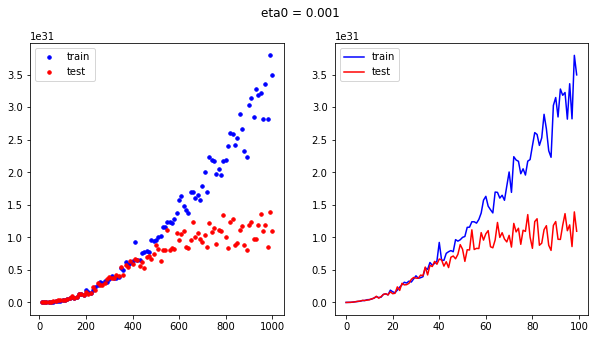

  0%|          | 0/100 [00:00<?, ?it/s]

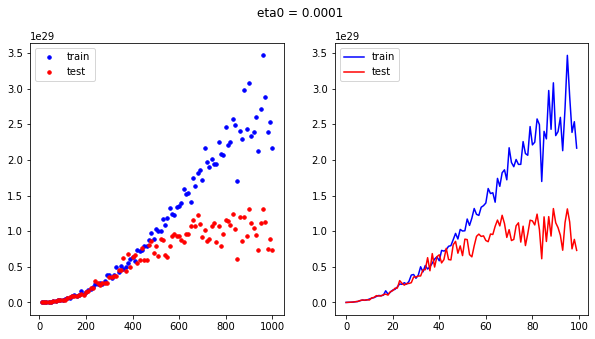

  0%|          | 0/100 [00:00<?, ?it/s]

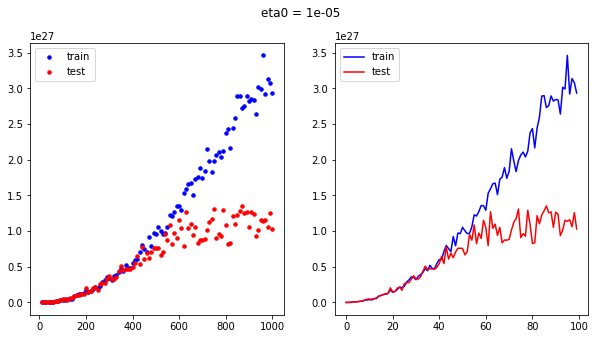

  0%|          | 0/100 [00:00<?, ?it/s]

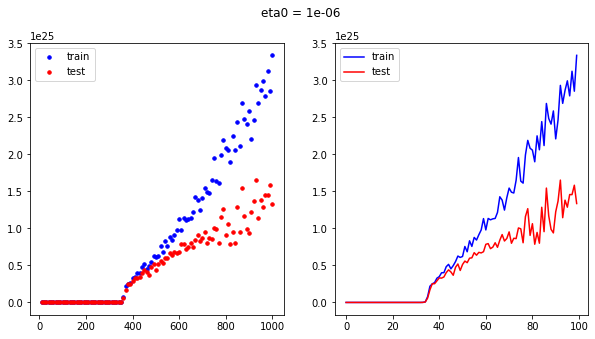

  0%|          | 0/100 [00:00<?, ?it/s]

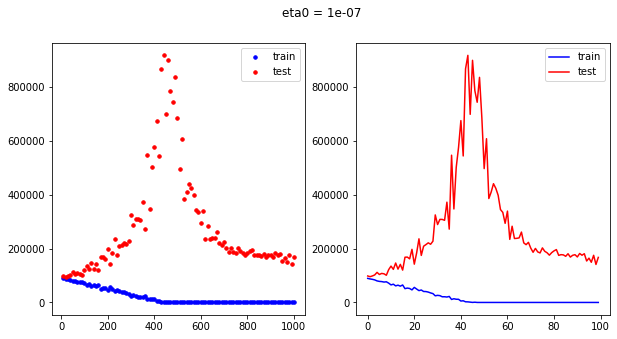

  0%|          | 0/100 [00:00<?, ?it/s]

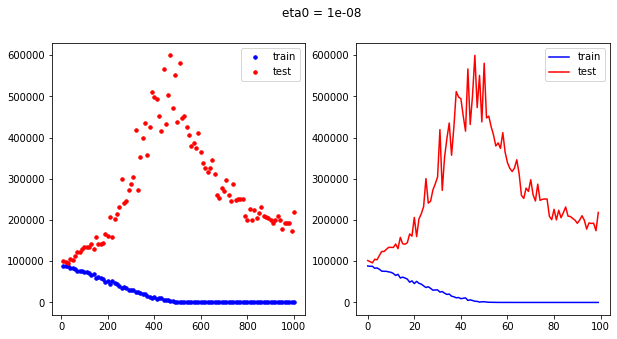

  0%|          | 0/100 [00:00<?, ?it/s]

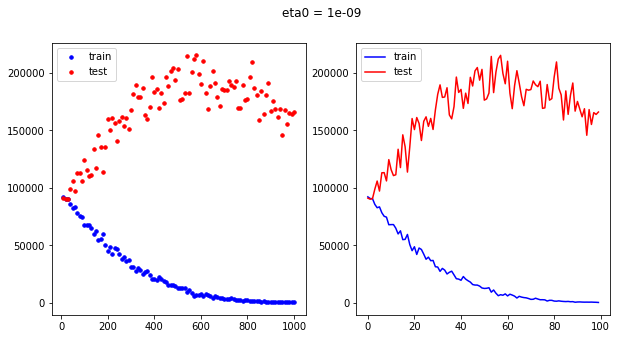

  0%|          | 0/100 [00:00<?, ?it/s]

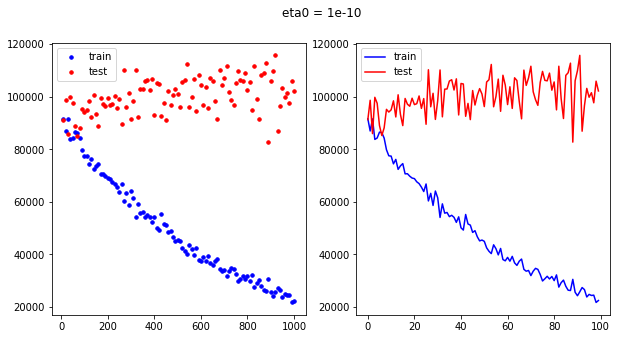

  0%|          | 0/100 [00:00<?, ?it/s]

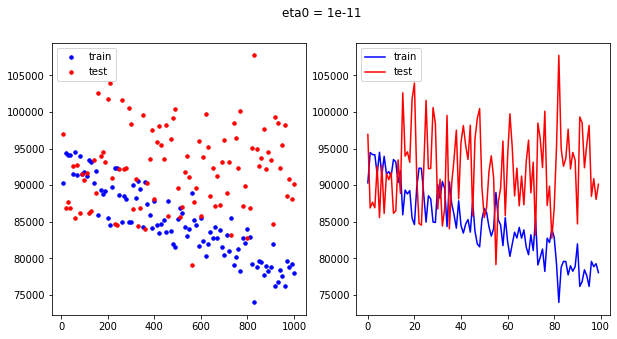

  0%|          | 0/100 [00:00<?, ?it/s]

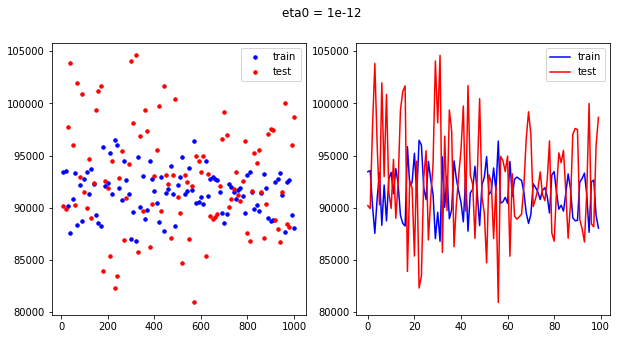

In [ ]:
answers = []
for eta0 in tqdm(eta):
  MSE_train, MSE_test, num_iter = skSGD_MSE_on_features(Fich, target, right_border = 1000, step = 10, rand_size = rand_size, lr = 'constant', eta0 = eta0)

  answers.append([MSE_train, MSE_test, num_iter])

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  fig.suptitle(f'eta0 = {eta0}')
  ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 12)
  ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 12)
  ax[0].legend()

  ax[1].plot(MSE_train, color='blue', label='train')
  ax[1].plot(MSE_test, color = 'red', label='test')
  ax[1].legend()
  plt.show()

Сразу видим пропажу первого пика при малых значениях. Все остальное практически полностью совпадает с адаптивным методом.

Ниже будет небольшое объяснение, почему при малых eta0 графики похожи

***
Это объясняется устройством библиотеки sklearn, SGDRegressor в частности (или если быть дотошным, то в функции _plain_sgd, которая является основой для обучения линейных моделей в этой библиотеке). Можно посмотреть открытый код этой библиотеки на github (можно сразу _plain_sgd, так как основные операции происходят тут) и увидеть, что происходит. Ниже нужный нам отрывок:

    if no_improvement_count >= n_iter_no_change:
        if learning_rate == ADAPTIVE and eta > 1e-6:
            eta = eta / 5
            no_improvement_count = 0
        else:
            if verbose:
                with gil:
                    print("Convergence after %d epochs took %.2f "
                          "seconds" % (epoch + 1, time() - t_start))
            break

Отсюда нам надо понимать только, что при малых изменениях n_iter_no_change раз (что по умолчанию равно 5) мы либо выходим из цикла обучения, либо, если мы используем адаптивный метод, то уменьшаем гиперпараметр в 5 раз и продолжаем обучаться по эпохам. Также видим, что это происходит не бесконечно, а пока eta0 > 1e-6. Именно поэтому и графики похожи - адаптивный метод просто превратился в стандартный (constant).
***
Скорее всего первый пик пропал из-за плохого оптимума, который недосягаем при таких настройках.

Также давайте увеличим выборку и посмотрим на результат.

In [23]:
import warnings
warnings.filterwarnings("ignore")
#Объявим нужные переменные
Fich, target, left_border_plane, right_border_plane = make_dataset(50)
rand_size = (right_border_plane - left_border_plane) // 2
eta = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

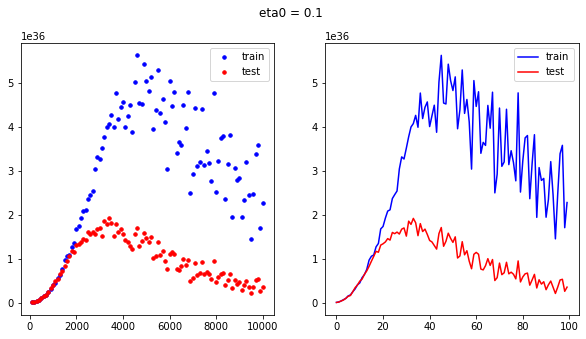

  0%|          | 0/100 [00:00<?, ?it/s]

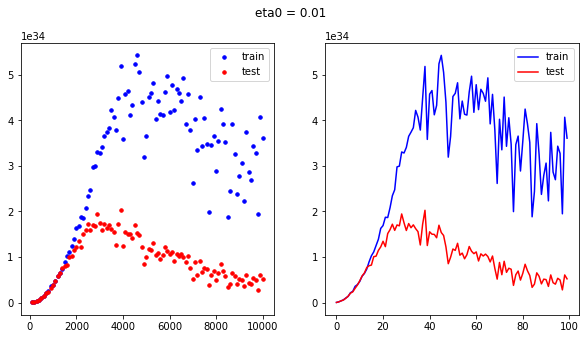

  0%|          | 0/100 [00:00<?, ?it/s]

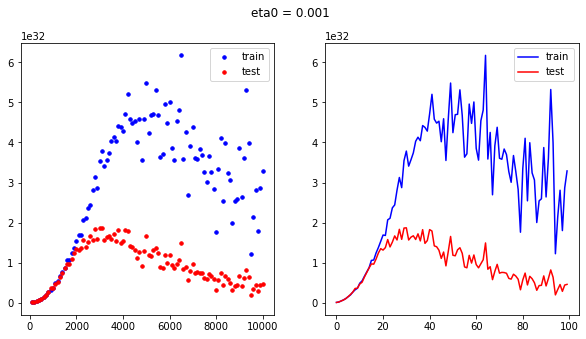

  0%|          | 0/100 [00:00<?, ?it/s]

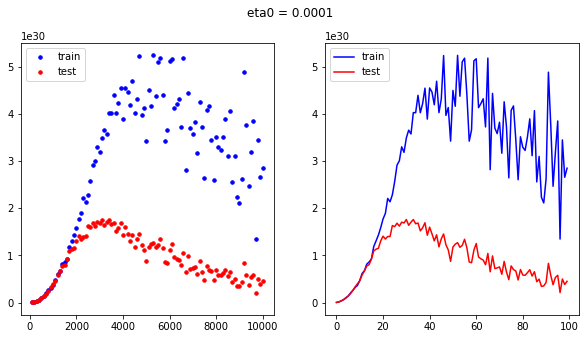

  0%|          | 0/100 [00:00<?, ?it/s]

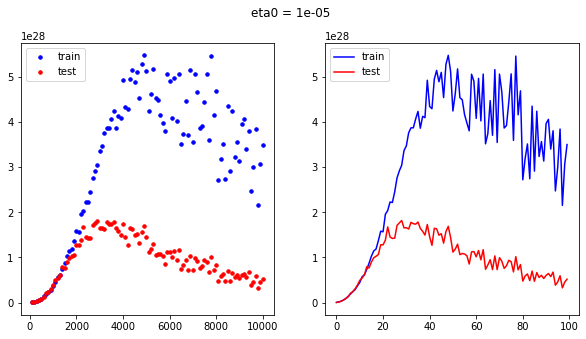

  0%|          | 0/100 [00:00<?, ?it/s]

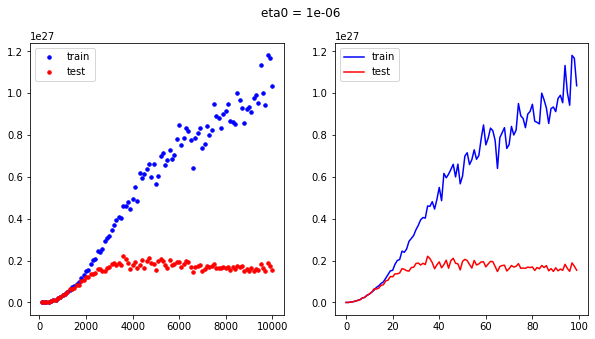

  0%|          | 0/100 [00:00<?, ?it/s]

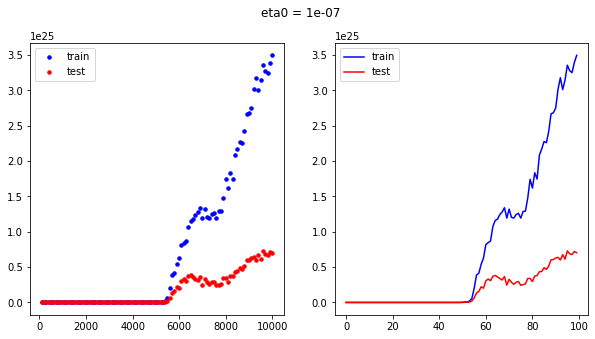

  0%|          | 0/100 [00:00<?, ?it/s]

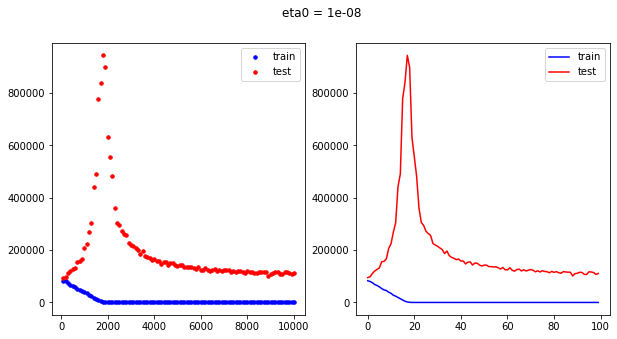

  0%|          | 0/100 [00:00<?, ?it/s]

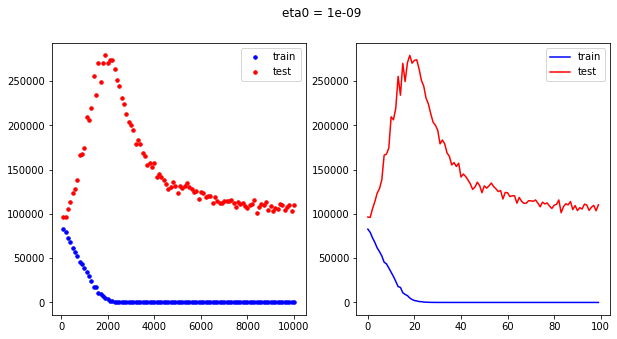

  0%|          | 0/100 [00:00<?, ?it/s]

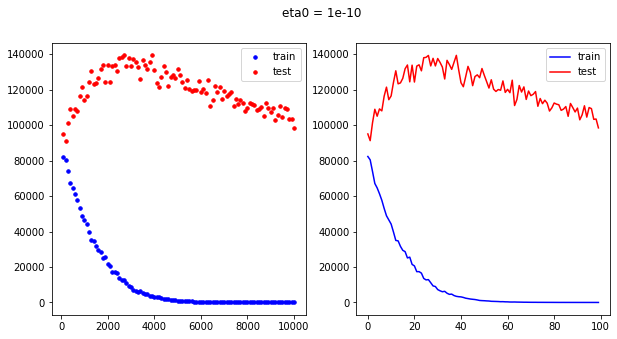

  0%|          | 0/100 [00:00<?, ?it/s]

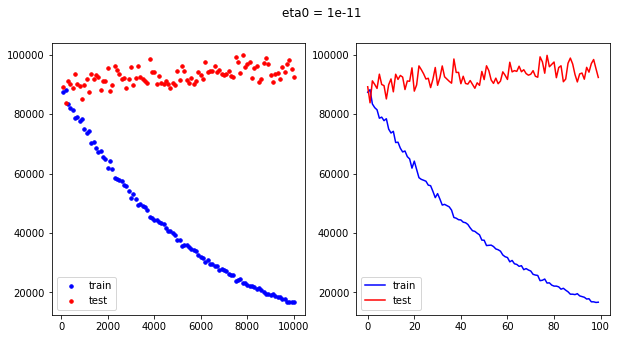

  0%|          | 0/100 [00:00<?, ?it/s]

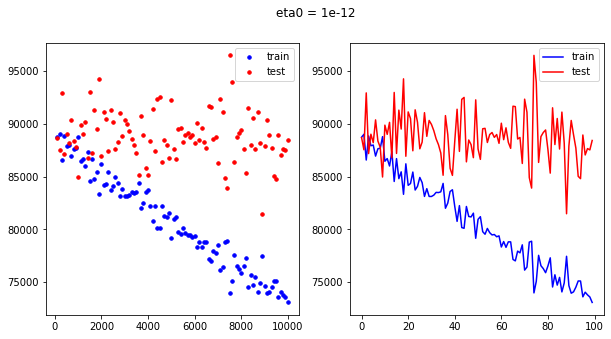

In [ ]:
for eta0 in tqdm(eta):
  MSE_train, MSE_test, num_iter = skSGD_MSE_on_features(Fich, target, right_border = 10000, step = 100, rand_size = rand_size, lr = 'constant', eta0 = eta0)

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  fig.suptitle(f'eta0 = {eta0}')
  ax[0].scatter(num_iter, MSE_train, color='blue', label='train', s = 12)
  ax[0].scatter(num_iter, MSE_test, color = 'red', label='test', s = 12)
  ax[0].legend()

  ax[1].plot(MSE_train, color='blue', label='train')
  ax[1].plot(MSE_test, color = 'red', label='test')
  ax[1].legend()
  plt.show()

Как ни странно, ничего не поменялось.

## Поведение нормы весов

### Вспомогательная функция

Немного модифицируем нашу функцию

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def skSGD_MSE_and_weights(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 1, lr = 'optimal', eta0 = 0.01, mode = 0):  
  '''mode:
  (0) MSE and weights returned
  (1) only MSE returned
  (2) only weights returned
  '''
  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  weights = []
  inter = []
  MSE_train = []
  MSE_test = []
  num_iter = []
  
  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(k) for k in range(i, i + step)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
    
    #Не забудем выключить регуляризацию
    regressor = SGDRegressor(learning_rate = lr, penalty=None, eta0 = eta0)
    regressor.fit(X_train, target_train)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    weights.append(regressor.coef_)
    inter.append(regressor.intercept_)
    num_iter.append(i + step)
  
  if mode == 0:
    return MSE_train, MSE_test, weights, inter, num_iter
  elif mode == 1:
    return MSE_train, MSE_test, num_iter
  else:
    return weights, inter, num_iter

###Adaptive learning rate

Посмотрим теперь на все сразу и на веса и на MSE и сравним графики.

In [3]:
import warnings
warnings.filterwarnings("ignore")

Fich, target, left_border_plane, right_border_plane = make_dataset(25)

#Объявим нужные переменные
rand_size = (right_border_plane - left_border_plane) // 2
eta = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

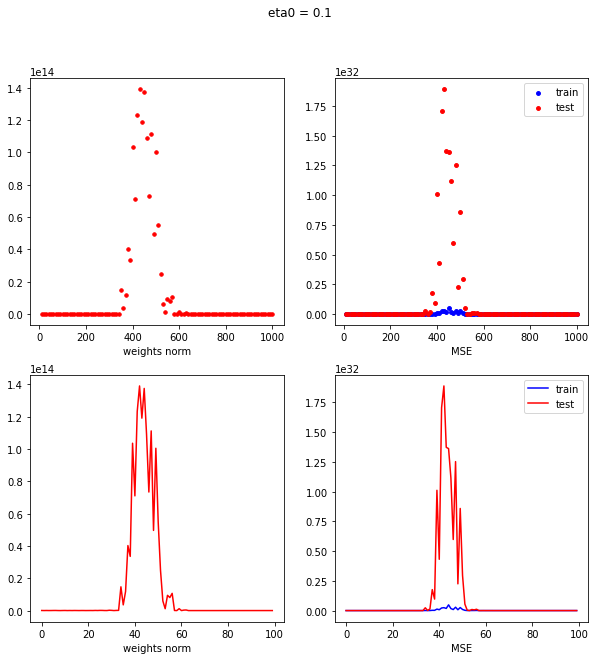

  0%|          | 0/100 [00:00<?, ?it/s]

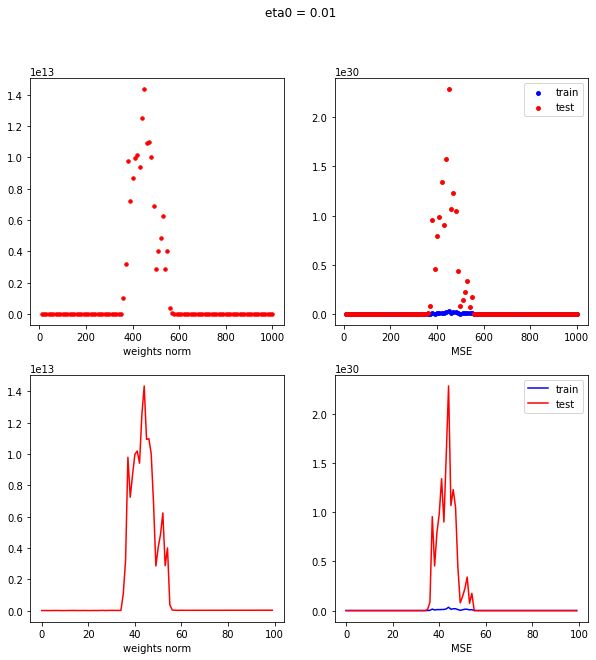

  0%|          | 0/100 [00:00<?, ?it/s]

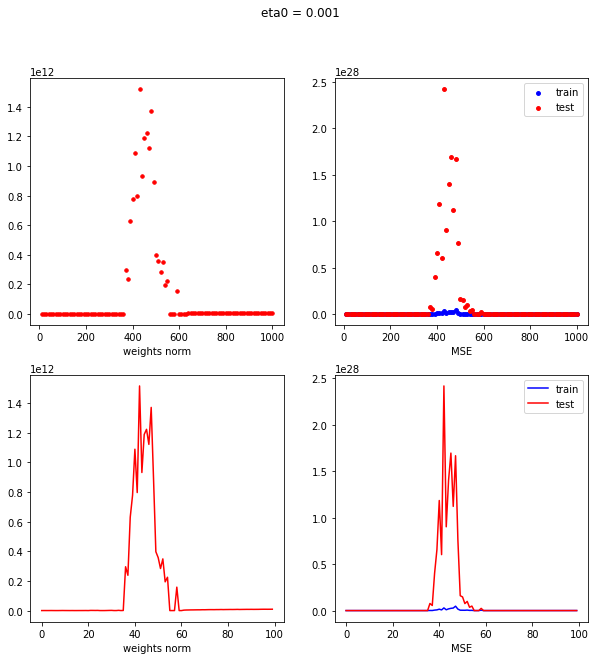

  0%|          | 0/100 [00:00<?, ?it/s]

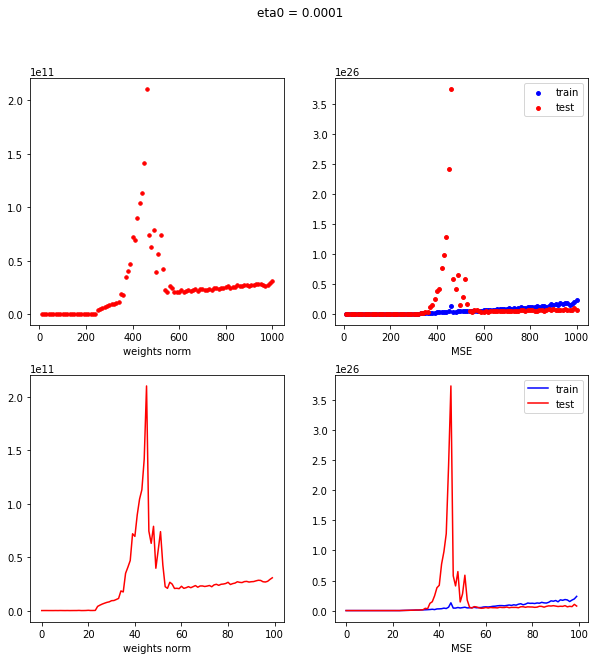

  0%|          | 0/100 [00:00<?, ?it/s]

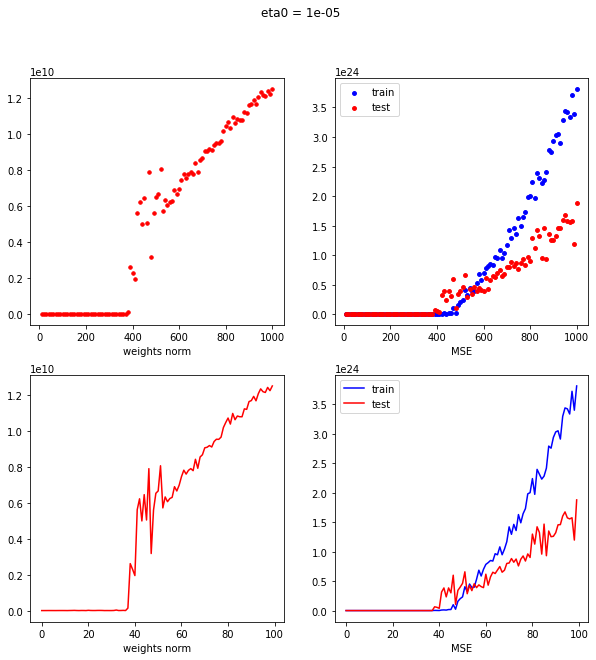

  0%|          | 0/100 [00:00<?, ?it/s]

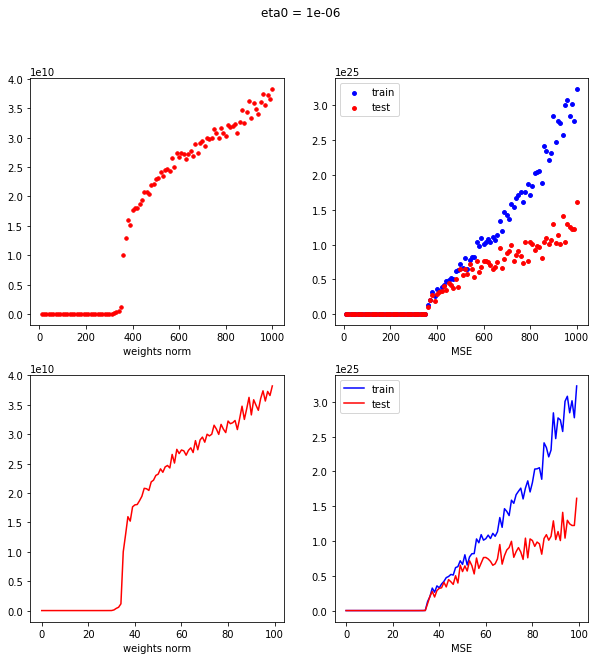

  0%|          | 0/100 [00:00<?, ?it/s]

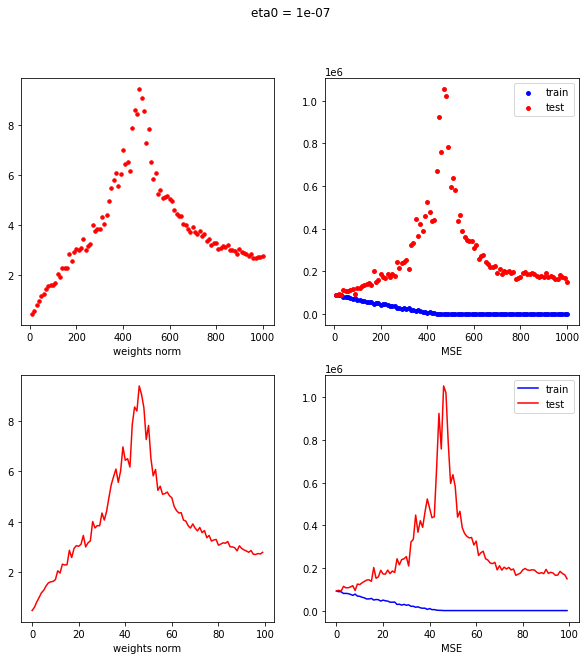

  0%|          | 0/100 [00:00<?, ?it/s]

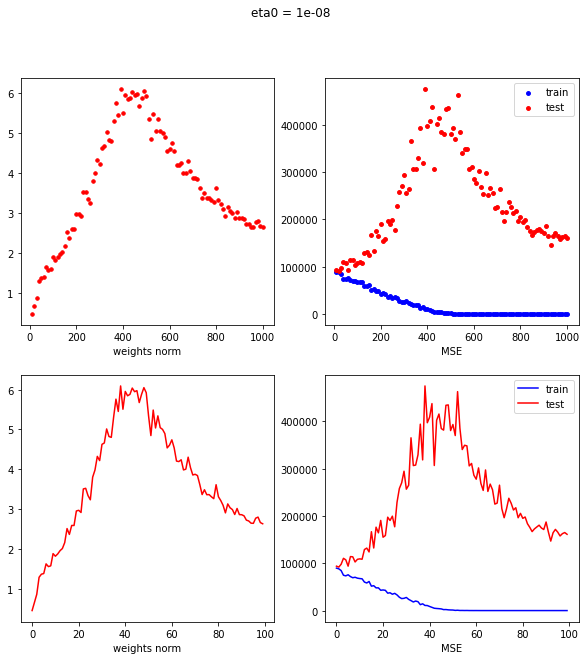

  0%|          | 0/100 [00:00<?, ?it/s]

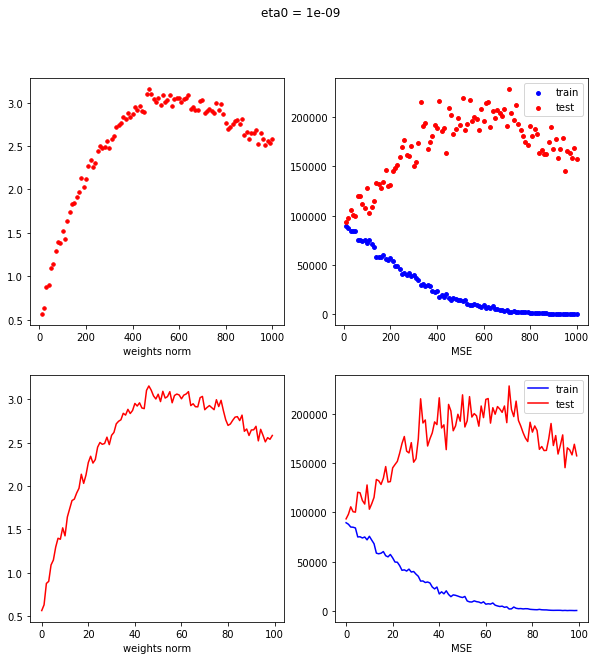

  0%|          | 0/100 [00:00<?, ?it/s]

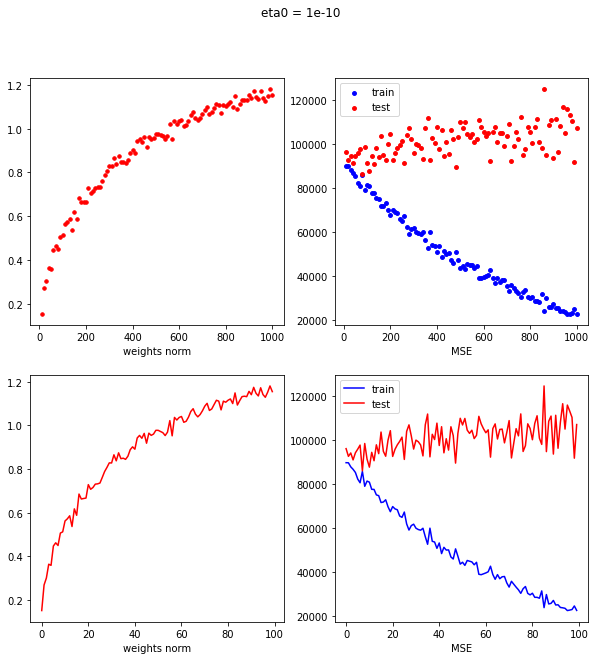

  0%|          | 0/100 [00:00<?, ?it/s]

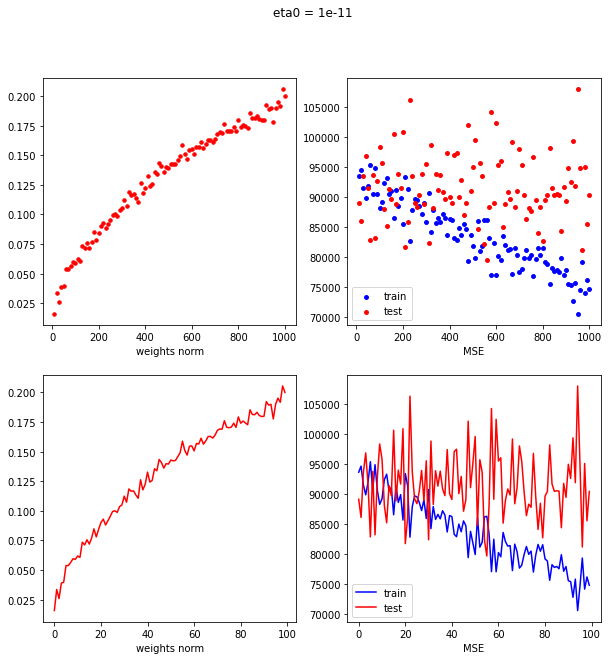

  0%|          | 0/100 [00:00<?, ?it/s]

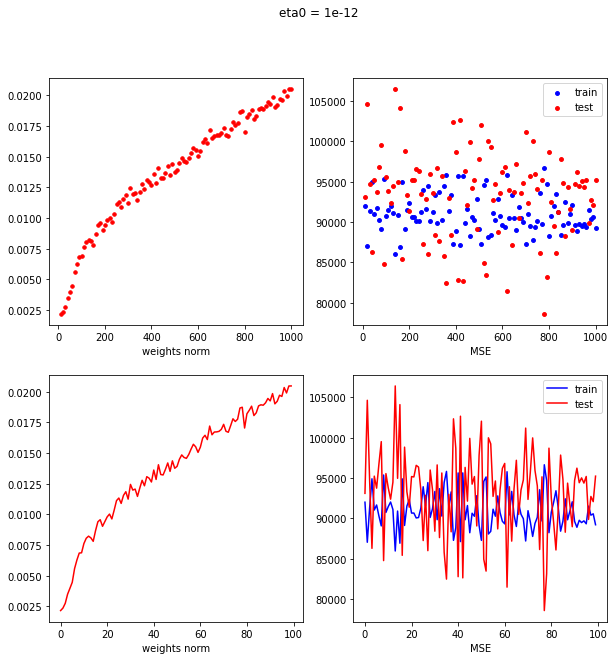

In [4]:
answers = []
for eta0 in tqdm(eta):
    MSE_train, MSE_test, weights, inter, num_iter = skSGD_MSE_and_weights(Fich, target, right_border = 1000, step = 10, rand_size = rand_size, lr = 'adaptive', eta0 = eta0)

    answers.append([MSE_train, MSE_test, weights, inter, num_iter])
    norm = []
    for w in weights:
      norm.append(np.linalg.norm(w))
    #Нарисуем график
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle(f'eta0 = {eta0}')
    ax[0][0].scatter(num_iter, norm, color='red', s = 12)
    ax[0][0].set(xlabel = 'weights norm')

    ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
    ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
    ax[0][1].set(xlabel = 'MSE')
    ax[0][1].legend()

    ax[1][0].plot(norm, color='red')
    ax[1][0].set(xlabel = 'weights norm')

    ax[1][1].plot(MSE_train, color='blue', label='train')
    ax[1][1].plot(MSE_test, color = 'red', label='test')
    ax[1][1].set(xlabel = 'MSE')
    ax[1][1].legend()
    plt.show()

Видим все то же самое, что и при аналитическом способе решения. Норма весов полностью повторяет поведение ошибки на тесте в большинстве случаев. Однако при очень маленьком значении гиперпараметра начинаем наблюдать расхождение. Так происходит скорее всего из-за того, что количество параметров увеличивается, а метод находит все новые и новые локальные минимумы, но не глобальный минимум. Мы видим, как это проявляется - MSE начинает "болтать" вверх и вниз в одном и том же коридоре (например при eta0 = 1e-12). Веса примерно одни и те же (довольно маленькие), но их количество увеличивается, а следовательно и норма весов растет.

###Constant learning rate

Теперь попробуем сделать то же самое без адаптивной модернизации

In [5]:
import warnings
warnings.filterwarnings("ignore")

Fich, target, left_border_plane, right_border_plane = make_dataset(25)

#Объявим нужные переменные
rand_size = (right_border_plane - left_border_plane) // 2
eta = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

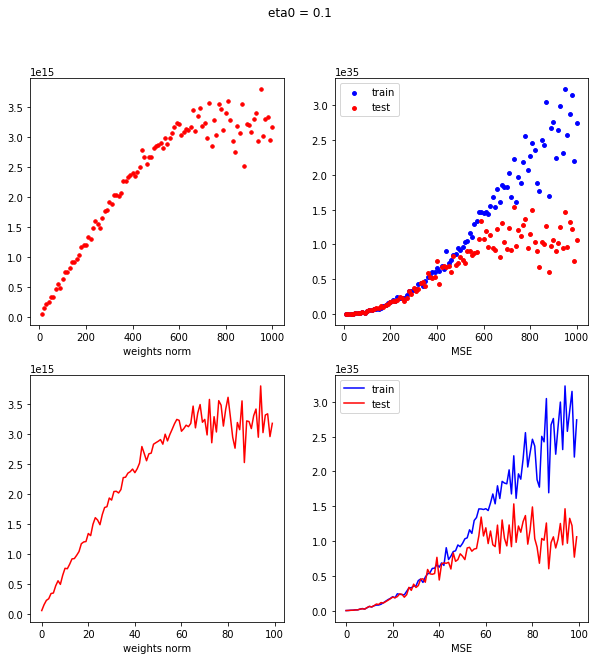

  0%|          | 0/100 [00:00<?, ?it/s]

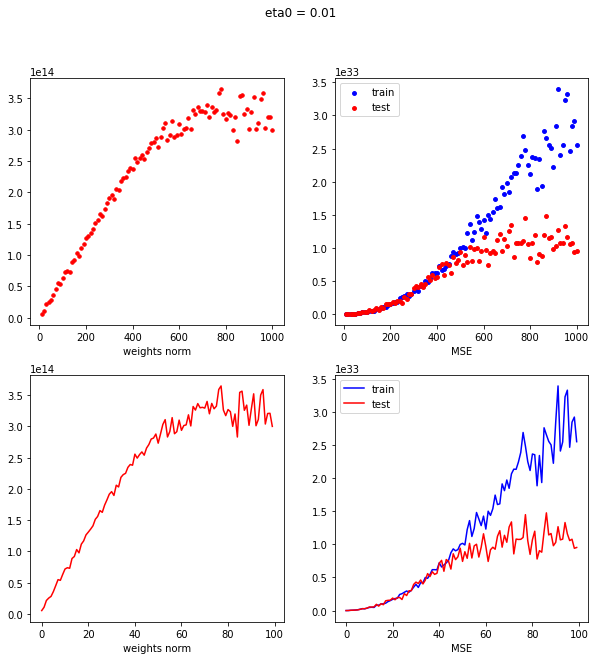

  0%|          | 0/100 [00:00<?, ?it/s]

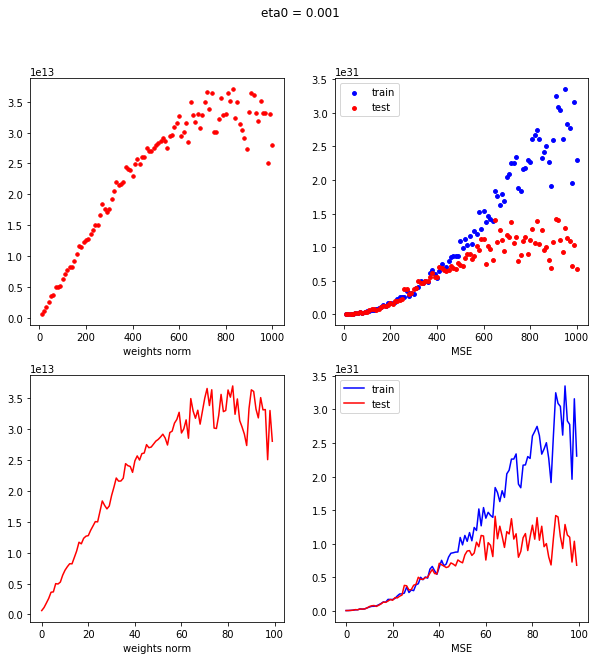

  0%|          | 0/100 [00:00<?, ?it/s]

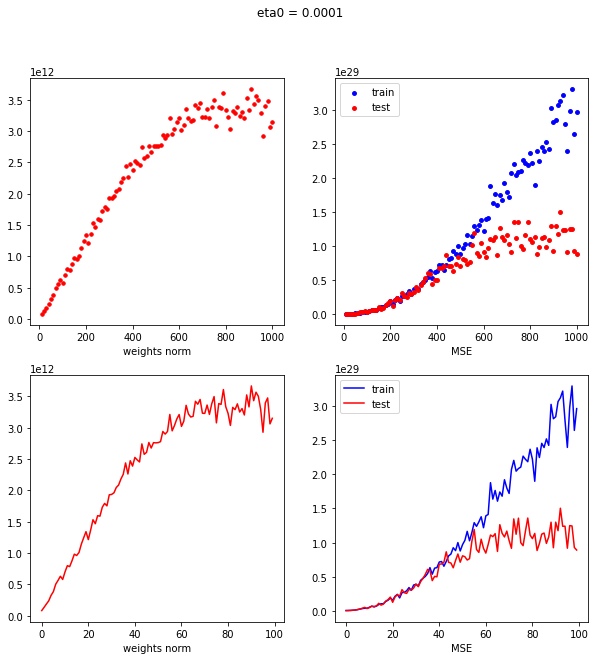

  0%|          | 0/100 [00:00<?, ?it/s]

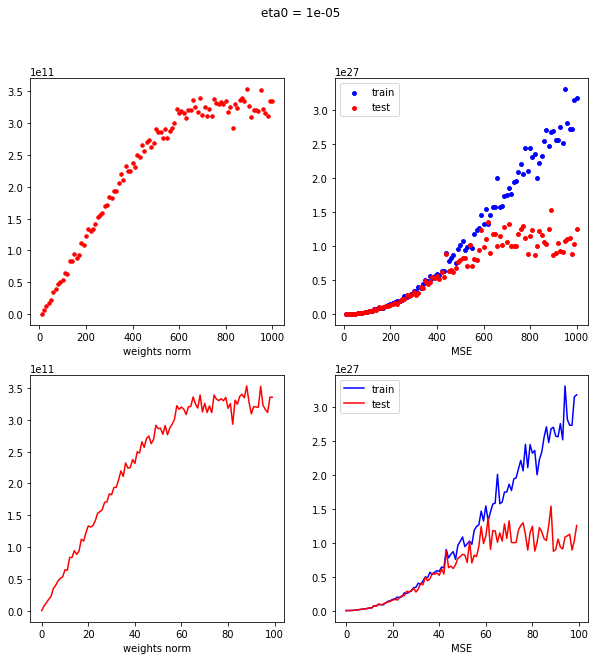

  0%|          | 0/100 [00:00<?, ?it/s]

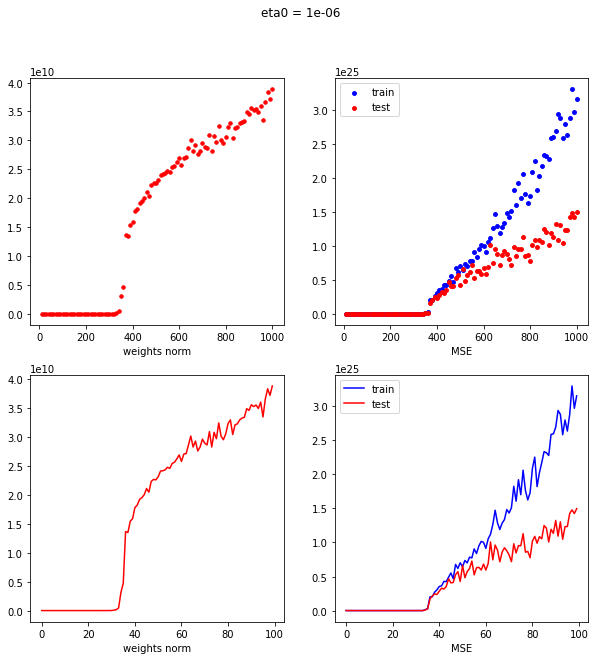

  0%|          | 0/100 [00:00<?, ?it/s]

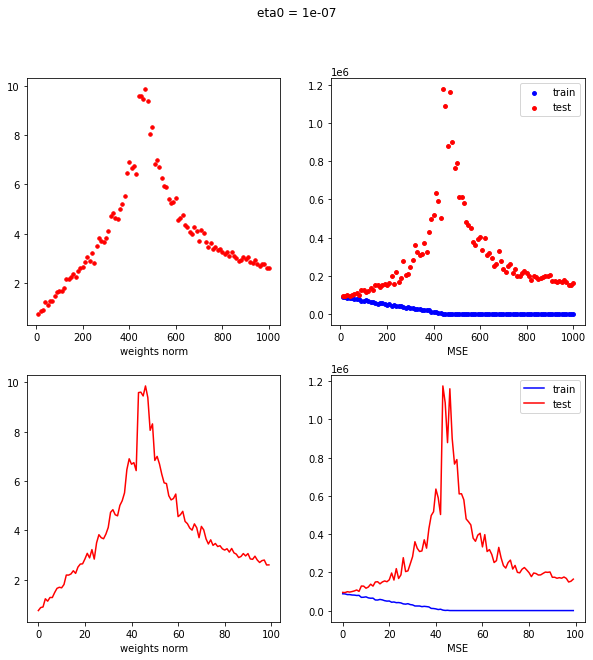

  0%|          | 0/100 [00:00<?, ?it/s]

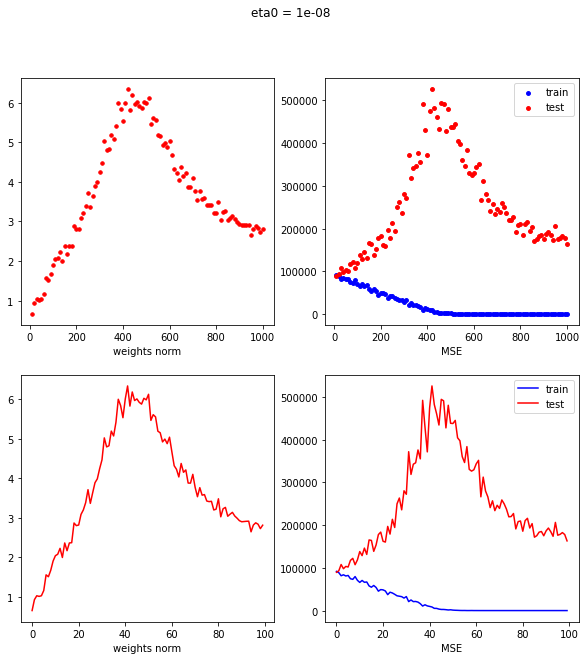

  0%|          | 0/100 [00:00<?, ?it/s]

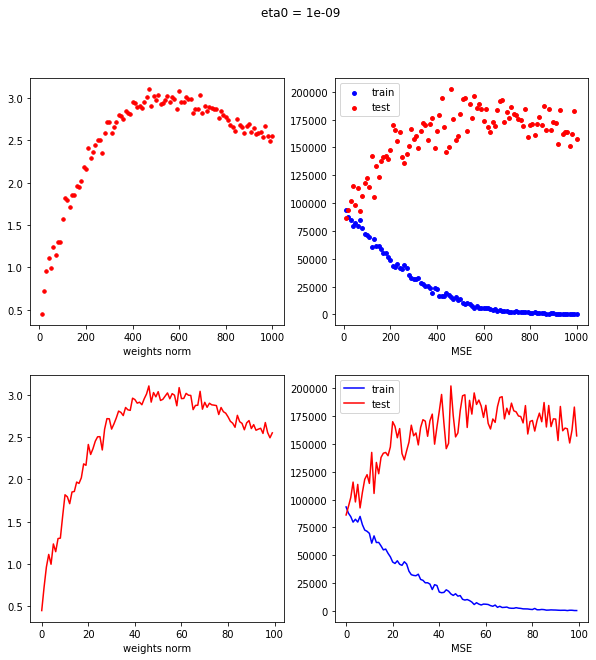

  0%|          | 0/100 [00:00<?, ?it/s]

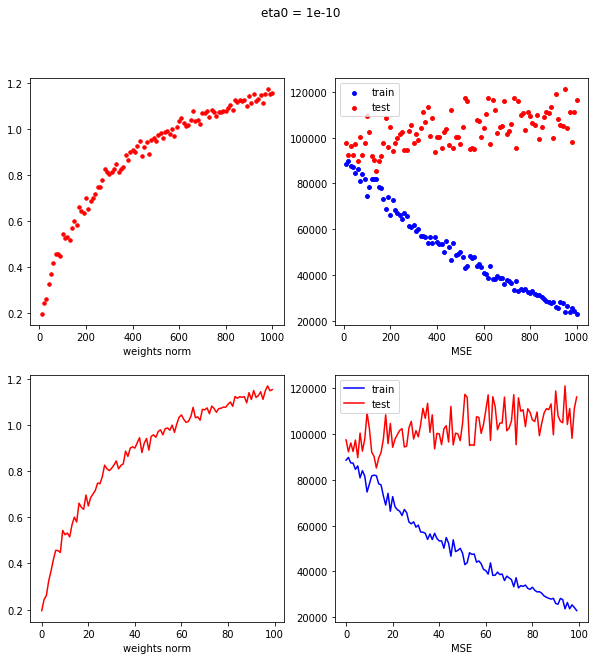

  0%|          | 0/100 [00:00<?, ?it/s]

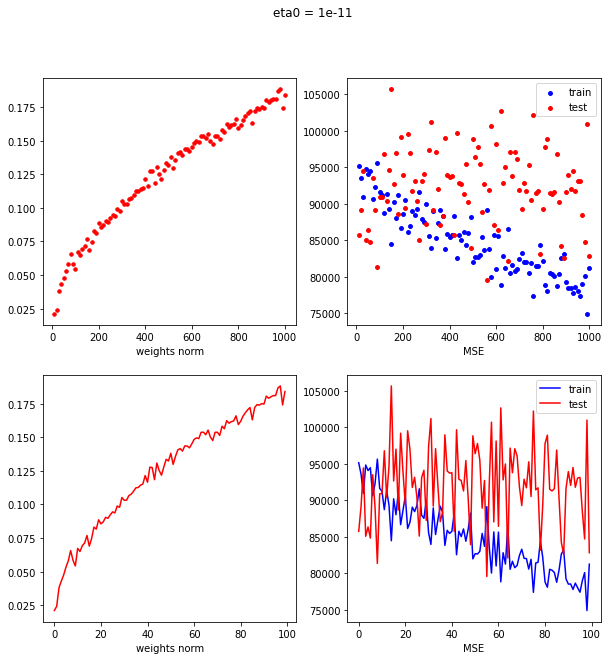

  0%|          | 0/100 [00:00<?, ?it/s]

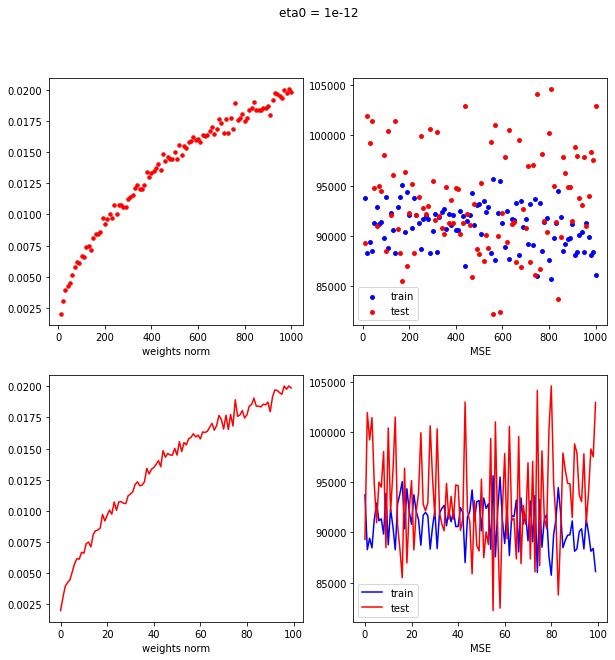

In [6]:
answers = []
for eta0 in tqdm(eta):
    MSE_train, MSE_test, weights, inter, num_iter = skSGD_MSE_and_weights(Fich, target, right_border = 1000, step = 10, rand_size = rand_size, lr = 'constant', eta0 = eta0)

    answers.append([MSE_train, MSE_test, weights, inter, num_iter])
    norm = []
    for w in weights:
      norm.append(np.linalg.norm(w))
    #Нарисуем график
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle(f'eta0 = {eta0}')
    ax[0][0].scatter(num_iter, norm, color='red', s = 12)
    ax[0][0].set(xlabel = 'weights norm')

    ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
    ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
    ax[0][1].set(xlabel = 'MSE')
    ax[0][1].legend()

    ax[1][0].plot(norm, color='red')
    ax[1][0].set(xlabel = 'weights norm')

    ax[1][1].plot(MSE_train, color='blue', label='train')
    ax[1][1].plot(MSE_test, color = 'red', label='test')
    ax[1][1].set(xlabel = 'MSE')
    ax[1][1].legend()
    plt.show()

Как ни странно, видим такую же картину, что и при адаптивном методе.

###Вывод

Норма весов повторяет поведение ошибки на тесте.

##Вывод
При применении SGD все эффекты сохраняются. Более того, если использовать адаптивный метод, то мы можем наблюдать еще один пик на малых значениях гиперпараметра величины шага. 

#Регуляризация

Давайте теперь добавим L2 регуляризацию. Такой вид регрессии также называют Ridge регрессией. Теперь мы будем минимизировать функцию потерь, которая выглядит так:
$$ L(w) = ||Xw - Y||^2_2 + \lambda||w||^2_2 $$
Что происходит? Теперь мы будем "штрафовать" нашу модель за сложность. То есть минимизировать еще и веса модели. Аналитическое  решение будет таким:
$$ w = (X^TX + \lambda I)^{-1}X^TY $$
В случае, если мы добавляем свободный член $ \lambda I $ преобразуется в матрицу $\left(\begin{matrix}
\lambda I & 0 \\
0 & 0
\end{matrix}\right)$



Сразу выскажу гипотезу, что коэффициент регуляризации $\lambda$ будет влиять на эффект двойного спуска таким образом: увеличение $\lambda$ будет уменьшать пик тестовой ошибки, а уменьшение будет приводить к эффектам, которые мы наблюдали при обычной линейной регрессии. Проверим это.
Давайте во время эксперимента также сразу смотреть на норму весов.

## Создание датасета
В процессе исследования мы будем менять количество в выборке. Поэтому сделаем функцию для удобства.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def make_dataset(num_elements = 50):
    #Пока не будем менять константы, если будет нужно, модернизируем функцию
    a = 20
    b = 3 
    c = 4

    x0 = 1
    y0 = 2
    z0 = 3

    norm = np.array([a, b, c])
    point = np.array([x0, y0, z0])
    #Получим d
    d = -point.dot(norm)
    #Построим точки для плоскости

    left_border_plane = -100
    right_border_plane = 100

    x = np.linspace(left_border_plane, right_border_plane, num_elements)
    y = np.linspace(left_border_plane, right_border_plane, num_elements)

    X, Y = np.meshgrid(x, y)

    Z = (-a * X - b * Y - d) * 1. / c

    #Растянем наши матрицы в одномерный массив
    x_data = X.ravel()
    y_data = Y.ravel()
    z_data = Z.ravel()

    n = num_elements * num_elements
    #Добавим шума
    x_data = x_data + 5 * np.random.randn(n)
    y_data = y_data + 5 * np.random.randn(n)
    z_data = z_data + np.random.randn(n)

    #Составим матрицу признаков
    data = pd.DataFrame({'x' : x_data, 'y' : y_data, 'z' : z_data})
    #Перемешаем данные (можно этого и не делать, потому что далее train_test_split все перемешает, но на всякий случаем сделаем)
    data = data.sample(frac = 1)
    #Разделим выборку на признаки и таргет
    Fich = data.iloc[ : , : -1]
    target = data['z']
    return Fich, target, left_border_plane, right_border_plane

##Класс Ridge регрессии

In [8]:
#Составим собственный класс для решения поставленной задачи

import numpy as np

class MyRidgeRegression:
    def __init__(self, alpha = 1.0, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.alpha = alpha
    
    def fit(self, X, y):
        n, m = X.shape
        X_train = X

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
        
        lambdaI = self.alpha * np.eye(X_train.shape[1])
        if self.fit_intercept:
            lambdaI[-1, -1] = 0

        self.w = np.linalg.inv(X_train.T @ X_train + lambdaI) @ X_train.T @ y

        return self
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        # Не забудьте про фиктивный признак равный 1
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

##Вспомогательная функция

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def MYRidge_MSE_and_weights(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 1, alpha=1, mode = 0):  
  '''mode:
  (0) MSE and weights returned
  (1) only MSE returned
  (2) only weights returned
  '''
  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  weights = []
  inter = []
  MSE_train = []
  MSE_test = []
  num_iter = []
  
  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(k) for k in range(i, i + step)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
    regressor = MyRidgeRegression(alpha = alpha)
    regressor.fit(X_train, target_train)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    tmp = regressor.get_weights()
    weights.append(tmp[:-1])
    inter.append(tmp[-1])
    num_iter.append(i + step)
  
  if mode == 0:
    return MSE_train, MSE_test, weights, inter, num_iter
  elif mode == 1:
    return MSE_train, MSE_test, num_iter
  else:
    return weights, inter, num_iter

##Исследование

In [13]:
Fich, target, left_border_plane, right_border_plane = make_dataset(25)

rand_size = (right_border_plane - left_border_plane) // 2
alpha = [3, 2, 1, 0.1, 0.001, 0.0001, 0.00001, 0.000001]
alpha = [1, 10, 100, 1000, 10000, 100000, 1e6, 1e7, 1e8, 1e9]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

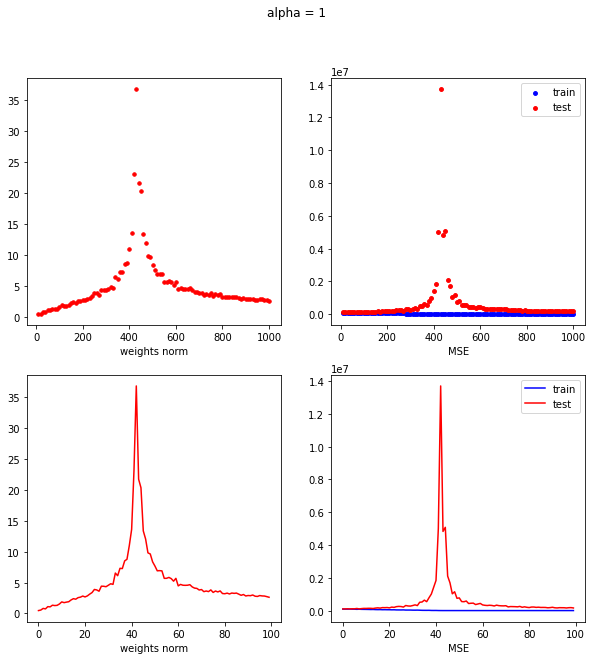

  0%|          | 0/100 [00:00<?, ?it/s]

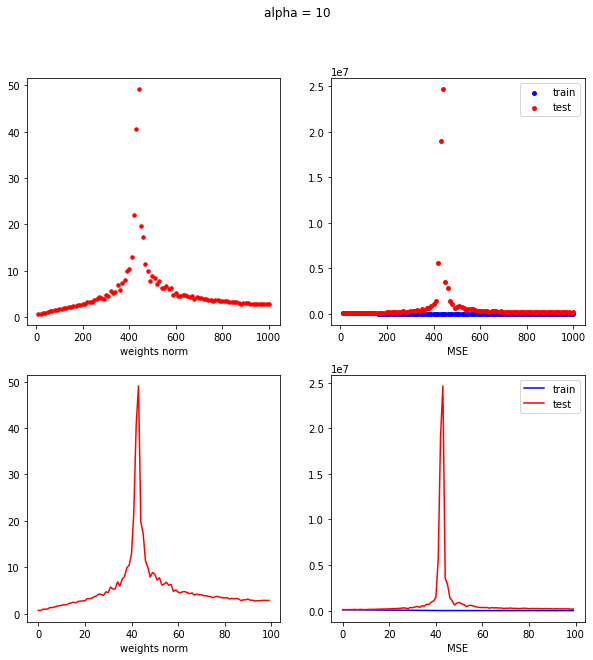

  0%|          | 0/100 [00:00<?, ?it/s]

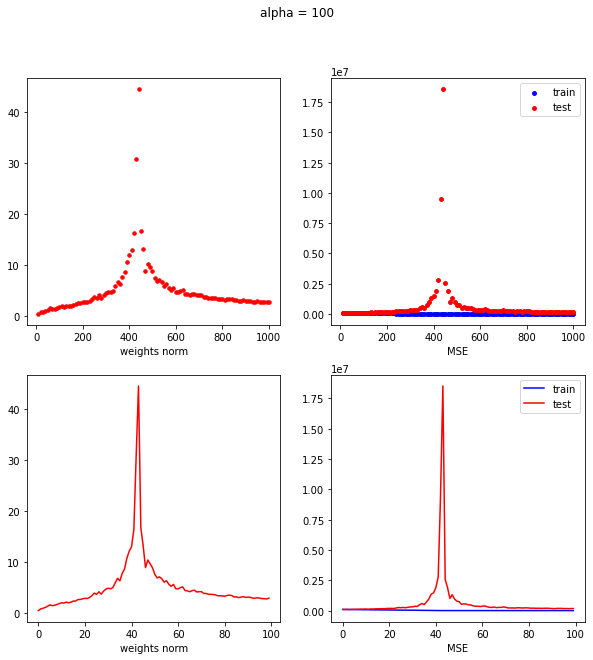

  0%|          | 0/100 [00:00<?, ?it/s]

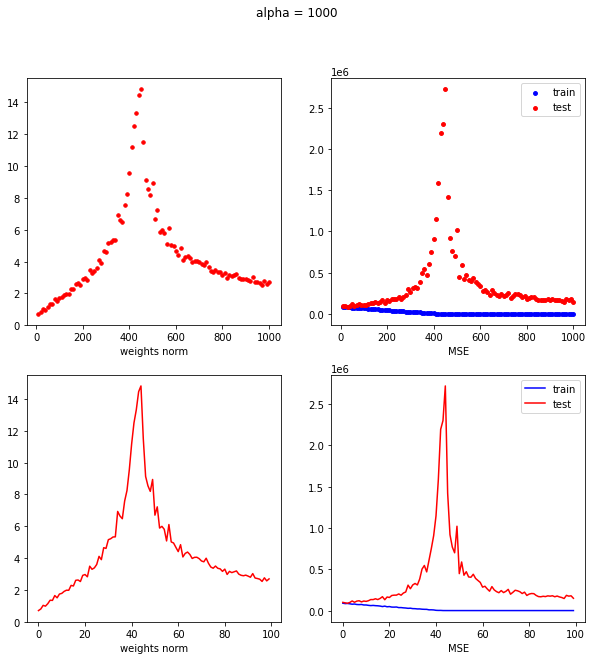

  0%|          | 0/100 [00:00<?, ?it/s]

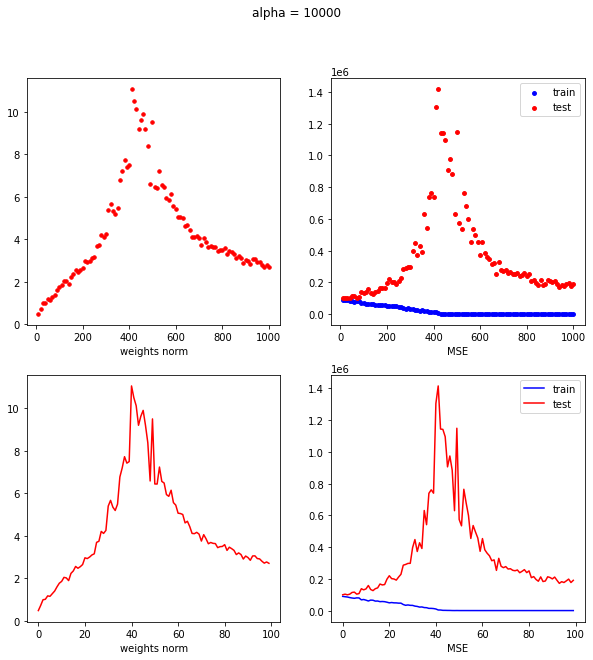

  0%|          | 0/100 [00:00<?, ?it/s]

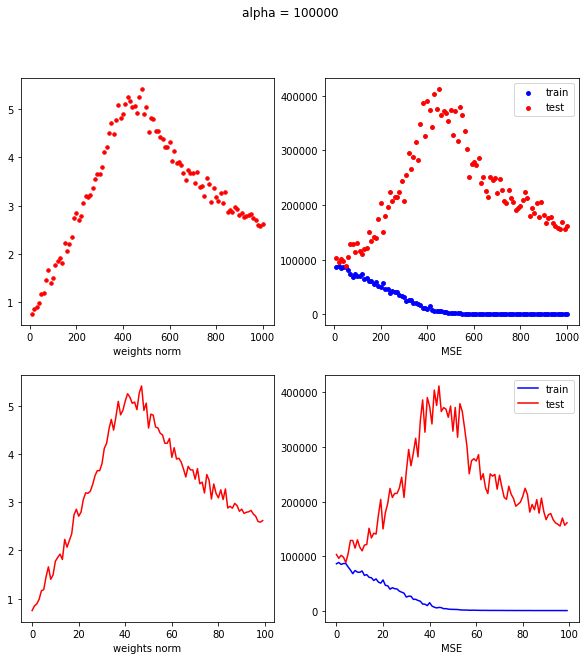

  0%|          | 0/100 [00:00<?, ?it/s]

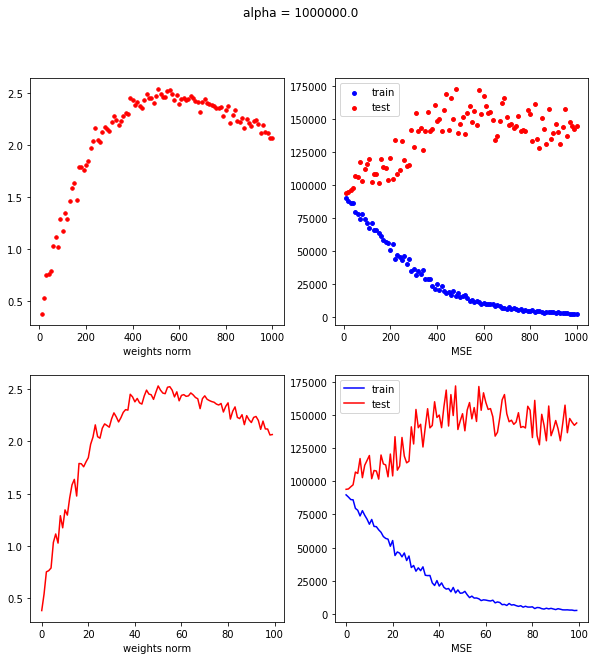

  0%|          | 0/100 [00:00<?, ?it/s]

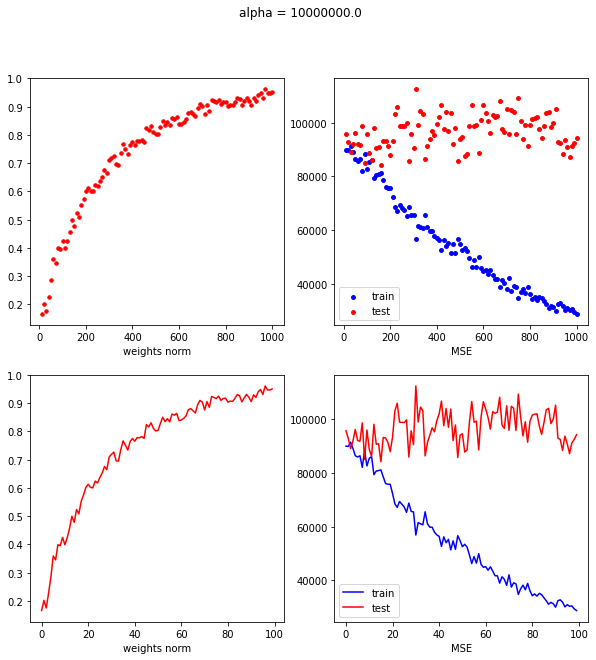

  0%|          | 0/100 [00:00<?, ?it/s]

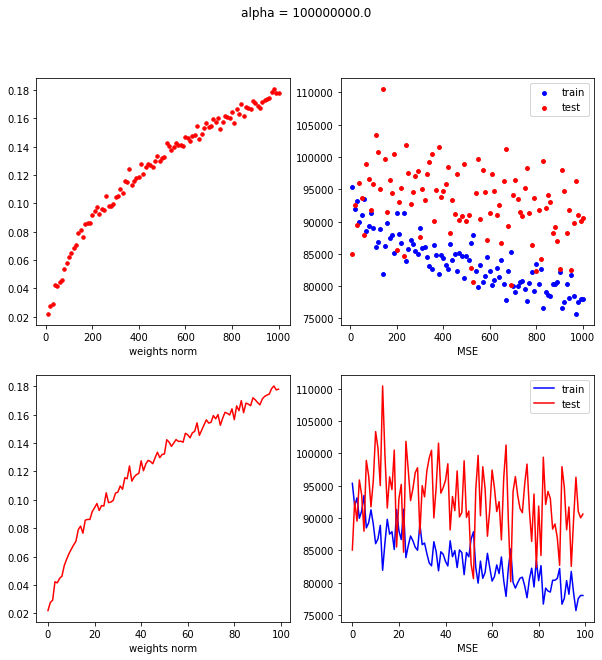

  0%|          | 0/100 [00:00<?, ?it/s]

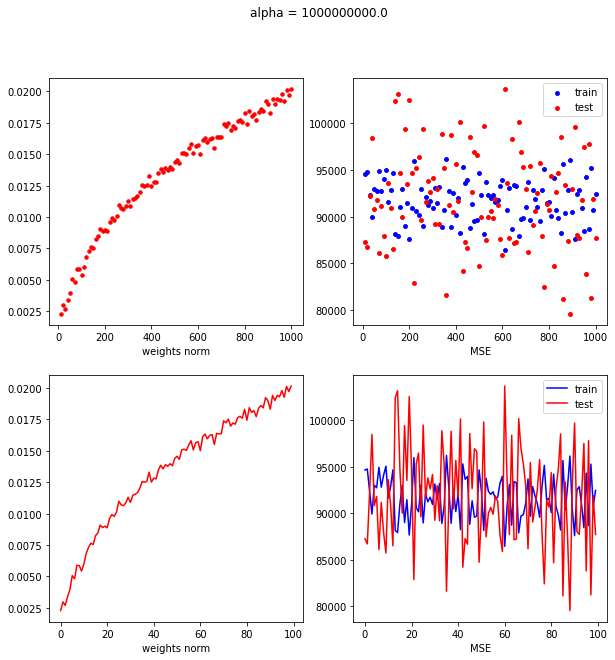

In [14]:
answers = []
for al in tqdm(alpha):
    MSE_train, MSE_test, weights, inter, num_iter = MYRidge_MSE_and_weights(Fich, target, right_border = 1000, step = 10, rand_size = rand_size, alpha = al)

    answers.append([MSE_train, MSE_test, weights, inter, num_iter])
    norm = []
    for w in weights:
      norm.append(np.linalg.norm(w))
    #Нарисуем график
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle(f'alpha = {al}')
    ax[0][0].scatter(num_iter, norm, color='red', s = 12)
    ax[0][0].set(xlabel = 'weights norm')

    ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
    ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
    ax[0][1].set(xlabel = 'MSE')
    ax[0][1].legend()

    ax[1][0].plot(norm, color='red')
    ax[1][0].set(xlabel = 'weights norm')

    ax[1][1].plot(MSE_train, color='blue', label='train')
    ax[1][1].plot(MSE_test, color = 'red', label='test')
    ax[1][1].set(xlabel = 'MSE')
    ax[1][1].legend()
    plt.show()

Гипотеза подтверждается тестами - пик тестовой ошибки уменьшается вместе с пиком нормы весов. При малых значениях $\lambda$ мы видим эффекты как при обычной линейной регрессии. Также интересно поведение нормы весов при аномально больших значениях $\lambda$ (alpha). Норма весов потихоньку растет, хотя MSE "болтает" вокруг одних и тех же значений. Поведение похожее на поведение при очень маленьких значениях learning rate в SGD. Однако здесь причина в другом. Мы взяли очень большое значение $\lambda$ и теперь модель учится больше как уменьшить норму весов, чем минимизировать MSE. А причина роста нормы весов с увеличением признаков скорее всего такая же как и у SGD: несмотря на то, что веса уже очень малы, количество признаков (а следовательно количество весов) увеличивается и функция растет на этом эффекте.

Давайте теперь посмотрим, что будет происходить при большем количестве признаков. Для ускорения процесса обучения, будем использовать библиотечную реализацию Ridge, так как иначе на одну итерацию у нас будет уходить по 40 минут. "Под капотом" у нее много методов решения, которые автоматически выбираются исходя из типа матрицы (сингулярные, разреженные), есть также итеративные подходы, но, изучив исходный код, можно понять, что они не применяются при автоматическом выборе (только если мы сами передадим этот параметр или если мы имеем дело с разреженными матрицами, а это не наш случай). Скорее всего библиотека будет использовать метод, использующий разложение Холецкого ('cholesky'), но если он будет неприменим, заменит на SVD (Singular Value Decomposition). Мы выберем автоматический способ, так как он сам подберет лучший метод и обучение будет происходить быстрее.

In [4]:
#Немного изменим нашу вспомогательную функцию
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def Ridge_MSE_and_weights(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 1, alpha=1, mode = 0):  
  '''mode:
  (0) MSE and weights returned
  (1) only MSE returned
  (2) only weights returned
  '''
  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  weights = []
  inter = []
  MSE_train = []
  MSE_test = []
  num_iter = []
  
  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(k) for k in range(i, i + step)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
    
    #Не забудем выключить регуляризацию
    regressor = Ridge(alpha = alpha)
    regressor.fit(X_train, target_train)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    weights.append(regressor.coef_)
    inter.append(regressor.intercept_)
    num_iter.append(i + step)
  
  if mode == 0:
    return MSE_train, MSE_test, weights, inter, num_iter
  elif mode == 1:
    return MSE_train, MSE_test, num_iter
  else:
    return weights, inter, num_iter

In [8]:
#Включим предупреждения, чтобы они оповещали нас о различных переключениях между методами
import warnings
warnings.filterwarnings("default")

Fich, target, left_border_plane, right_border_plane = make_dataset(50)

rand_size = (right_border_plane - left_border_plane) // 2
alpha = [1, 10, 100, 1000, 10000, 100000, 1e6, 1e7, 1e8, 1e9]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

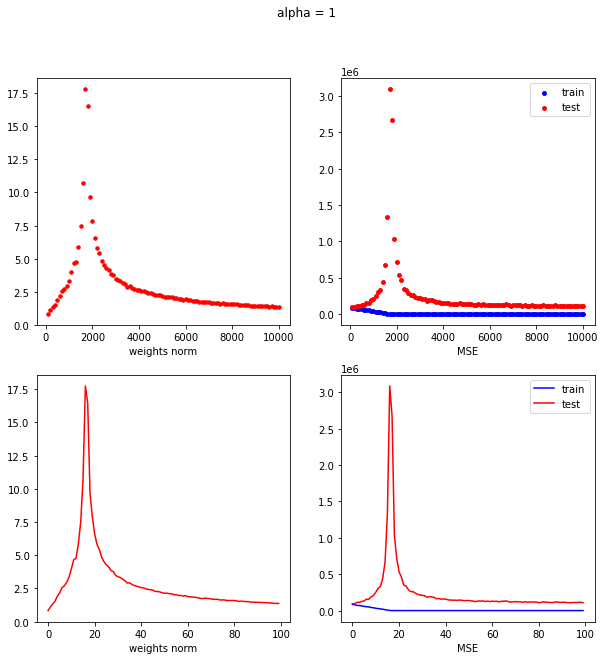

  0%|          | 0/100 [00:00<?, ?it/s]

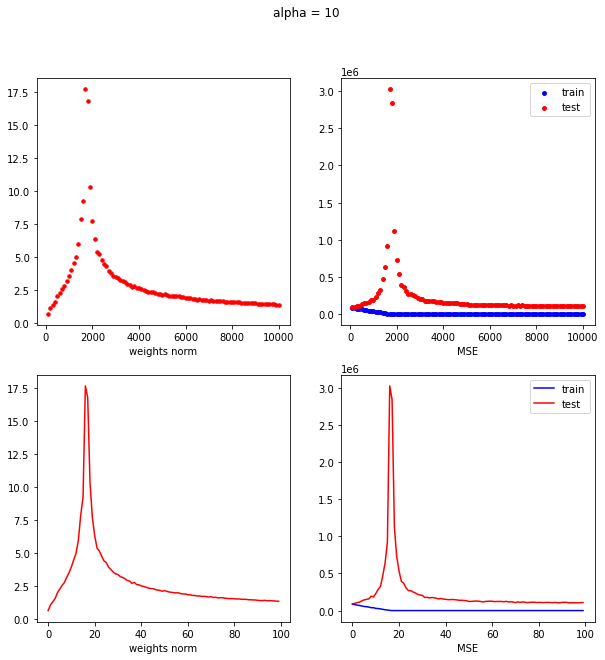

  0%|          | 0/100 [00:00<?, ?it/s]

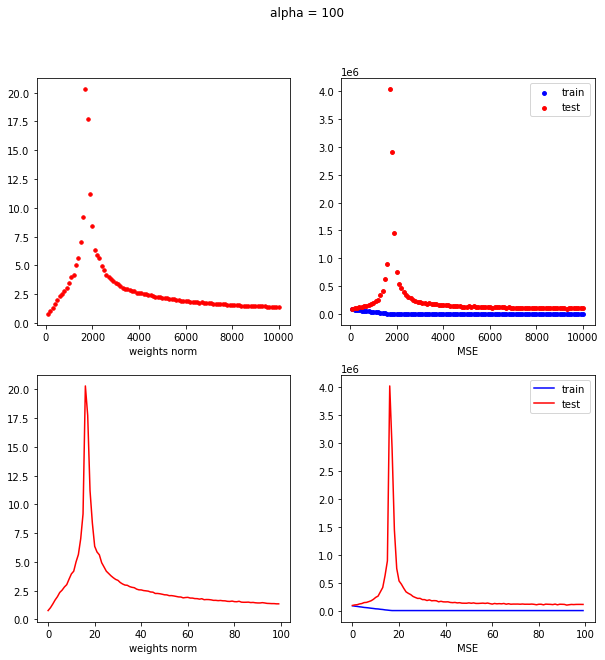

  0%|          | 0/100 [00:00<?, ?it/s]

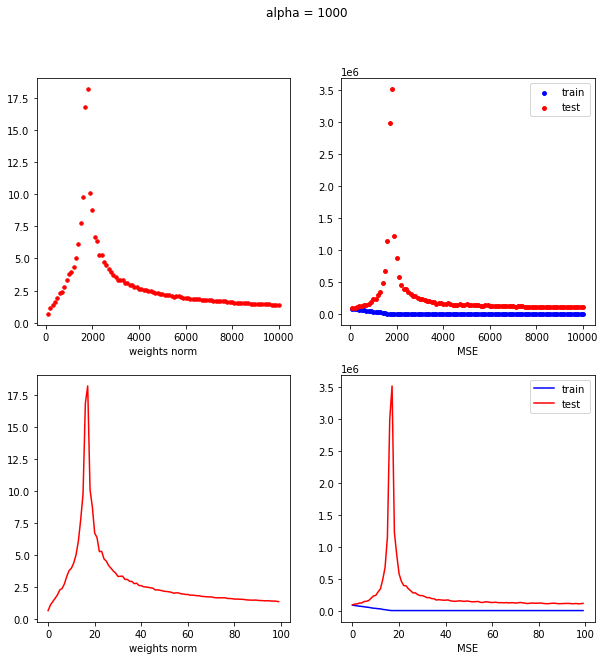

  0%|          | 0/100 [00:00<?, ?it/s]

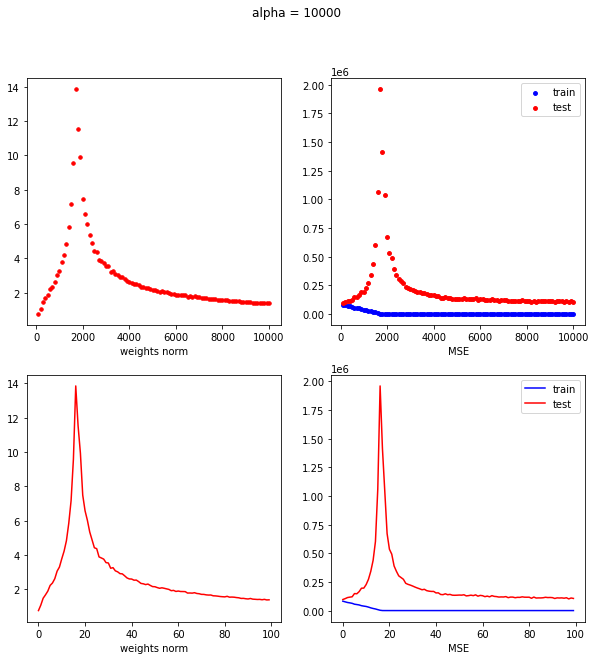

  0%|          | 0/100 [00:00<?, ?it/s]

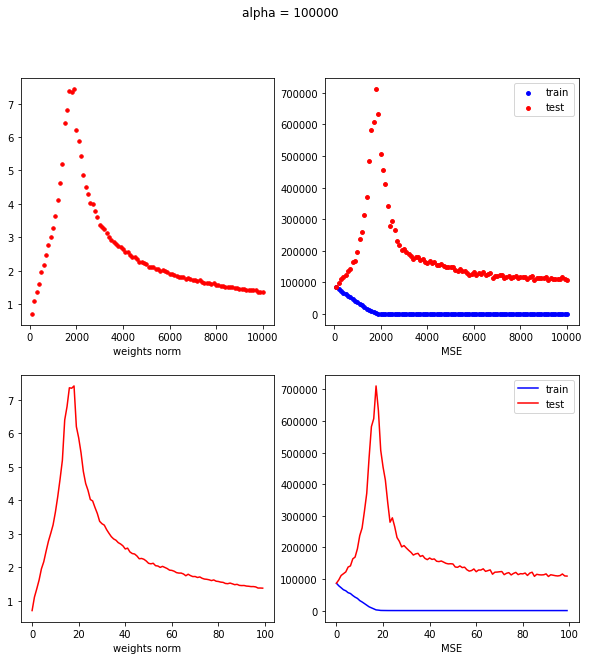

  0%|          | 0/100 [00:00<?, ?it/s]

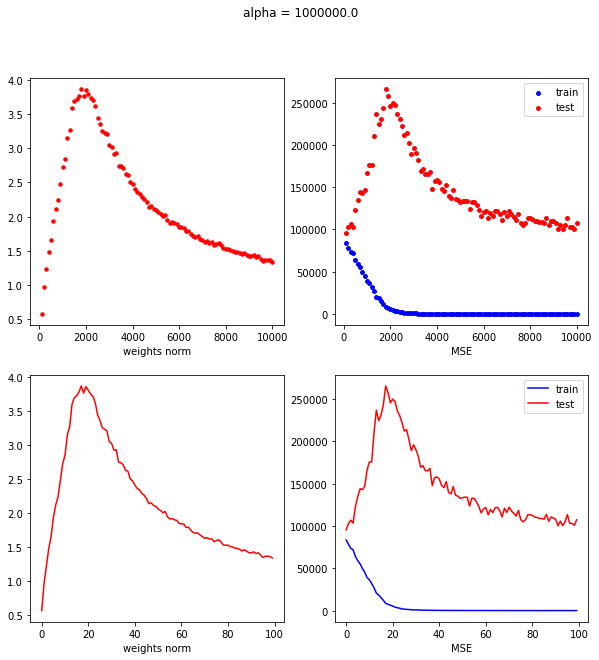

  0%|          | 0/100 [00:00<?, ?it/s]

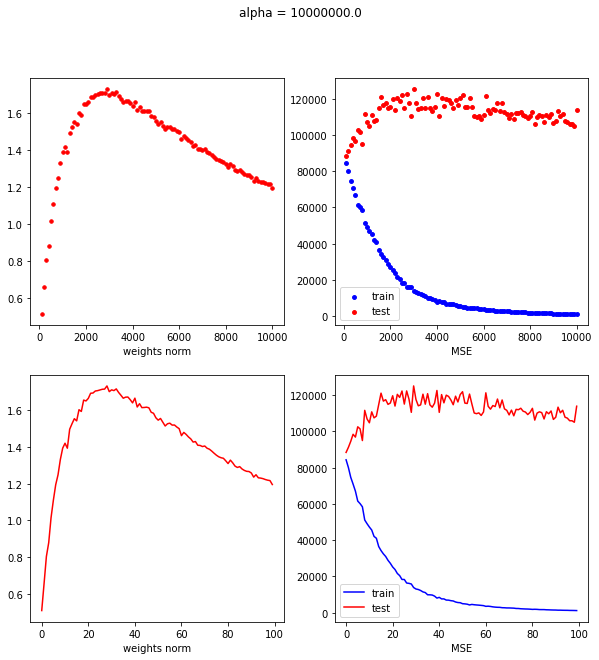

  0%|          | 0/100 [00:00<?, ?it/s]

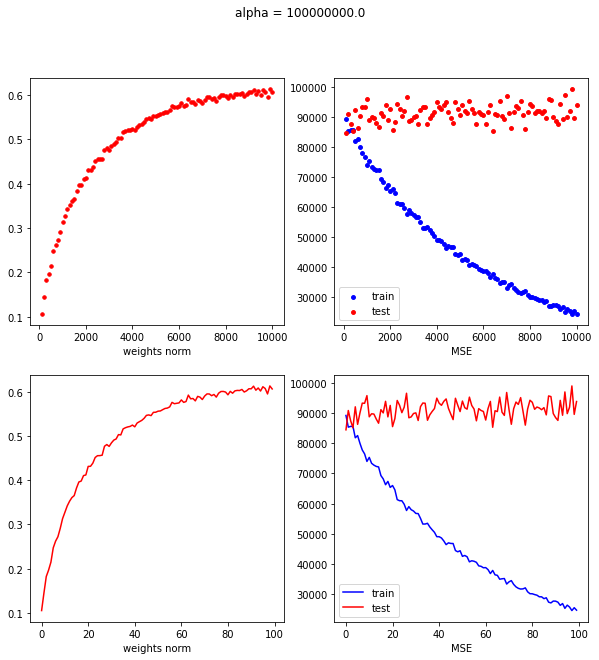

  0%|          | 0/100 [00:00<?, ?it/s]

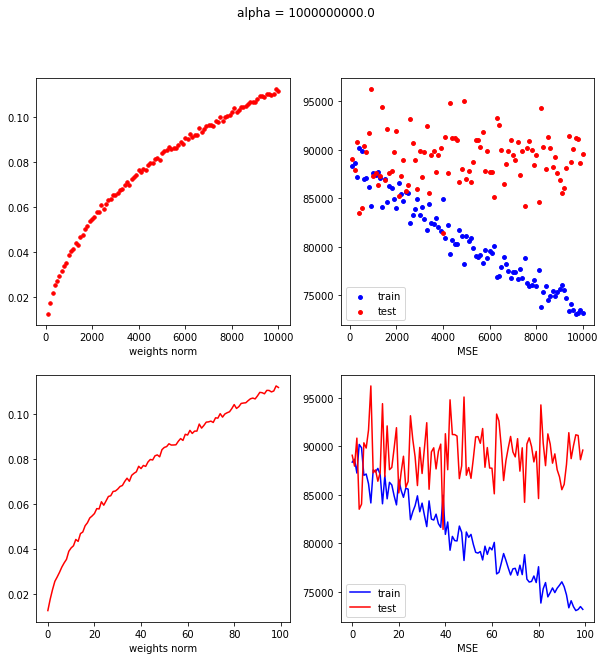

In [9]:
answers = []
for al in tqdm(alpha):
    MSE_train, MSE_test, weights, inter, num_iter = Ridge_MSE_and_weights(Fich, target, right_border = 10000, step = 100, rand_size = rand_size, alpha = al)

    answers.append([MSE_train, MSE_test, weights, inter, num_iter])
    norm = []
    for w in weights:
      norm.append(np.linalg.norm(w))
    #Нарисуем график
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle(f'alpha = {al}')
    ax[0][0].scatter(num_iter, norm, color='red', s = 12)
    ax[0][0].set(xlabel = 'weights norm')

    ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
    ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
    ax[0][1].set(xlabel = 'MSE')
    ax[0][1].legend()

    ax[1][0].plot(norm, color='red')
    ax[1][0].set(xlabel = 'weights norm')

    ax[1][1].plot(MSE_train, color='blue', label='train')
    ax[1][1].plot(MSE_test, color = 'red', label='test')
    ax[1][1].set(xlabel = 'MSE')
    ax[1][1].legend()
    plt.show()

Получили такие же результаты.

##Выводы
При увеличении коэффициента регуляризации $\lambda$ уменьшается пик тестовой ошибки и норма весов, а при уменьшении будет происходит обратное, пока в конечном итоге мы не придем к линейной регрессии.

#Общие выводы

Итак, мы выяснили:

*   Пик тестовой ошибки наблюдается при количестве параметров равному количеству обучающей выборки.
*   Норма весов повторяет поведение ошибки на тесте.
*   При применении стохастического градиентного спуска результаты не меняются, хотя их становится сложнее получить.
*   При добавлении L2 регуляризации и увеличении коэффициента регуляризации пик ошибки уменьшается, пока совсем не пропадет



#Собственные классы GD и SGD

Здесь представлены мои классы для реализации градиентного спуска и стохастического градиентного спуска.

##Классы

In [2]:
class MyGradientLinearRegression:
    def __init__(self, fit_intercept = True):
        self.w = None
        self.fit_intercept = fit_intercept

    def fit(self, X, y, lr=0.01, max_iter=1000, tol=1e-3, n_iter_no_change = 35):
      n_samples, k = X.shape
      MAX_DLOSS = 1e20
      best_loss = np.inf
      no_improvement_count = 0


      if self.w is None:
        self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
      X_ = np.hstack((X, np.ones((n_samples, 1)))) if self.fit_intercept else X

      for epoch in range(max_iter):
        y_pred = self.predict(X)
        dloss = (2.0 / n_samples) * (y_pred - y)

        
        dloss[dloss < -MAX_DLOSS] = -MAX_DLOSS
        dloss[dloss > MAX_DLOSS] = MAX_DLOSS
        
        grad = X_.T.dot(dloss)
        self.w -= lr * grad

        loss = (1.0 / n_samples) * (y_pred - y) * (y_pred - y)

        sum_loss = sum(loss)

        if sum_loss > best_loss - tol:
            no_improvement_count += 1
        else:
            no_improvement_count = 0
        if sum_loss < best_loss:
            best_loss = sum_loss
        
        if no_improvement_count >= n_iter_no_change:
            if lr > 1e-6:
              lr = lr / 5
              no_improvement_count = 0
            else:
              break

      return self
        
    def predict(self, X):
          # Принимает на вход X и возвращает ответы модели
          # Не забудем про фиктивный признак равный 1
          n, k = X.shape
          X_ = X
          if self.fit_intercept:
              X_ = np.hstack((X, np.ones((n, 1))))

          y_pred = X_ @ self.w
          return y_pred
      
    def get_weights(self):
        return self.w

Здесь, помимо обычного градиентного спуска присутствует несколько эвристик, например, ограничение производной функции потерь. 


Теперь SGD. Батч будет состоять из одной выборки.

In [3]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None

    def fit(self, X, y, lr=0.01, max_iter=5000, tol=1e-3, n_iter_no_change = 5):
        n_samples, k = X.shape

        MAX_DLOSS = 1e12
        best_loss = 1e300
        no_improvement_count = 0

        # случайно инициализируем веса
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        #добавим столбец из единиц для смещения
        X_ = np.hstack((X, np.ones((n_samples, 1)))) if self.fit_intercept else X
        
        for epoch in range(max_iter):
            sumloss = 0
            for i in range(n_samples):
                p = X_[i] @ self.w
                sumloss += 0.5 * (p - y[i]) * (p - y[i])
                dloss = p - y[i]

                if dloss < -MAX_DLOSS:
                    dloss = -MAX_DLOSS
                elif dloss > MAX_DLOSS:
                    dloss = MAX_DLOSS
                update = -lr * dloss

                if update != 0.0:
                    self.w += update * X_[i]

            if sumloss > best_loss - tol * n_samples:
                no_improvement_count += 1
            else:
                no_improvement_count = 0
            if sumloss < best_loss:
                best_loss = sumloss

            if no_improvement_count >= n_iter_no_change:
                if lr > 1e-6:
                  lr = lr / 5
                  no_improvement_count = 0
                else:
                  break

        return self

Теперь начнем собственно обучение. Введем вспомогательные функции

##Вспомогательные функции

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def MYGD_MSE_and_weights(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 1, lr = 0.01, mode = 0):  
  '''mode:
  (0) MSE and weights returned
  (1) only MSE returned
  (2) only weights returned
  '''
  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  weights = []
  inter = []
  MSE_train = []
  MSE_test = []
  num_iter = []
  
  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(k) for k in range(i, i + step)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
    
    regressor = MyGradientLinearRegression()
    regressor.fit(X_train, target_train, lr = lr)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    tmp = regressor.get_weights()
    weights.append(tmp[:-1])
    inter.append(tmp[-1])
    num_iter.append(i + step)
  
  if mode == 0:
    return MSE_train, MSE_test, weights, inter, num_iter
  elif mode == 1:
    return MSE_train, MSE_test, num_iter
  else:
    return weights, inter, num_iter

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def MYSGD_MSE_and_weights(Fich_original, target_original, left_border = 0, right_border = 1000, step = 1, rand_size = 1, lr = 0.01, mode = 0):  
  '''mode:
  (0) MSE and weights returned
  (1) only MSE returned
  (2) only weights returned
  '''
  
  Fich = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich.shape

  weights = []
  inter = []
  MSE_train = []
  MSE_test = []
  num_iter = []
  
  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)

  for i in tqdm(range(left_border, right_border, step)):
    #Генерируем новые столбцы
    new_elem = rand_size * np.random.randn(n, step)
    names = [str(k) for k in range(i, i + step)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
    #Начинаем обучение
    X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
    
    regressor = MySGDLinearRegression()
    regressor.fit(X_train, target_train, lr = lr)
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)
    MSE_train.append(mean_squared_error(target_train, train_predictions))
    MSE_test.append(mean_squared_error(target_test, test_predictions))
    tmp = regressor.get_weights()
    weights.append(tmp[:-1])
    inter.append(tmp[-1])
    num_iter.append(i + step)
  
  if mode == 0:
    return MSE_train, MSE_test, weights, inter, num_iter
  elif mode == 1:
    return MSE_train, MSE_test, num_iter
  else:
    return weights, inter, num_iter

##Исследование

Сначала возьмем классический градиентный спуск.

In [7]:
Fich, target, left_border_plane, right_border_plane = make_dataset(25)
rand_size = (right_border_plane - left_border_plane) // 2
arr_lr = [0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 5e-8, 1e-8, 1e-9, 1e-10]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

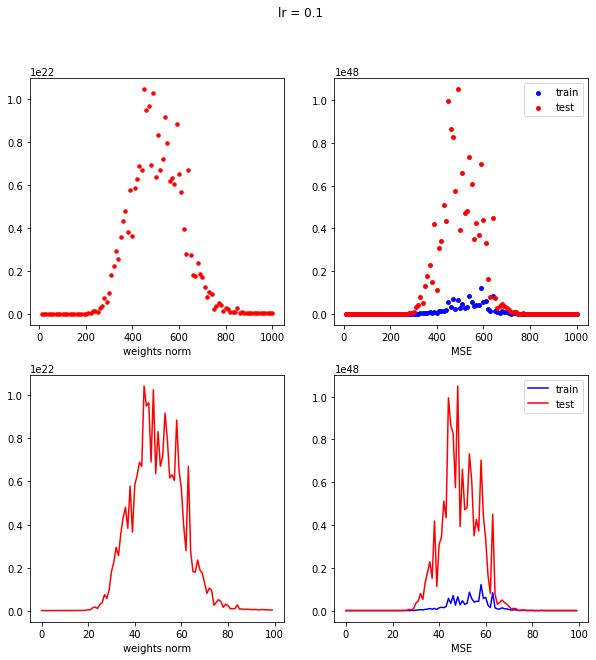

  0%|          | 0/100 [00:00<?, ?it/s]

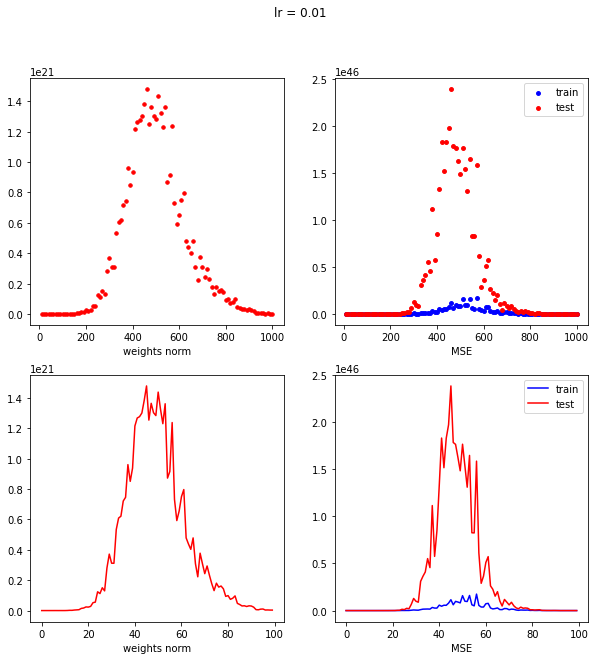

  0%|          | 0/100 [00:00<?, ?it/s]

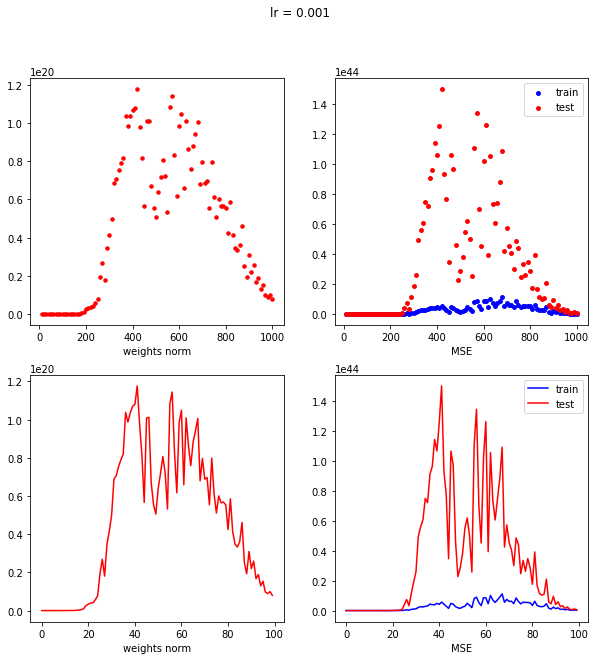

  0%|          | 0/100 [00:00<?, ?it/s]

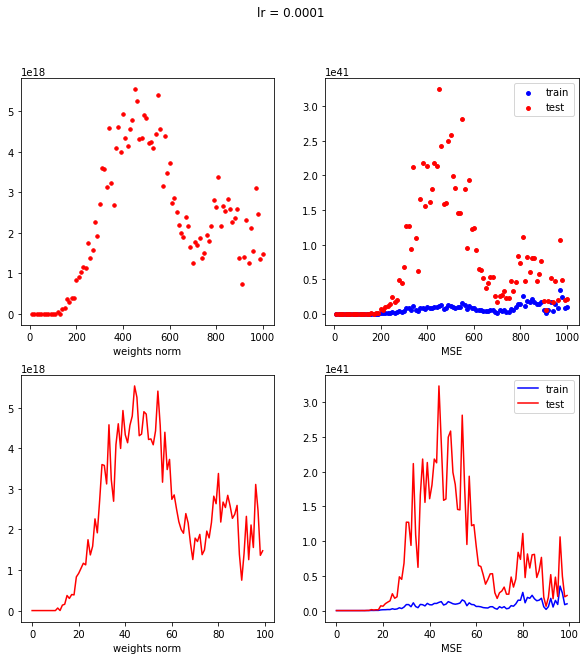

  0%|          | 0/100 [00:00<?, ?it/s]

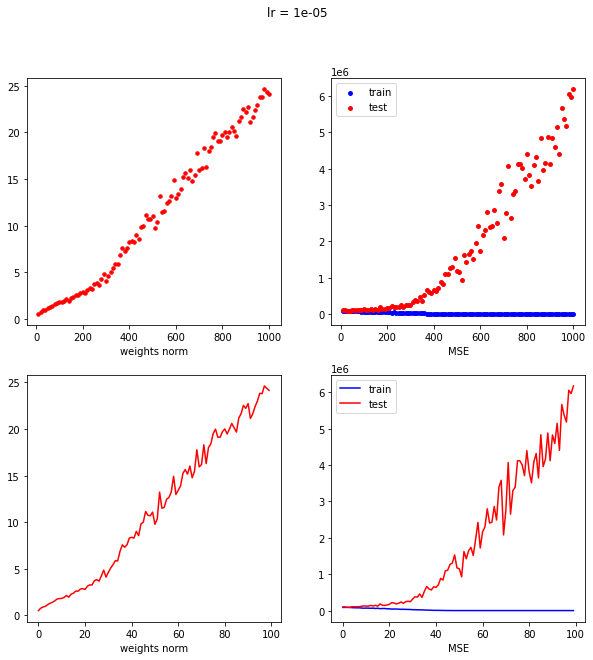

  0%|          | 0/100 [00:00<?, ?it/s]

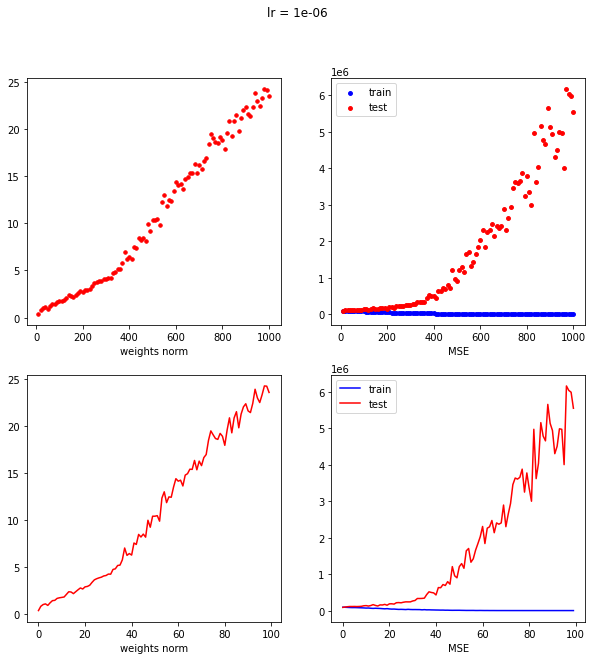

  0%|          | 0/100 [00:00<?, ?it/s]

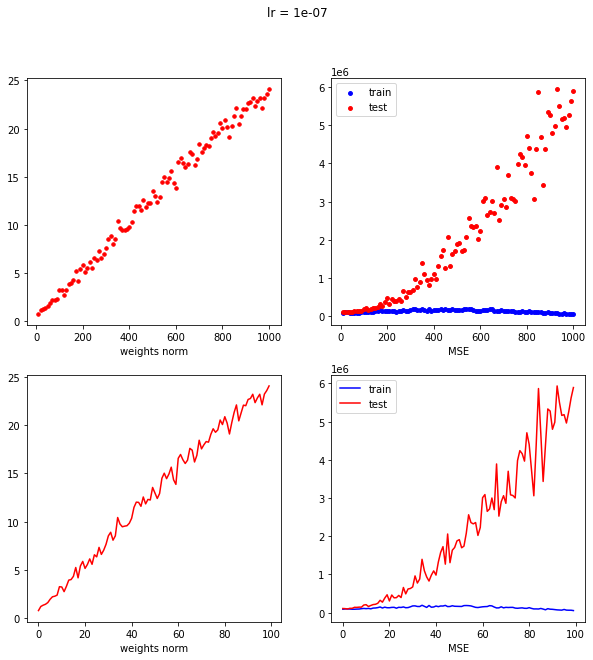

  0%|          | 0/100 [00:00<?, ?it/s]

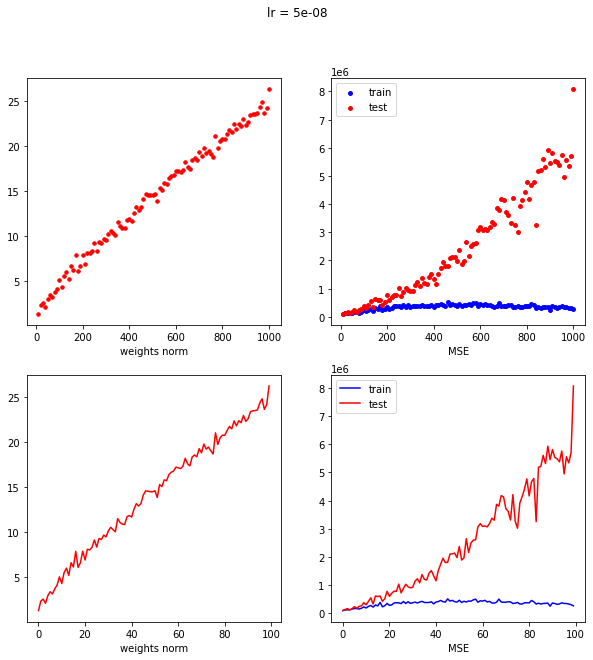

  0%|          | 0/100 [00:00<?, ?it/s]

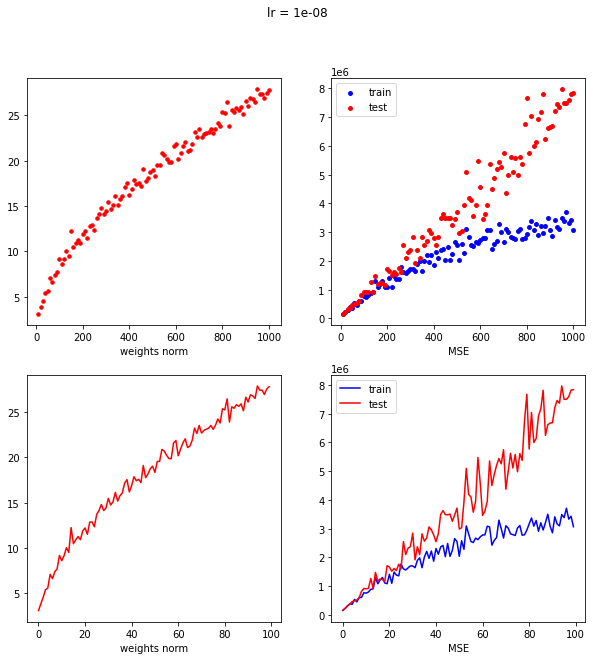

  0%|          | 0/100 [00:00<?, ?it/s]

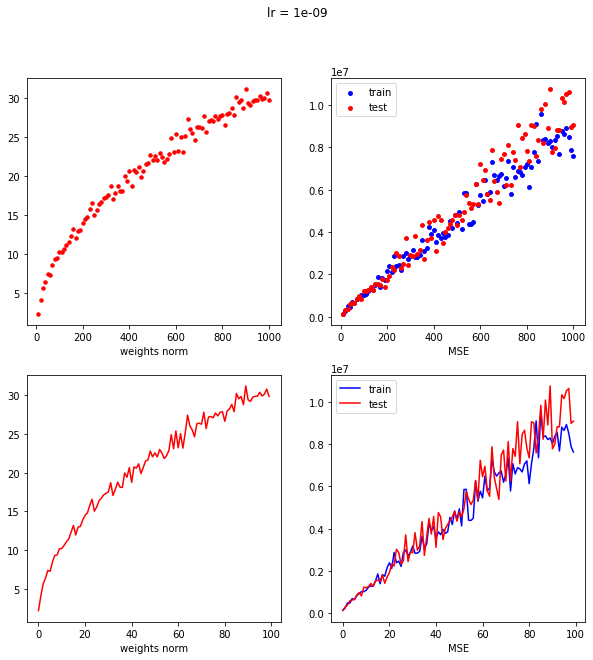

  0%|          | 0/100 [00:00<?, ?it/s]

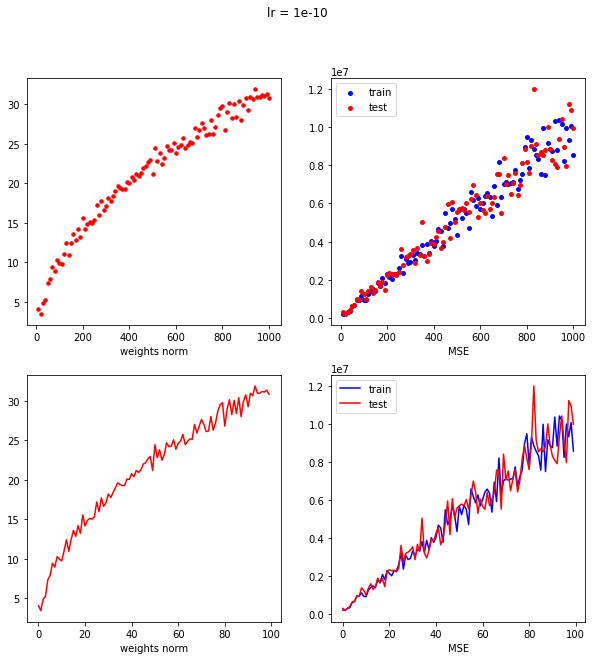

In [8]:
for lr in tqdm(arr_lr):
    MSE_train, MSE_test, weights, inter, num_iter = MYGD_MSE_and_weights(Fich, target, left_border = 0, right_border = 1000, step = 10, rand_size = rand_size, lr = lr)

    norm = []
    for w in weights:
      norm.append(np.linalg.norm(w))
    #Нарисуем график
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle(f'lr = {lr}')
    ax[0][0].scatter(num_iter, norm, color='red', s = 12)
    ax[0][0].set(xlabel = 'weights norm')

    ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
    ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
    ax[0][1].set(xlabel = 'MSE')
    ax[0][1].legend()

    ax[1][0].plot(norm, color='red')
    ax[1][0].set(xlabel = 'weights norm')

    ax[1][1].plot(MSE_train, color='blue', label='train')
    ax[1][1].plot(MSE_test, color = 'red', label='test')
    ax[1][1].set(xlabel = 'MSE')
    ax[1][1].legend()
    plt.show()

Видим первый пик, норма весов повторяет поведение ошибки на тесте. Однако второй пик не найден. Видимо, эта модель слишком груба для нахождения данных минимумов.

Давайте посмотрим на результаты SGD.

In [9]:
Fich, target, left_border_plane, right_border_plane = make_dataset(25)
rand_size = (right_border_plane - left_border_plane) // 2
arr_lr = [0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 5e-8, 1e-8, 1e-9, 1e-10]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

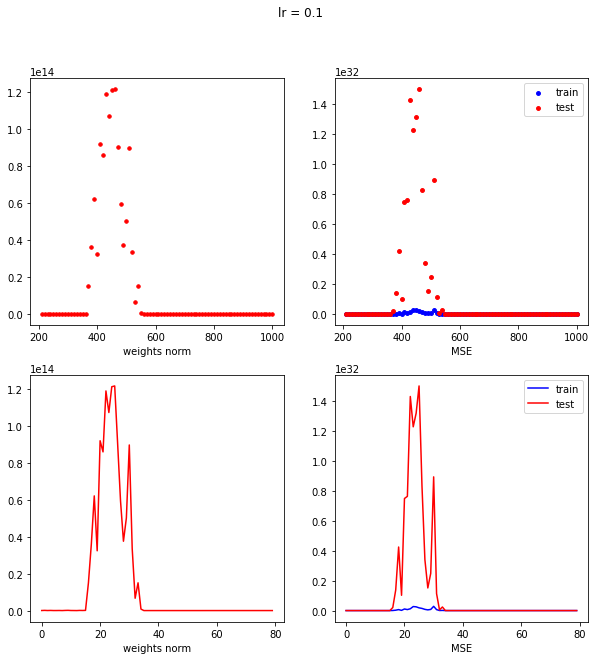

  0%|          | 0/80 [00:00<?, ?it/s]

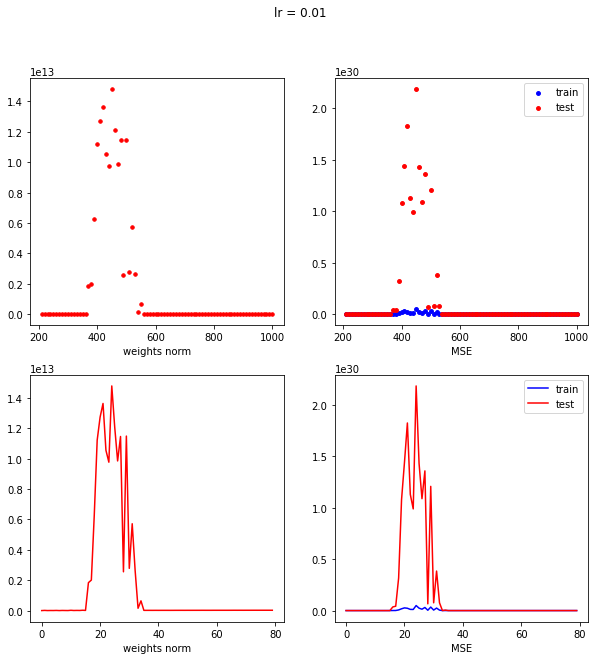

  0%|          | 0/80 [00:00<?, ?it/s]

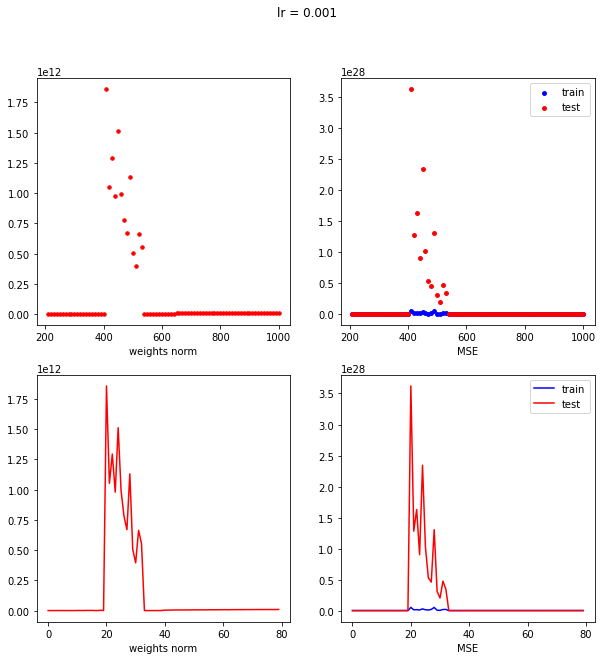

  0%|          | 0/80 [00:00<?, ?it/s]

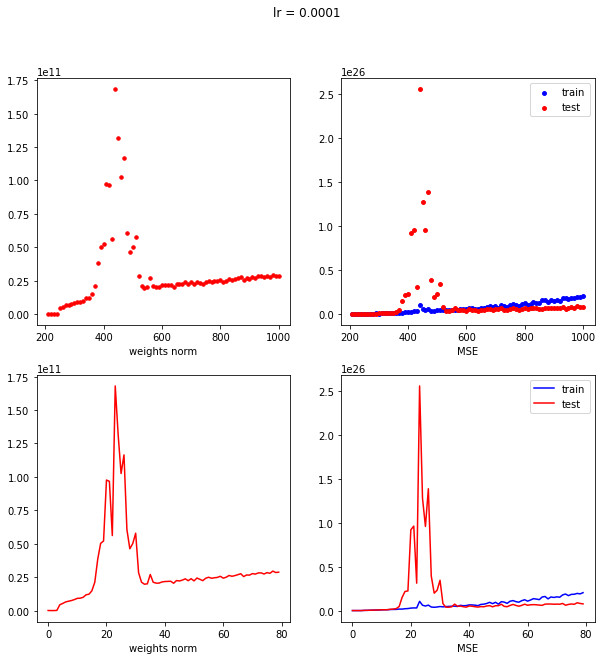

  0%|          | 0/80 [00:00<?, ?it/s]

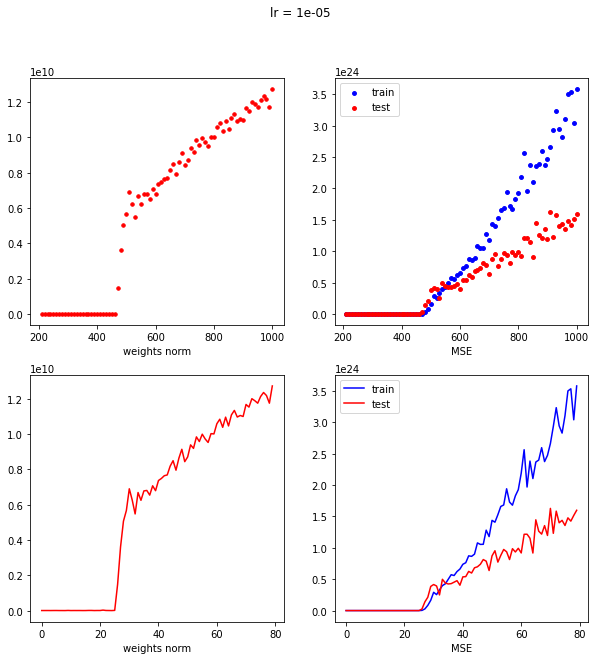

  0%|          | 0/80 [00:00<?, ?it/s]

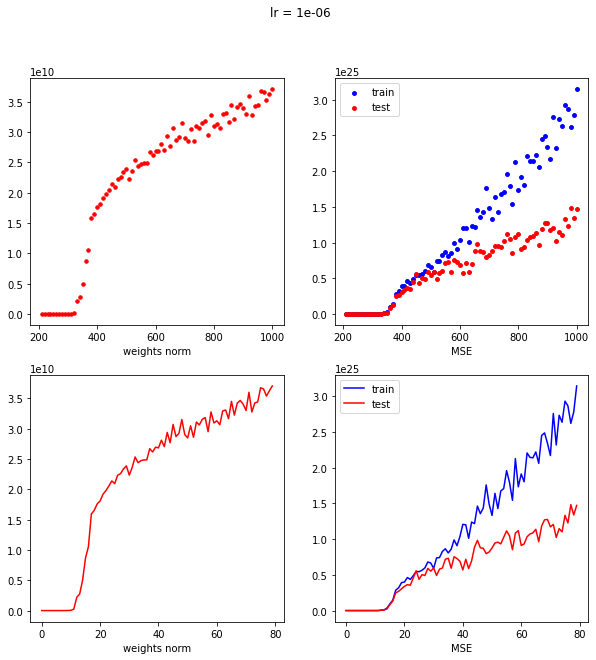

  0%|          | 0/80 [00:00<?, ?it/s]

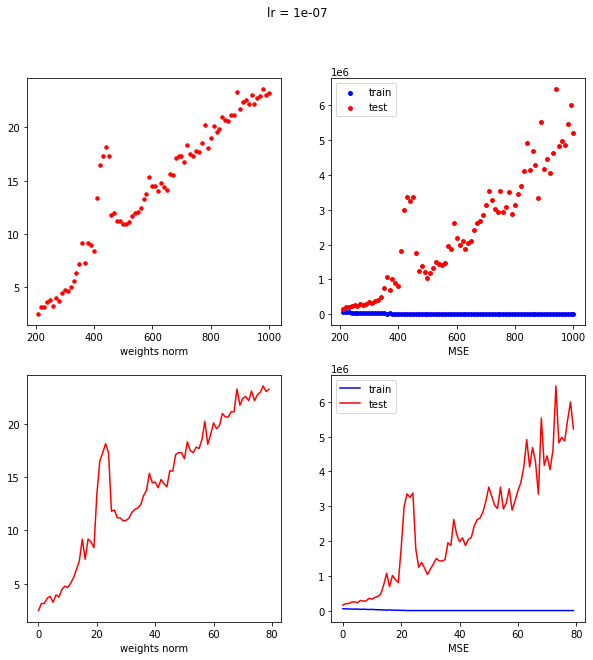

  0%|          | 0/80 [00:00<?, ?it/s]

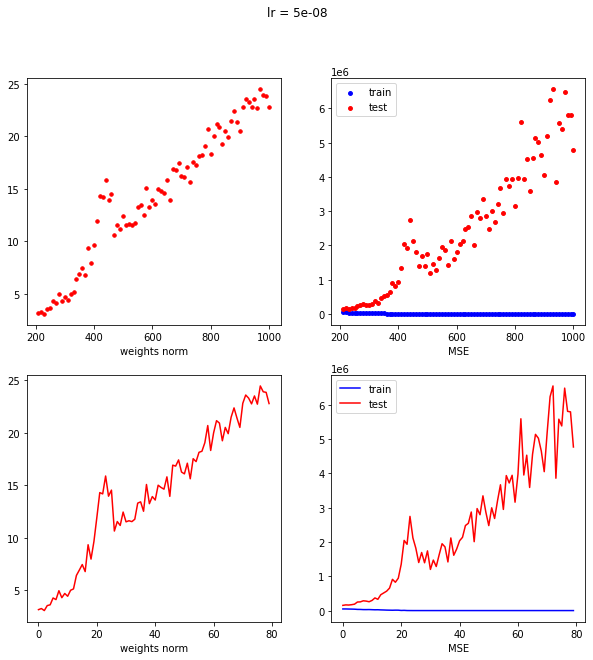

  0%|          | 0/80 [00:00<?, ?it/s]

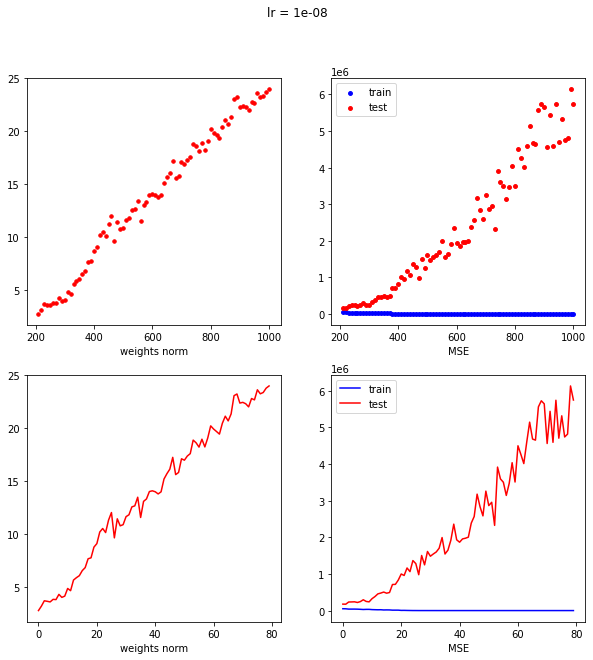

  0%|          | 0/80 [00:00<?, ?it/s]

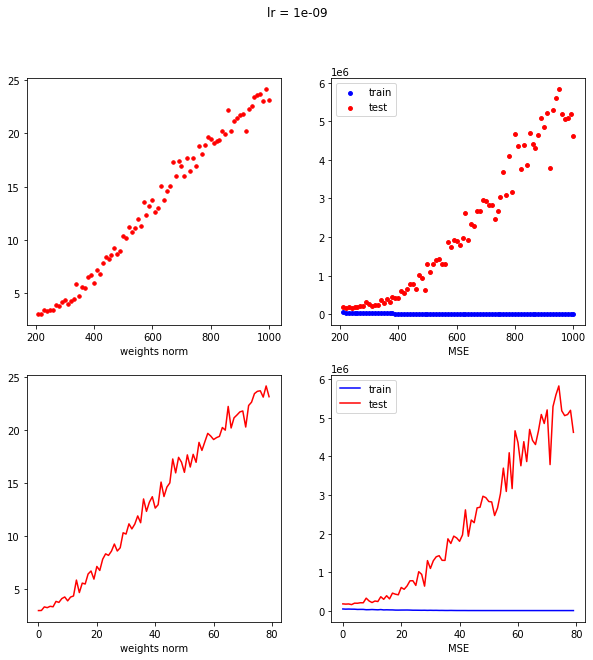

  0%|          | 0/80 [00:00<?, ?it/s]

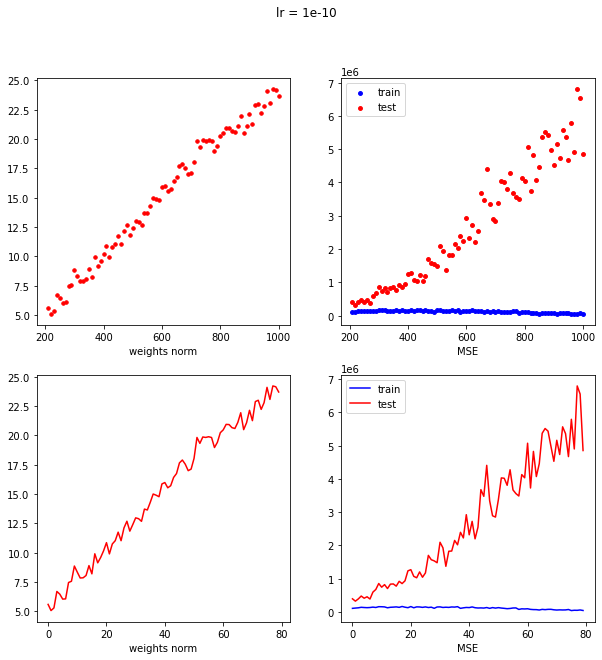

In [10]:
for lr in tqdm(arr_lr):
    MSE_train, MSE_test, weights, inter, num_iter = MYSGD_MSE_and_weights(Fich, target, left_border = 200, right_border = 1000, step = 10, rand_size = rand_size, lr = lr)

    norm = []
    for w in weights:
      norm.append(np.linalg.norm(w))
    #Нарисуем график
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle(f'lr = {lr}')
    ax[0][0].scatter(num_iter, norm, color='red', s = 12)
    ax[0][0].set(xlabel = 'weights norm')

    ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
    ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
    ax[0][1].set(xlabel = 'MSE')
    ax[0][1].legend()

    ax[1][0].plot(norm, color='red')
    ax[1][0].set(xlabel = 'weights norm')

    ax[1][1].plot(MSE_train, color='blue', label='train')
    ax[1][1].plot(MSE_test, color = 'red', label='test')
    ax[1][1].set(xlabel = 'MSE')
    ax[1][1].legend()
    plt.show()

При 1e-7 пик хорошо проглядывается, но функция потерь после резкого падения начинает расти: данная модель SGD не смогла найти нужные минимумы, однако она работает уже лучше чем обычный градиентный спуск. Это и логично, потому что в SGD веса притерпевают в $\frac{N}{B}$ больше изменений. Где N - размер выборки, B - размер батча. В нашем случае $B = 1$.

Также мы можем заметить, что норма весов ведет себя абсолютно также как и ошибка на тесте.

Посмотрим еще раз на пик

In [11]:
Fich, target, left_border_plane, right_border_plane = make_dataset(25)
rand_size = (right_border_plane - left_border_plane) // 2
arr_lr = [1e-7]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

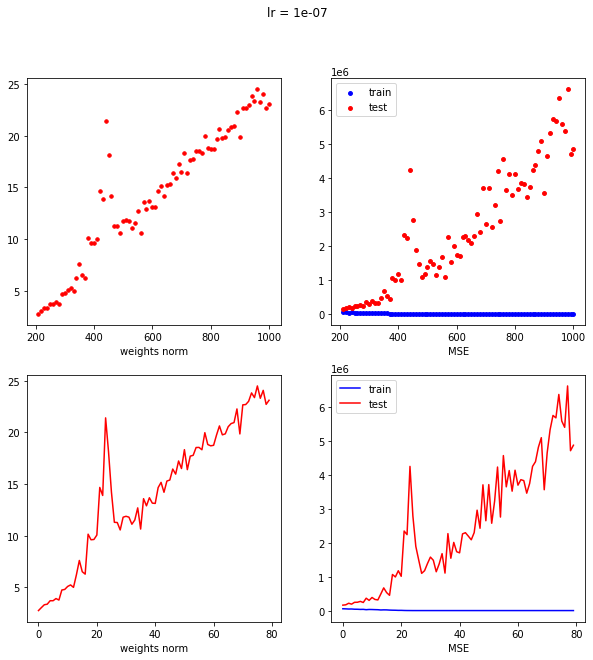

In [12]:
for lr in tqdm(arr_lr):
    MSE_train, MSE_test, weights, inter, num_iter = MYSGD_MSE_and_weights(Fich, target, left_border = 200, right_border = 1000, step = 10, rand_size = rand_size, lr = lr)

    norm = []
    for w in weights:
      norm.append(np.linalg.norm(w))
    #Нарисуем график
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig.suptitle(f'lr = {lr}')
    ax[0][0].scatter(num_iter, norm, color='red', s = 12)
    ax[0][0].set(xlabel = 'weights norm')

    ax[0][1].scatter(num_iter, MSE_train, color='blue', label='train', s = 15)
    ax[0][1].scatter(num_iter, MSE_test, color = 'red', label='test', s = 15)
    ax[0][1].set(xlabel = 'MSE')
    ax[0][1].legend()

    ax[1][0].plot(norm, color='red')
    ax[1][0].set(xlabel = 'weights norm')

    ax[1][1].plot(MSE_train, color='blue', label='train')
    ax[1][1].plot(MSE_test, color = 'red', label='test')
    ax[1][1].set(xlabel = 'MSE')
    ax[1][1].legend()
    plt.show()

Да, действительно, все признаки двойного спуска: снижение ошибки на тестовой выборке и резкий рост ошибки на тесте, а потом резкое снижение. Наблюдаются при том же числе параметров. Однако сразу после этого SGD перестает находить нужные минимумы. Похоже, нужны более серьезные улучшения этого алгоритма.